## Cargar los Datos


In [1]:
import pandas as pd

# Cargar las tablas S4 y S6 del archivo Excel
excel_file_path = 'Tables_S1_to_S11.xlsx'
table_s4 = pd.read_excel(excel_file_path, sheet_name='Table S4')
table_s6 = pd.read_excel(excel_file_path, sheet_name='Table S6')


# EDA

### Funciones



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Función para limpiar cadenas de texto específicas en el DataFrame
def clean_text(df, sequences_to_remove=['*', '**']):
    for column in df.columns:
        if df[column].dtype == 'object':
            for sequence in sequences_to_remove:
                df[column] = df[column].apply(lambda x: x.replace(sequence, '') if isinstance(x, str) and sequence in x else x)
    return df

# Función para convertir columnas a tipo numérico
def convert_to_numeric(column):
    if column.dtype in ['object', 'category']:
        contains_letters = any(isinstance(val, str) and any(c.isalpha() for c in val) for val in column)
        if not contains_letters:
            return pd.to_numeric(column, errors='coerce')
    return column

# Función para cargar y limpiar datos
def load_and_clean_data(file_path, sheet_name):
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    df = clean_text(df)
    df = df.apply(convert_to_numeric)
    return df

# Función para obtener columnas numéricas
def get_numeric_columns(df):
    return df.select_dtypes(include=[float, int]).columns.tolist()

# Función para obtener columnas categóricas
def get_categorical_columns(df):
    return df.select_dtypes(include=['object', 'category']).columns.tolist()

# Función para generar la descripción estadística
def descriptive_statistics(df):
    return df.describe()

# Función para graficar distribuciones
def plot_distributions(df, numeric_columns):
    for col in numeric_columns:
        plt.figure(figsize=(12, 6))
        sns.histplot(df[col].dropna(), bins=30, kde=True)
        plt.title(f'Distribución de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.show()

# Función para graficar la distribución de una variable categórica
def plot_categorical_distribution(df, categorical_column):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=categorical_column, data=df)
    plt.title(f'Distribución de {categorical_column}')
    plt.xlabel(categorical_column)
    plt.ylabel('Frecuencia')
    plt.show()

# Función para graficar correlaciones
def plot_correlations(df):
    numeric_df = df.select_dtypes(include=[float, int])
    correlation = numeric_df.corr()
    plt.figure(figsize=(18, 16))
    sns.heatmap(correlation, annot=True, cmap='coolwarm')
    plt.title('Mapa de calor de correlaciones')
    plt.show()

# Función para comparar características por grupos
def plot_group_comparisons(df, group_column, numeric_columns):
    for col in numeric_columns:
        plt.figure(figsize=(14, 7))
        sns.boxplot(x=group_column, y=col, data=df)
        plt.title(f'Boxplot de {col} por {group_column}')
        plt.xlabel(group_column)
        plt.ylabel(col)
        plt.xticks(rotation=45)
        plt.show()

# Pipeline del EDA
def eda_pipeline(file_path, sheet_name, group_column=None):
    # Cargar y limpiar datos
    df = load_and_clean_data(file_path, sheet_name)
    
    # Obtener columnas numéricas y categóricas
    numeric_columns = get_numeric_columns(df)
    categorical_columns = get_categorical_columns(df)
    
    # Descripción estadística
    desc_stats = descriptive_statistics(df)
    print(f"Descripción Estadística de {sheet_name}:\n", desc_stats)
    
    # Graficar distribuciones numéricas
    plot_distributions(df, numeric_columns)
    
    # Graficar distribuciones categóricas si existen
    if categorical_columns:
        for cat_col in categorical_columns:
            plot_categorical_distribution(df, cat_col)
    
    # Graficar correlaciones
    plot_correlations(df)
    
    # Comparar características por grupos
    if group_column:
        plot_group_comparisons(df, group_column, numeric_columns)


### DF4

In [3]:
# Variables para la ejecución
file_path = "D:/MÁSTER DATA SCIENCE/KSCHOOL/1.TFM/PARTTE 2 TFM/Tables_S1_to_S11.xlsx"
sheet_name_s4 = 'Table S4'
sheet_name_s6 = 'Table S6'
group_column = 'Tumor type'
df_s4 = load_and_clean_data(file_path, sheet_name_s4)

In [4]:
df_s4

Patient ID # Plasma sample ID # Primary tumor sample ID #        Age  \
0         CRC 455      CRC 455 PLS 1             Not available  59.811088   
1         CRC 456      CRC 456 PLS 1               CRC 456 PT1  59.091034   
2         CRC 457      CRC 457 PLS 1               CRC 457 PT1  68.618754   
3         CRC 458      CRC 458 PLS 1               CRC 458 PT1  69.563313   
4         CRC 459      CRC 459 PLS 1               CRC 459 PT1  43.359343   
...           ...                ...                       ...        ...   
1812    PAPA 1353    PAPA 1353 PLS 1             Not available  55.000000   
1813    PAPA 1354    PAPA 1354 PLS 1             Not available  57.000000   
1814    PAPA 1355    PAPA 1355 PLS 1             Not available  60.000000   
1815    PAPA 1356    PAPA 1356 PLS 1             Not available  49.000000   
1816    PAPA 1357    PAPA 1357 PLS 1             Not available  60.000000   

         Sex       Race  Tumor type AJCC Stage        Histopathology  \
0       Male  Caucasian  Colorectum          I        Adenocarcinoma   
1     Female  Caucasian  Colorectum          I        Adenocarcinoma   
2     Female  Caucasian  Colorectum         II        Adenocarcinoma   
3     Female  Caucasian  Colorectum         II        Adenocarcinoma   
4     Female  Caucasian  Colorectum         II        Adenocarcinoma   
...      ...        ...         ...        ...                   ...   
1812  Female  Caucasian       Ovary          I  Epithelial carcinoma   
1813  Female  Caucasian       Ovary          I  Epithelial carcinoma   
1814  Female  Caucasian       Ovary        III  Epithelial carcinoma   
1815  Female  Caucasian       Ovary         II  Epithelial carcinoma   
1816  Female      Black       Ovary        III  Epithelial carcinoma   

      Plasma volume (mL)  Plasma DNA concentration (ng/mL)  \
0                    5.0                          6.079696   
1                    4.0                         46.005220   
2                    4.5                          6.940071   
3                    7.5                          7.149544   
4                    5.0                          9.814674   
...                  ...                               ...   
1812                 3.5                          6.546670   
1813                 3.5                         22.834150   
1814                 3.5                         64.506838   
1815                 3.5                         13.709668   
1816                 3.5                         19.808656   

      CancerSEEK Logistic Regression Score CancerSEEK Test Result  
0                                 0.938342               Positive  
1                                 0.925363               Positive  
2                                 0.852367               Negative  
3                                 0.617639               Negative  
4                                 0.318434               Negative  
...                                    ...                    ...  
1812                              0.980312               Positive  
1813                              0.999995               Positive  
1814                              1.000000               Positive  
1815                              1.000000               Positive  
1816                              1.000000               Positive  

[1817 rows x 13 columns]

### DF6

In [5]:
df_s6 = load_and_clean_data(file_path, sheet_name_s6)

In [6]:
df_s6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1817 entries, 0 to 1816
Data columns (total 47 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Patient ID #                          1817 non-null   object 
 1   Sample ID #                           1817 non-null   object 
 2   Tumor type                            1817 non-null   object 
 3   AJCC Stage                            1005 non-null   object 
 4   AFP (pg/ml)                           1817 non-null   float64
 5   Angiopoietin-2 (pg/ml)                1817 non-null   float64
 6   AXL (pg/ml)                           1811 non-null   float64
 7   CA-125 (U/ml)                         1817 non-null   float64
 8   CA 15-3 (U/ml)                        1817 non-null   float64
 9   CA19-9 (U/ml)                         1817 non-null   float64
 10  CD44 (ng/ml)                          1811 non-null   float64
 11  CEA (pg/ml)      

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Crear una carpeta para guardar los resultados si no existe
os.makedirs('resultados', exist_ok=True)

# Función para limpiar cadenas de texto específicas en el DataFrame
def clean_text(df, sequences_to_remove=['*', '**']):
    for column in df.columns:
        if df[column].dtype == 'object':
            for sequence in sequences_to_remove:
                df[column] = df[column].apply(lambda x: x.replace(sequence, '') if isinstance(x, str) and sequence in x else x)
    return df

# Función para convertir columnas a tipo numérico
def convert_to_numeric(column):
    if column.dtype in ['object', 'category']:
        contains_letters = any(isinstance(val, str) and any(c.isalpha() for c in val) for val in column)
        if not contains_letters:
            return pd.to_numeric(column, errors='coerce')
    return column

# Función para cargar y limpiar datos
def load_and_clean_data(file_path, sheet_name):
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    df = clean_text(df)
    df = df.apply(convert_to_numeric)
    return df

# Función para obtener columnas numéricas
def get_numeric_columns(df):
    return df.select_dtypes(include=[float, int]).columns.tolist()

# Función para obtener columnas categóricas
def get_categorical_columns(df):
    return df.select_dtypes(include=['object', 'category']).columns.tolist()

# Función para limpiar nombres de archivos
def clean_filename(filename):
    return filename.replace('/', '_').replace('\\', '_')

# Función para generar la descripción estadística
def descriptive_statistics(df, sheet_name):
    desc_stats = df.describe()
    desc_stats.to_csv(f'resultados/{clean_filename(sheet_name)}_descriptive_statistics.csv')
    return desc_stats

# Función para graficar distribuciones
def plot_distributions(df, numeric_columns, sheet_name):
    for col in numeric_columns:
        plt.figure(figsize=(12, 6))
        sns.histplot(df[col].dropna(), bins=30, kde=True)
        plt.title(f'Distribución de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.savefig(f'resultados/{clean_filename(sheet_name)}_distribution_{clean_filename(col)}.png')
        plt.close()

# Función para graficar la distribución de una variable categórica
def plot_categorical_distribution(df, categorical_column, sheet_name):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=categorical_column, data=df)
    plt.title(f'Distribución de {categorical_column}')
    plt.xlabel(categorical_column)
    plt.ylabel('Frecuencia')
    plt.savefig(f'resultados/{clean_filename(sheet_name)}_categorical_distribution_{clean_filename(categorical_column)}.png')
    plt.close()

# Función para graficar correlaciones
def plot_correlations(df, sheet_name):
    numeric_df = df.select_dtypes(include=[float, int])
    correlation = numeric_df.corr()
    plt.figure(figsize=(18, 16))
    sns.heatmap(correlation, annot=True, cmap='coolwarm')
    plt.title('Mapa de calor de correlaciones')
    plt.savefig(f'resultados/{clean_filename(sheet_name)}_correlations_heatmap.png')
    plt.close()

# Función para comparar características por grupos
def plot_group_comparisons(df, group_column, numeric_columns, sheet_name):
    for col in numeric_columns:
        plt.figure(figsize=(14, 7))
        sns.boxplot(x=group_column, y=col, data=df)
        plt.title(f'Boxplot de {col} por {group_column}')
        plt.xlabel(group_column)
        plt.ylabel(col)
        plt.xticks(rotation=45)
        plt.savefig(f'resultados/{clean_filename(sheet_name)}_group_comparison_{clean_filename(col)}.png')
        plt.close()

# Función para analizar valores faltantes
def analyze_missing_values(df, sheet_name):
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    missing_values.to_csv(f'resultados/{clean_filename(sheet_name)}_missing_values.csv')
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Mapa de valores faltantes')
    plt.savefig(f'resultados/{clean_filename(sheet_name)}_missing_values_heatmap.png')
    plt.close()

# Función para realizar imputación de valores faltantes
def impute_missing_values(df, strategy='mean'):
    imputer = SimpleImputer(strategy=strategy)
    numeric_columns = get_numeric_columns(df)
    df[numeric_columns] = imputer.fit_transform(df[numeric_columns])
    return df

# Función para realizar Análisis de Componentes Principales (PCA)
def perform_pca(df, sheet_name, n_components=2):
    numeric_df = df.select_dtypes(include=[float, int]).dropna()
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(numeric_df)
    principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])
    principal_df.to_csv(f'resultados/{clean_filename(sheet_name)}_pca.csv')
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='PC1', y='PC2', data=principal_df)
    plt.title('Análisis de Componentes Principales (PCA)')
    plt.savefig(f'resultados/{clean_filename(sheet_name)}_pca.png')
    plt.close()

# Pipeline del EDA
def eda_pipeline(file_path, sheet_name, group_column=None):
    # Cargar y limpiar datos
    df = load_and_clean_data(file_path, sheet_name)
    
    # Análisis de valores faltantes
    analyze_missing_values(df, sheet_name)
    
    # Imputación de valores faltantes
    df = impute_missing_values(df)
    
    # Obtener columnas numéricas y categóricas
    numeric_columns = get_numeric_columns(df)
    categorical_columns = get_categorical_columns(df)
    
    # Descripción estadística
    desc_stats = descriptive_statistics(df, sheet_name)
    print(f"Descripción Estadística de {sheet_name}:\n", desc_stats)
    
    # Graficar distribuciones numéricas
    plot_distributions(df, numeric_columns, sheet_name)
    
    # Graficar distribuciones categóricas si existen
    if categorical_columns:
        for cat_col in categorical_columns:
            plot_categorical_distribution(df, cat_col, sheet_name)
    
    # Graficar correlaciones
    plot_correlations(df, sheet_name)
    
    # Comparar características por grupos
    if group_column:
        plot_group_comparisons(df, group_column, numeric_columns, sheet_name)
    
    # Análisis de Componentes Principales (PCA)
    perform_pca(df, sheet_name)

# EDA S4

In [8]:
eda_pipeline(file_path, sheet_name_s4, group_column)


Descripción Estadística de Table S4:
                Age  Plasma volume (mL)  Plasma DNA concentration (ng/mL)  \
count  1817.000000         1817.000000                       1817.000000   
mean     56.808473            7.369356                          8.924964   
std      17.311677            0.623067                         15.176272   
min      17.000000            2.000000                          0.001088   
25%      47.405886            7.500000                          2.313844   
50%      60.000000            7.500000                          4.376189   
75%      69.427498            7.500000                          8.195708   
max      93.000000            7.500000                        157.476775   

       CancerSEEK Logistic Regression Score  
count                           1817.000000  
mean                               0.552796  
std                                0.365760  
min                                0.062389  
25%                                0.198374  
5

c:\Users\FloCr\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\FloCr\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\FloCr\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\FloCr\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of p

# EDA S6

In [9]:
eda_pipeline(file_path, sheet_name_s6, group_column)


Descripción Estadística de Table S6:
          AFP (pg/ml)  Angiopoietin-2 (pg/ml)   AXL (pg/ml)  CA-125 (U/ml)  \
count    1817.000000             1817.000000   1817.000000    1817.000000   
mean     7109.350915             1908.423015   2367.282468      25.183043   
std     52353.921638             1814.768306   1367.437976     184.585378   
min       706.158000               38.391000    109.440000       4.608000   
25%       829.980000              997.490000   1483.010000       4.890000   
50%       946.938000             1498.920000   2138.070000       4.980000   
75%      1848.540000             2259.460000   2927.800000       6.400000   
max    600608.892000            30001.791000  12247.310000    3600.024000   

       CA 15-3 (U/ml)  CA19-9 (U/ml)  CD44 (ng/ml)    CEA (pg/ml)  \
count     1817.000000    1817.000000   1817.000000    1817.000000   
mean        20.628611      53.828772     19.533026    4427.203445   
std         64.345361     409.030952     11.322784   23696.80

c:\Users\FloCr\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\FloCr\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\FloCr\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\FloCr\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of p

### Interpretacion tabla S4

* Balance de Datos: Hay un desbalance significativo en algunas categorías (por ejemplo, Race, Tumor type, y CancerSEEK Test Result).
* Distribuciones: Algunas variables muestran distribuciones sesgadas (por ejemplo, Plasma DNA concentration), lo que puede requerir transformaciones para un análisis adecuado.
* Correlaciones: Identificamos correlaciones moderadas entre algunas variables clave, lo que puede guiar el desarrollo de modelos predictivos.
* PCA: Indica alta variabilidad y dispersión en los datos, lo que sugiere que múltiples factores contribuyen a las diferencias observadas.

### Interpretacion tabla s6

El análisis exploratorio de los datos (EDA) de la tabla S6 revela varias observaciones importantes:

Variabilidad entre tipos de tumores: Muchos biomarcadores muestran variaciones significativas entre diferentes tipos de tumores, lo que puede ser útil para la clasificación y predicción del tipo de cáncer.

Valores atípicos: Existen varios valores atípicos en los datos, lo que indica que algunos pacientes tienen niveles extremadamente altos o bajos 
de ciertos biomarcadores.

Valores faltantes: La presencia de valores faltantes en algunos biomarcadores debe ser considerada y abordada mediante técnicas de imputación o exclusión de datos.

Distribución de Edad: La mayoría de los pacientes tienen edades que oscilan entre 40 y 70 años.

Distribución de Sexo: Hay más mujeres que hombres en el conjunto de datos.

La gráfica muestra que el tipo de tumor más común en el conjunto de datos es el de colorrecto, seguido por otros tipos como el de pulmón y el de mama.



Distribución del Volumen de Plasma: La mayoría de los volúmenes de plasma están entre 4 y 7 mL.

Distribución de la Concentración de ADN en Plasma: La concentración de ADN en plasma varía ampliamente, pero la mayoría de las muestras tienen concentraciones más bajas.

El ADN libre en sangre, bajo condiciones normales, se encuentra en muy bajas concentraciones, asociado a los procesos de muerte celular, que ocurre normalmente en el recambio celular, que a su vez se asocia entre otros al catabolismo aumentado de los glóbulos blancos en voluntarios sanos (1), lográndose cuantificar en el torrente sanguíneo en muestras como suero o plasma, además de muestras como orina, leche materna y saliva (2-4). El ADN libre es resistente a las RNAsas, debido a que éstas solo pueden degradar ADN de cadena sencilla (ssADN) mientras que el ADN que se encuentra libre en el torrente sanguíneo, generalmente es de doble cadena (5,6).
Las concentraciones de ADN libre en sangre pueden verse alteradas por distintas circunstancias, que en general se pueden resumir en daño a tejidos, inflamación, embarazo, infecciones, cáncer y trauma (7-9). En pacientes enfermos con cáncer la concentración de ADN libre disminuye en respuesta a quimioterapia (10) y se incrementa cuando hay una diseminación del tumor o metástasis (10-13).

Existe gran divergencia entre valores de referencia de la concentración de ADN libre en voluntarios sanos. Para Wu y colaboradores la concentración de ADN libre en individuos sanos es de 57,1 +/- 30,6 ng/mL (14); otros muestran concentraciones de 0 hasta 35,2 ug/mL (9); para otros autores, los valores normales son de 10 a 30ng/mL con una media de 13 ng/mL (1) o de 18 ng/mL (15). Adicionalmente, la concentración de este ADN aumenta en pacientes con cáncer excediendo los 100 ng/mL hasta aproximadamente 180 ng/mL (1,16).

En pacientes con cáncer de pulmón se han reportado medias de 318 ng/mL (15). Se hace necesario establecer los valores normales de la cuantificación de ADN libre en diferentes regiones de población colombiana, y así poder establecer una comparación con pacientes que padezcan alguna de las patologías anteriormente mencionadas, pues la divergencia en estos valores reportados podría llegar a ser tal que, al realizar dichas comparaciones, se incurra en errores obteniéndose valores de cuantificación equívocos que puedan resultar en un informe deficiente a la hora de hacer determinaciones de enfermedades por medio de esta técnica.

Este estudio tuvo como objetivo determinar la concentración de ADN libre en personas sanas en la población bogotana, para establecer un rango normal o rango de referencia mediante la técnica de PCR en Tiempo-Real sin realizar pasos de extracción y purificación de ADN.

https://revistas.unicolmayor.edu.co/index.php/nova/article/view/139/279

## Cargar las tablas que vamos a usar:

In [10]:
# Variables para la ejecución
file_path = 'Tables_S1_to_S11.xlsx'
sheet_name_s4 = 'Table S4'
sheet_name_s6 = 'Table S6'
group_column_s6 = 'Tumor type'

df_s4 = load_and_clean_data(file_path, sheet_name_s4)
df_s6 = load_and_clean_data(file_path, sheet_name_s6)
df_s6.to_excel('df6.xlsx')
df_s4.to_excel('df4.xlsx')

## Preprocesamiento de datos

In [11]:
df_s6_sin_normal = df_s6[df_s6['Tumor type'] != 'Normal']


In [12]:
df_s6_sin_normal.to_excel('df6_sin_normal.xlsx')

In [13]:
df_s6_sin_normal

Patient ID #      Sample ID #  Tumor type AJCC Stage  AFP (pg/ml)  \
0         CRC 455    CRC 455 PLS 1  Colorectum          I     1583.450   
1         CRC 456    CRC 456 PLS 1  Colorectum          I      715.308   
2         CRC 457    CRC 457 PLS 1  Colorectum         II     4365.530   
3         CRC 458    CRC 458 PLS 1  Colorectum         II      715.308   
4         CRC 459    CRC 459 PLS 1  Colorectum         II      801.300   
...           ...              ...         ...        ...          ...   
1812    PAPA 1353  PAPA 1353 PLS 1       Ovary          I      879.498   
1813    PAPA 1354  PAPA 1354 PLS 1       Ovary          I     1337.330   
1814    PAPA 1355  PAPA 1355 PLS 1       Ovary        III      879.498   
1815    PAPA 1356  PAPA 1356 PLS 1       Ovary         II      879.498   
1816    PAPA 1357  PAPA 1357 PLS 1       Ovary        III      879.498   

      Angiopoietin-2 (pg/ml)  AXL (pg/ml)  CA-125 (U/ml)  CA 15-3 (U/ml)  \
0                    5598.50      3621.04          5.090           19.08   
1                   20936.35      2772.96          7.270           10.04   
2                    2350.93      4120.77          4.854           16.96   
3                    1604.34      2029.96          5.390            8.31   
4                    2087.57      2069.17          4.854           11.73   
...                      ...          ...            ...             ...   
1812                 1484.70      2096.76         24.820           10.30   
1813                 1607.90       852.37          5.580            9.80   
1814                 1592.84      1044.45         30.480            8.48   
1815                 5267.95      1445.69       1469.450           23.74   
1816                 3546.43      1493.32       1428.310          836.85   

      CA19-9 (U/ml)  ...  sHER2/sEGFR2/sErbB2 (pg/ml)  sPECAM-1 (pg/ml)  \
0            16.452  ...                      6832.07           9368.53   
1            40.910  ...                      5549.47           6224.55   
2            16.452  ...                      3698.16           4046.48   
3            16.452  ...                      5856.00           6121.93   
4            16.452  ...                      5447.93           6982.32   
...             ...  ...                          ...               ...   
1812         42.390  ...                      5390.31           8538.58   
1813         16.440  ...                      7951.03          12966.19   
1814         16.440  ...                      2396.36           1901.41   
1815         62.260  ...                      3079.81           5312.90   
1816         37.900  ...                      3967.55           4045.18   

      TGFa (pg/ml)  Thrombospondin-2 (pg/ml)  TIMP-1 (pg/ml)  TIMP-2 (pg/ml)  \
0           16.086                  21863.74        56428.71        39498.82   
1           16.086                  29669.66        73940.49        41277.09   
2          179.030                   6020.47        22797.28        28440.60   
3           16.086                   4331.02        20441.19        25896.73   
4           16.086                   2311.91        56288.51        49425.20   
...            ...                       ...             ...             ...   
1812        16.890                    599.40       167799.61        50128.60   
1813        16.890                    599.40       123443.76        54066.98   
1814        16.890                    599.40       104070.89        39844.02   
1815        16.890                   6864.33       110579.24        42921.13   
1816        16.890                  12877.10        88464.04        47219.24   

      CancerSEEK Logistic Regression Score  CancerSEEK Test Result  \
0                                 0.938342                Positive   
1                                 0.925363                Positive   
2                                 0.852367                Negative   
3                                 0.617639                Neg

In [14]:
df_s6_sin_normal.isnull().sum()

Patient ID #                            0
Sample ID #                             0
Tumor type                              0
AJCC Stage                              0
AFP (pg/ml)                             0
Angiopoietin-2 (pg/ml)                  0
AXL (pg/ml)                             0
CA-125 (U/ml)                           0
CA 15-3 (U/ml)                          0
CA19-9 (U/ml)                           0
CD44 (ng/ml)                            0
CEA (pg/ml)                             0
CYFRA 21-1 (pg/ml)                      0
DKK1 (ng/ml)                            0
Endoglin (pg/ml)                        0
FGF2 (pg/ml)                            0
Follistatin (pg/ml)                     0
Galectin-3 (ng/ml)                      0
G-CSF (pg/ml)                           1
GDF15 (ng/ml)                           0
HE4 (pg/ml)                             0
HGF (pg/ml)                             0
IL-6 (pg/ml)                            0
IL-8 (pg/ml)                      

* Omega score (0.70% Missing):

    Recomendación: Dado el pequeño porcentaje de valores faltantes, la imputación con la mediana es adecuada para mantener la robustez ante posibles valores atípicos.

* G-CSF (pg/ml) (0.10% Missing):

    Recomendación: La imputación con la mediana también es adecuada aquí debido al muy bajo porcentaje de valores faltantes.

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split



# Eliminar las columnas no deseadas
columns_to_remove = ['Patient ID #', 'Sample ID #', 'CancerSEEK Test Result', 'CancerSEEK Logistic Regression Score']
df_new = df_s6_sin_normal.drop(columns=columns_to_remove)

# Guardar nuevo dataset FINAL
df_new.to_excel('df_final.xlsx')

# Identificar características numéricas y categóricas
numeric_features = df_new.select_dtypes(include=[float, int]).columns.tolist()
categorical_features = df_new.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocesamiento para las características numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Imputación con la mediana
    ('scaler', StandardScaler())  # Estandarización
])

# Preprocesamiento para las características categóricas ordinales
ordinal_features = ['AJCC Stage']
ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(dtype=int))  # Codificación Ordinal
])

# Preprocesamiento para las características categóricas nominales (binarias)
nominal_features = ['Sex']
nominal_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='if_binary', dtype=int))  # Codificación binaria
])

# Combinación de los transformadores en un preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('ord', ordinal_transformer, ordinal_features),
        ('nom', nominal_transformer, nominal_features)
    ])

# Separar las características (X) y la variable objetivo (y)
X = df_new.drop(columns=['Tumor type'])
y = df_new['Tumor type']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ajustar y transformar los datos de entrenamiento y prueba
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

print("Preprocesamiento completado, datos filtrados y divididos en conjuntos de entrenamiento y prueba.")

Preprocesamiento completado, datos filtrados y divididos en conjuntos de entrenamiento y prueba.


**Pasos seguidos**

Eliminar Columnas No Deseadas: Se eliminaron las siguientes columnas:

* Patient ID #
* Sample ID #
* CancerSEEK Test Result
* CancerSEEK Logistic Regression Score

Identificación de Características:

* Características Numéricas: Se identificaron las columnas numéricas restantes después de la eliminación.
* Características Categóricas: Se identificaron las columnas categóricas restantes.

Preprocesamiento de las Características Numéricas:

* Imputación con la Mediana: Para manejar valores nulos en características numéricas.
* Estandarización: Para escalar las características numéricas a una distribución estándar.

Preprocesamiento de las Características Categóricas:

* Ordinal Encoding para AJCC Stage: Codificación ordinal, ya que tiene un orden intrínseco.
* Codificación Binaria para Sex: Codificación binaria, dado que es una variable con dos categorías (Male y Female).
* Combinación de los Transformadores: Se combinó todo el preprocesamiento en un solo ColumnTransformer para aplicar las transformaciones adecuadas a cada tipo de característica.

Separación de Características y Variable Objetivo:

* Características (X): Se eliminaron las columnas seleccionadas para quedarse con las características.
* Variable Objetivo (y): Tumor type.

División en Conjuntos de Entrenamiento y Prueba:

* Entrenamiento (70%) y Prueba (30%): Los datos se dividieron aleatoriamente en conjuntos de entrenamiento y prueba usando una semilla aleatoria (random_state=42) para reproducibilidad.

Ajuste y Transformación de los Datos:

* Se ajustaron los datos de entrenamiento con el preprocesador configurado.
* Se transformaron los datos de entrenamiento y prueba aplicando las mismas transformaciones.

In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder

# Función para combinar los datos transformados en un DataFrame
def combine_transformed_data_full(X_train_transformed, X_test_transformed, preprocessor, y_train, y_test):
    # Obtener nombres de las características numéricas y categóricas
    num_features = preprocessor.transformers_[0][2]
    ord_features = preprocessor.transformers_[1][2]
    nom_features = preprocessor.transformers_[2][2]

    # Obtener los nombres de las columnas después de la transformación
    num_col_names = num_features
    ord_col_names = ord_features
    nom_col_names = preprocessor.transformers_[2][1]['onehot'].get_feature_names_out(nom_features)
    
    # Combinar los nombres de las columnas
    all_col_names = np.concatenate([num_col_names, ord_col_names, nom_col_names])
    
    # Combinar los datos transformados de entrenamiento y prueba
    X_combined = np.vstack([X_train_transformed, X_test_transformed])
    y_combined = np.concatenate([y_train, y_test])
    
    # Crear un DataFrame con los datos transformados
    df_transformed = pd.DataFrame(X_combined, columns=all_col_names)
    
    # Añadir la columna objetivo al DataFrame transformado
    df_transformed['Tumor type'] = y_combined
    
    # Convertir las columnas ordinales y nominales a enteros
    df_transformed[ord_features] = df_transformed[ord_features].astype(int)
    df_transformed[nom_col_names] = df_transformed[nom_col_names].astype(int)
    
    return df_transformed

# Transformar la variable objetivo
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Combinar los datos transformados de entrenamiento y prueba con la variable objetivo codificada
df_combined_transformed = combine_transformed_data_full(X_train, X_test, preprocessor, y_train_encoded, y_test_encoded)

# Guardar el DataFrame combinado y transformado en un archivo CSV
df_combined_transformed.to_excel('transformed_combined_dataframe.xlsx', index=False)

# Mostrar el DataFrame combinado y transformado
df_combined_transformed.head()


AFP (pg/ml)  Angiopoietin-2 (pg/ml)  AXL (pg/ml)  CA-125 (U/ml)  \
0    -0.162730               -0.399967     0.161177      -0.155628   
1    -0.161972               -0.412345    -0.862979      -0.155856   
2    -0.155496               -0.507819    -0.284533      -0.155194   
3    -0.150629               -0.584907    -0.928337      -0.155787   
4    -0.147157               -0.464835     1.144186      -0.131803   

   CA 15-3 (U/ml)  CA19-9 (U/ml)  CD44 (ng/ml)  CEA (pg/ml)  \
0       -0.208773      -0.126586      0.100087    -0.177265   
1       -0.139035      -0.126858     -0.260427    -0.162648   
2       -0.255232       0.053126     -0.630079    -0.184200   
3       -0.230770      -0.106049      0.047755    -0.181969   
4        0.317763      -0.085735      2.054673    -0.192859   

   CYFRA 21-1 (pg/ml)  DKK1 (ng/ml)  ...  sHER2/sEGFR2/sErbB2 (pg/ml)  \
0           -0.118556     -0.748740  ...                     0.613042   
1           -0.117902     -0.268988  ...                    -0.502477   
2           -0.115457      0.867268  ...                    -0.710243   
3           -0.011969      0.210765  ...                    -0.584788   
4           -0.119066     -1.203243  ...                     0.827342   

   sPECAM-1 (pg/ml)  TGFa (pg/ml)  Thrombospondin-2 (pg/ml)  TIMP-1 (pg/ml)  \
0         -0.739088     -0.190133                 -0.501581       -0.709657   
1         -0.480916     -0.191864                 -0.504778       -0.669592   
2         -0.461172     -0.182823                 -0.367130       -0.404068   
3         -0.635555     -0.198597                 -0.488231       -0.154741   
4          1.377542     -0.207830                 -0.195666       -0.340628   

   TIMP-2 (pg/ml)  Omega score  AJCC Stage  Sex_Male  Tumor type  
0        0.506555    -0.168524           0         1           1  
1       -0.306917    -0.239250           1         1           4  
2       -1.120939    -0.243808           1         1           1  
3        1.505864    -0.042227           1         0           1  
4        1.733127    -0.215178           0         1           6  

[5 rows x 43 columns]

Hemos transformado la variable objetivo a formato numerico por las siguientes razones:

* Compatibilidad: Asegura que la variable objetivo sea compatible con una amplia gama de algoritmos de machine learning.
* Eficiencia: Los algoritmos de aprendizaje suelen funcionar más eficientemente con variables numéricas.
* Precisión: Evita posibles errores de procesamiento que pueden ocurrir con variables categóricas en formato string.

In [17]:
y.value_counts()

Tumor type
Colorectum    388
Breast        209
Lung          104
Pancreas       93
Stomach        68
Ovary          54
Esophagus      45
Liver          44
Name: count, dtype: int64

La distribución muestra un claro desbalance, donde ciertas categorías (Colorectum, Breast) tienen muchos más ejemplos que otras (Esophagus, Liver). Este desbalance puede afectar el rendimiento de los modelos de machine learning, especialmente en términos de sesgo hacia las clases más frecuentes.

## Desbalanceo y evaluacion de modelos

In [18]:
pip install pandas scikit-learn openpyxl


Note: you may need to restart the kernel to use updated packages.


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour, NearMiss
from imblearn.pipeline import Pipeline
import pandas as pd
import numpy as np

# Definir funciones para evaluación y resultados
def mostrar_estadisticas_guardar_tabla(y_val, y_pred, set_name, model_name):
    global tabla_results_df
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')

    print(f'Model performance for {set_name} - {model_name}')
    print("- Accuracy: {:.4f}".format(accuracy))
    print('- F1 score: {:.4f}'.format(f1))
    print('- Precision: {:.4f}'.format(precision))
    print('- Recall: {:.4f}'.format(recall))
    print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
    
    global_score = calcular_puntuacion_global(accuracy, precision, recall, f1)
    
    new_row = pd.DataFrame({
        'Model': [model_name],
        'Set': [set_name],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1-Score': [f1],
        'Global Score' : [global_score]
    })
    
    tabla_results_df = pd.concat([tabla_results_df, new_row], ignore_index=True)
    
    return tabla_results_df

def calcular_puntuacion_global(accuracy, precision, recall, f1):
    # Definir ponderaciones para cada métrica
    weights = {
        'accuracy': 0.25,
        'precision': 0.25,
        'recall': 0.25,
        'f1': 0.25,
    }
    
    # Calcular la puntuación global
    global_score = (accuracy * weights['accuracy'] +
                    precision * weights['precision'] +
                    recall * weights['recall'] +
                    f1 * weights['f1'])  
    
    return round(global_score * 100, 2)


# Función para entrenar y evaluar modelos
def entrenar_y_evaluar_modelo(X_train, y_train, X_test, y_test, model, model_name):
    try:
        # Cross validation
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=1)
        print(f"Cross-validated accuracy: {scores.mean():.4f}")
        
        # Entrenar el modelo
        model.fit(X_train, y_train)
        
        # Evaluar en el conjunto de entrenamiento
        y_train_pred = model.predict(X_train)
        mostrar_estadisticas_guardar_tabla(y_train, y_train_pred, "Training", model_name)
        
        # Evaluar en el conjunto de prueba
        y_test_pred = model.predict(X_test)
        mostrar_estadisticas_guardar_tabla(y_test, y_test_pred, "Test", model_name)
    
    except Exception as e:
        print(f"Error al entrenar o evaluar el modelo {model_name}: {e}")


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
import pandas as pd
import numpy as np

# Inicializar el DataFrame de resultados
tabla_results_df = pd.DataFrame(columns=['Model', 'Set', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Global Score'])

# Definir los modelos y estrategias de balanceo
modelos = {
    'Logistic Regression': LogisticRegression(max_iter=1000, C=0.1),
    'Decision Tree': DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=4),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_split=4, min_samples_leaf=5),
    'KNN': KNeighborsClassifier(n_neighbors=7, weights='distance', metric='manhattan'),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, learning_rate=0.03),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.03, max_depth=7)
}

# Separar las características y la variable objetivo
X = df_combined_transformed.drop(columns=['Tumor type'])
y = df_combined_transformed['Tumor type']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

for modelo_nombre, modelo in modelos.items():
    print(f"\nModelo: {modelo_nombre}")
    entrenar_y_evaluar_modelo(X_train, y_train, X_test, y_test, modelo, modelo_nombre)

# Guardar los resultados en un archivo Excel
tabla_results_df.to_excel('model_results.xlsx', index=False)


Modelo: Logistic Regression
Cross-validated accuracy: 0.6182
Model performance for Training - Logistic Regression
- Accuracy: 0.7212
- F1 score: 0.7054
- Precision: 0.7429
- Recall: 0.7212
Confusion Matrix:
 [[118  22   0   0   2   1   2   1]
 [ 20 241   0   0   5   0   3   2]
 [  1  19   7   0   3   0   0   1]
 [  2   9   1  17   1   0   0   1]
 [  7  31   0   0  35   0   0   0]
 [  1  12   0   0   0  25   0   0]
 [  3  12   0   0   0   0  50   0]
 [  2  23   1   0   8   0   0  14]]
Model performance for Test - Logistic Regression
- Accuracy: 0.6722
- F1 score: 0.6513
- Precision: 0.6830
- Recall: 0.6722
Confusion Matrix:
 [[47 12  0  0  3  0  1  0]
 [12 99  0  0  2  1  0  3]
 [ 1  7  4  0  0  0  1  1]
 [ 2  6  0  5  0  0  0  0]
 [ 3 13  0  0 15  0  0  0]
 [ 0  5  0  1  0 10  0  0]
 [ 0  6  0  0  1  0 21  0]
 [ 2 13  0  1  1  0  1  2]]

Modelo: Decision Tree


C:\Users\FloCr\AppData\Local\Temp\ipykernel_15756\1013006817.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tabla_results_df = pd.concat([tabla_results_df, new_row], ignore_index=True)


Cross-validated accuracy: 0.5400
Model performance for Training - Decision Tree
- Accuracy: 0.8179
- F1 score: 0.8056
- Precision: 0.8086
- Recall: 0.8179
Confusion Matrix:
 [[136   4   0   0   5   0   1   0]
 [  9 251   2   0   3   0   3   3]
 [  0   9   5   2   4   0   1  10]
 [  1   7   0  18   1   0   0   4]
 [  6   8   0   1  56   1   1   0]
 [  4   2   0   0   0  32   0   0]
 [  3   7   0   0   3   0  52   0]
 [  0  15   2   1   4   0   1  25]]
Model performance for Test - Decision Tree
- Accuracy: 0.5894
- F1 score: 0.5752
- Precision: 0.5775
- Recall: 0.5894
Confusion Matrix:
 [[42 11  0  0  5  1  2  2]
 [ 7 90  0  2  7  2  5  4]
 [ 1  4  3  1  1  0  0  4]
 [ 0  6  0  2  1  0  2  2]
 [ 5 10  1  0 13  0  1  1]
 [ 1  1  0  0  0 14  0  0]
 [ 1  9  0  2  2  0 12  2]
 [ 0 13  1  2  1  0  1  2]]

Modelo: Random Forest
Cross-validated accuracy: 0.6407
Model performance for Training - Random Forest
- Accuracy: 0.7952
- F1 score: 0.7645
- Precision: 0.8397
- Recall: 0.7952
Confusion Mat

c:\Users\FloCr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Cross-validated accuracy: 0.5860
Model performance for Training - KNN
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
Confusion Matrix:
 [[146   0   0   0   0   0   0   0]
 [  0 271   0   0   0   0   0   0]
 [  0   0  31   0   0   0   0   0]
 [  0   0   0  31   0   0   0   0]
 [  0   0   0   0  73   0   0   0]
 [  0   0   0   0   0  38   0   0]
 [  0   0   0   0   0   0  65   0]
 [  0   0   0   0   0   0   0  48]]
Model performance for Test - KNN
- Accuracy: 0.6093
- F1 score: 0.5854
- Precision: 0.6328
- Recall: 0.6093
Confusion Matrix:
 [[47  9  0  0  5  1  0  1]
 [ 8 96  0  0  5  0  2  6]
 [ 2  5  3  0  1  0  0  3]
 [ 4  3  0  3  2  0  1  0]
 [ 5 10  0  0 15  0  0  1]
 [ 3  6  0  0  3  4  0  0]
 [ 4 10  0  0  1  0 13  0]
 [ 5  9  0  1  2  0  0  3]]

Modelo: AdaBoost


c:\Users\FloCr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\FloCr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\FloCr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\FloCr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is 

Cross-validated accuracy: 0.4998


c:\Users\FloCr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\FloCr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\FloCr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model performance for Training - AdaBoost
- Accuracy: 0.5135
- F1 score: 0.4105
- Precision: 0.5873
- Recall: 0.5135
Confusion Matrix:
 [[ 96  50   0   0   0   0   0   0]
 [ 23 248   0   0   0   0   0   0]
 [  1  29   0   1   0   0   0   0]
 [  0  29   0   1   0   0   0   1]
 [  8  64   0   0   1   0   0   0]
 [  9  15   0   0   0  14   0   0]
 [  5  59   0   0   0   0   1   0]
 [  3  45   0   0   0   0   0   0]]
Model performance for Test - AdaBoost
- Accuracy: 0.4868
- F1 score: 0.3750
- Precision: 0.3570
- Recall: 0.4868
Confusion Matrix:
 [[ 35  28   0   0   0   0   0   0]
 [  8 109   0   0   0   0   0   0]
 [  1  13   0   0   0   0   0   0]
 [  1  10   0   0   1   0   0   1]
 [  5  26   0   0   0   0   0   0]
 [  7   6   0   0   0   3   0   0]
 [  0  28   0   0   0   0   0   0]
 [  0  20   0   0   0   0   0   0]]

Modelo: Gradient Boosting
Cross-validated accuracy: 0.6624
Model performance for Training - Gradient Boosting
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
-

1. Random UnderSampler
- Propósito: Esta técnica reduce el número de ejemplos en la clase mayoritaria para igualar el número de ejemplos en la clase minoritaria.
- Ventaja: Es sencillo y rápido, y puede ser efectivo cuando se dispone de un gran número de datos.
- Desventaja: Puede eliminar ejemplos importantes de la clase mayoritaria, lo que podría resultar en la pérdida de información valiosa.
2. NearMiss
- Propósito: NearMiss es una técnica de submuestreo que selecciona ejemplos de la clase mayoritaria basados en su proximidad a la clase minoritaria.
- Ventaja: Mantiene ejemplos representativos de la clase mayoritaria cerca de la frontera de decisión, lo que puede ayudar en la clasificación.
- Desventaja: Como el Random UnderSampler, puede eliminar ejemplos importantes, y puede ser computacionalmente costoso.
3. Condensed Nearest Neighbour (CNN)
- Propósito: CNN elimina ejemplos redundantes de la clase mayoritaria y conserva un subconjunto que representa bien la frontera de decisión.
- Ventaja: Reduce el tamaño del conjunto de datos sin perder ejemplos críticos para la clasificación.
- Desventaja: Puede ser computacionalmente costoso y no siempre funciona bien con datos de alta dimensionalidad.

### Interpretacion de modelos

In [21]:
import pandas as pd

# Cargar el archivo de resultados
results_df = pd.read_excel('model_results.xlsx')

# Ordenar por Global Score y mostrar los mejores modelos en el conjunto de prueba
best_test_models = results_df[results_df['Set'] == 'Test'].sort_values(by='Global Score', ascending=False)

# Mostrar los tres mejores modelos
top_3_models = best_test_models.head(3)

# Imprimir los detalles de los tres mejores modelos
for i, model in top_3_models.iterrows():
    print(f"Modelo: {model['Model']} con estrategia de balanceo {model['Set']} con Global Score: {model['Global Score']:.2f}")

# También devolver el DataFrame de los tres mejores modelos para una inspección adicional si es necesario
top_3_models



Modelo: Logistic Regression con estrategia de balanceo Test con Global Score: 66.97
Modelo: Gradient Boosting con estrategia de balanceo Test con Global Score: 61.71
Modelo: KNN con estrategia de balanceo Test con Global Score: 60.92


Model   Set  Accuracy  Precision    Recall  F1-Score  \
1   Logistic Regression  Test  0.672185   0.683021  0.672185  0.651319   
11    Gradient Boosting  Test  0.625828   0.610486  0.625828  0.606143   
7                   KNN  Test  0.609272   0.632833  0.609272  0.585354   

    Global Score  
1          66.97  
11         61.71  
7          60.92

### Busqueda de variables que aportan mas informacion

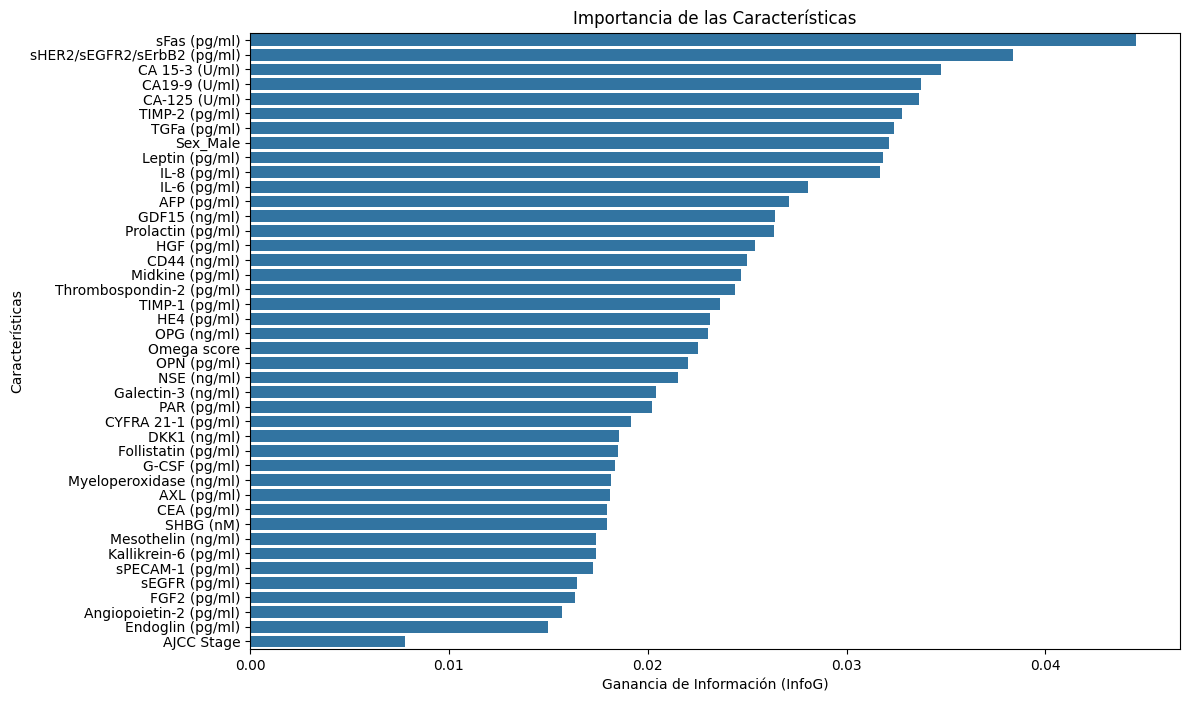

In [22]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que no hay datos faltantes
df = df_combined_transformed.dropna()

# Separar características y etiqueta
X = df.drop(columns=['Tumor type'])  # Asumiendo que la columna de destino se llama 'CancerType'
y = df['Tumor type']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=250, random_state=42)
rf.fit(X_train, y_train)

# Obtener la importancia de las características
feature_importances = rf.feature_importances_
features = X.columns

# Crear un DataFrame con las importancias de las características
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Ordenar las características por importancia
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Graficar la importancia de las características
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importancia de las Características')
plt.xlabel('Ganancia de Información (InfoG)')
plt.ylabel('Características')
plt.show()

# Guardar los resultados en un archivo CSV
importance_df.to_csv('feature_importances.csv', index=False)


In [23]:
# 20 primeros features
top_20_importance_df = importance_df.head(20)
top_20_importance_df

Feature  Importance
31                 sFas (pg/ml)    0.044544
33  sHER2/sEGFR2/sErbB2 (pg/ml)    0.038370
4                CA 15-3 (U/ml)    0.034747
5                 CA19-9 (U/ml)    0.033765
3                 CA-125 (U/ml)    0.033653
38               TIMP-2 (pg/ml)    0.032779
35                 TGFa (pg/ml)    0.032361
41                     Sex_Male    0.032141
21               Leptin (pg/ml)    0.031827
19                 IL-8 (pg/ml)    0.031686
18                 IL-6 (pg/ml)    0.028046
0                   AFP (pg/ml)    0.027086
15                GDF15 (ng/ml)    0.026415
29            Prolactin (pg/ml)    0.026332
17                  HGF (pg/ml)    0.025399
6                  CD44 (ng/ml)    0.025003
23              Midkine (pg/ml)    0.024707
36     Thrombospondin-2 (pg/ml)    0.024402
37               TIMP-1 (pg/ml)    0.023657
16                  HE4 (pg/ml)    0.023151

In [24]:
# Guardamos en excel para facilidad de llamado del dataset y registro (Buenas prácticas)
df_combined_transformed.to_excel('df_transformado.xlsx')

# XGBoost y LightGBM en la Detección de Tipos de Cáncer con Variable Objetivo Desbalanceada

XGBoost (Extreme Gradient Boosting) y LightGBM (Light Gradient Boosting Machine) son algoritmos de boosting que han demostrado ser extremadamente eficaces en una amplia gama de problemas de clasificación y regresión, incluidos aquellos con variables objetivo desbalanceadas, como la detección de tipos de cáncer. Aquí se explican las razones de su efectividad:

## XGBoost

1. **Boosting por Gradiente**:
   - XGBoost es un algoritmo de boosting por gradiente que crea árboles de decisión de manera secuencial, donde cada árbol intenta corregir los errores del árbol anterior. Esto permite una alta capacidad predictiva.

2. **Manejo de Datos Desbalanceados**:
   - XGBoost incluye parámetros específicos para manejar el desbalanceo de clases, como `scale_pos_weight`, que ajusta el peso de las clases para contrarrestar el desequilibrio. Este ajuste ayuda a que el modelo sea más sensible a la clase minoritaria, que en el caso de la detección de cáncer, puede ser crucial.

3. **Regularización**:
   - XGBoost implementa técnicas de regularización (L1 y L2), que ayudan a reducir el sobreajuste, mejorando así la capacidad del modelo para generalizar en datos nuevos.

4. **Eficiencia Computacional**:
   - Utiliza optimizaciones a nivel de hardware y software, como el uso de multiprocesamiento y la implementación de árboles de decisión altamente optimizados. Esto permite manejar grandes volúmenes de datos de manera eficiente.

5. **Importancia de Características**:
   - XGBoost proporciona medidas de importancia de las características, lo que permite identificar los biomarcadores más relevantes en el diagnóstico de tipos de cáncer.

## LightGBM

1. **Boosting por Hojas (Leaf-wise)**:
   - LightGBM utiliza un método de crecimiento de árboles basado en hojas, en lugar de niveles (nivel por nivel). Esto le permite manejar datos desbalanceados de manera más efectiva, ya que puede concentrarse en las hojas con mayor error.

2. **Tratamiento del Desbalanceo**:
   - Similar a XGBoost, LightGBM tiene parámetros como `is_unbalance` y `scale_pos_weight`, que permiten al modelo ajustarse automáticamente para manejar datos desbalanceados.

3. **Velocidad y Eficiencia**:
   - LightGBM es conocido por su alta velocidad y eficiencia, especialmente en grandes conjuntos de datos. Utiliza técnicas como histogram-based decision tree learning para acelerar el proceso de entrenamiento.

4. **Capacidad de Escalabilidad**:
   - Puede manejar grandes volúmenes de datos con alta dimensionalidad, lo que es común en datasets médicos. Esto se debe a su diseño optimizado para memoria y capacidad de paralelización.

5. **Reducción del Overfitting**:
   - Incluye técnicas avanzadas de regularización y parámetros ajustables que permiten minimizar el riesgo de sobreajuste, mejorando la precisión en datos no vistos.

## Aplicación en la Detección de Tipos de Cáncer

- **Detección Temprana y Precisa**:
  Ambos algoritmos permiten una detección temprana y precisa de tipos de cáncer al identificar patrones complejos y sutiles en los datos que pueden no ser detectables con otros métodos.

- **Adaptabilidad a Datos Desbalanceados**:
  En los datos médicos, las clases desbalanceadas son comunes (por ejemplo, más casos de no-cáncer que de cáncer). La capacidad de estos algoritmos para ajustar los pesos de las clases permite mejorar la sensibilidad y especificidad de la detección.

- **Identificación de Biomarcadores**:
  La importancia de las características derivadas de estos modelos ayuda a identificar los biomarcadores clave para el diagnóstico y pronóstico del cáncer.

En resumen, XGBoost y LightGBM son algoritmos potentes y eficientes que manejan bien los datos desbalanceados y ofrecen una gran capacidad predictiva y eficiencia computacional, lo que los hace ideales para aplicaciones críticas como la detección de tipos de cáncer.


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import xgboost as xgb
import lightgbm as lgb

# Asegurarse de que no hay datos faltantes
df = df_combined_transformed.dropna()

# Seleccionar solo las características importantes
important_features = [
    'sFas (pg/ml)',
    'sHER2/sEGFR2/sErbB2 (pg/ml)',
    'CA 15-3 (U/ml)',
    'CA19-9 (U/ml)',
    'CA-125 (U/ml)',
    'TIMP-2 (pg/ml)',
    'TGFa (pg/ml)',
    'Sex_Male',
    'Leptin (pg/ml)',
    'IL-8 (pg/ml)',
    'IL-6 (pg/ml)',
    'AFP (pg/ml)',
    'GDF15 (ng/ml)',
    'Prolactin (pg/ml)',
    'HGF (pg/ml)',
    'CD44 (ng/ml)',
    'Midkine (pg/ml)',
    'Thrombospondin-2 (pg/ml)',
    'TIMP-1 (pg/ml)',
    'HE4 (pg/ml)'
]

# Separar características y etiqueta
X = df[important_features]
y = df['Tumor type']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Definir los modelos y sus hiperparámetros
modelos = {
    "XGBoost": xgb.XGBClassifier(n_estimators=50, max_depth=4, learning_rate=0.01, random_state=42),
    "LightGBM": lgb.LGBMClassifier(n_estimators=50, max_depth=4, learning_rate=0.01, random_state=42)
}

# Inicializar el DataFrame de resultados
tabla_results_df = pd.DataFrame(columns=['Model', 'Set', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Global Score'])

# Entrenar y evaluar modelos
for modelo_nombre, modelo in modelos.items():
    print(f"\nModelo: {modelo_nombre}")
    entrenar_y_evaluar_modelo(X_train, y_train, X_test, y_test, modelo, modelo_nombre)

# Guardar los resultados en un archivo CSV
tabla_results_df.to_csv('XGBoost_LightGBM.csv', index=True)



Modelo: XGBoost
Cross-validated accuracy: 0.6762
Model performance for Training - XGBoost
- Accuracy: 0.8221
- F1 score: 0.8134
- Precision: 0.8328
- Recall: 0.8221
Confusion Matrix:
 [[146  15   0   0   4   0   2   0]
 [ 12 293   0   1   3   0   0   2]
 [  3  16  14   0   1   1   0   1]
 [  3   9   1  20   0   0   1   1]
 [ 11  17   0   0  54   1   0   0]
 [  2   2   0   0   0  39   0   0]
 [  2   5   0   0   1   0  66   0]
 [  4  18   0   1   3   0   0  29]]
Model performance for Test - XGBoost
- Accuracy: 0.6468
- F1 score: 0.6174
- Precision: 0.6233
- Recall: 0.6468
Confusion Matrix:
 [[31  2  1  0  7  0  1  0]
 [ 4 68  1  0  2  0  1  1]
 [ 0  8  0  1  0  0  0  0]
 [ 0  4  0  4  0  1  0  0]
 [ 5 10  0  0  5  1  0  0]
 [ 4  0  0  0  0  7  0  0]
 [ 1  3  1  0  0  1 12  1]
 [ 0 10  0  0  0  0  0  3]]

Modelo: LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.

C:\Users\FloCr\AppData\Local\Temp\ipykernel_15756\1013006817.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tabla_results_df = pd.concat([tabla_results_df, new_row], ignore_index=True)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000271 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3850
[LightGBM] [Info] Number of data points in the train set: 723, number of used features: 20
[LightGBM] [Info] Start training from score -1.566129
[LightGBM] [Info] Start training from score -0.948620
[LightGBM] [Info] Start training from score -3.117673
[LightGBM] [Info] Start training from score -3.149422
[LightGBM] [Info] Start training from score -2.279344
[LightGBM] [Info] Start training from score -2.919848
[LightGBM] [Info] Start training from score -2.378717
[LightGBM] [Info] Start training from score -2.691589
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

c:\Users\FloCr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
XGBoost_LightGBM = pd.read_csv('XGBoost_LightGBM.csv')
XGBoost_LightGBM

Unnamed: 0     Model       Set  Accuracy  Precision    Recall  F1-Score  \
0           0   XGBoost  Training  0.822139   0.832805  0.822139  0.813388   
1           1   XGBoost      Test  0.646766   0.623312  0.646766  0.617399   
2           2  LightGBM  Training  0.708955   0.799136  0.708955  0.657890   
3           3  LightGBM      Test  0.582090   0.529273  0.582090  0.502930   

   Global Score  
0         82.26  
1         63.36  
2         71.87  
3         54.91

# Ensamble de modelos (Voting Classifier)

## Utilización de un Ensamble de Modelos para Mejorar la Detección de Tipos de Cáncer

La utilización de un ensamble de modelos es una técnica poderosa para mejorar el rendimiento y la robustez de los modelos de machine learning. En el contexto de detección de tipos de cáncer con variables objetivo desbalanceadas, el ensamble puede proporcionar varias ventajas significativas:

## Razones para Utilizar un Ensamble de Modelos

### Reducción del Overfitting

- **Promedio de Errores**: Al combinar varios modelos, los errores específicos de cada modelo tienden a cancelarse entre sí. Esto ayuda a reducir el overfitting, ya que los modelos individuales pueden sobreajustarse a ruidos o patrones específicos del conjunto de entrenamiento, pero estos errores se compensan cuando se utilizan múltiples modelos.

### Mejora de la Generalización

- **Diversidad de Modelos**: Diferentes modelos pueden capturar diferentes aspectos de los datos. Por ejemplo, XGBoost y LightGBM, aunque ambos son métodos de boosting, tienen diferentes mecanismos internos que pueden captar distintas características del conjunto de datos. Un ensamble puede aprovechar estas diferencias y mejorar la capacidad de generalización del modelo final.

### Estabilidad y Robustez

- **Promedio de Resultados**: La combinación de múltiples modelos tiende a producir resultados más estables y robustos frente a variaciones en los datos. Esto es especialmente importante en aplicaciones críticas como la detección de cáncer, donde las predicciones erróneas pueden tener consecuencias graves.

### Manejo de Datos Desbalanceados

- **Balance de Clases**: Al utilizar técnicas de ensamble, se pueden diseñar estrategias específicas para manejar datos desbalanceados, como ajustar los pesos de las clases o utilizar técnicas de resampling dentro del ensamble. Esto puede mejorar la sensibilidad y especificidad de las predicciones para la clase minoritaria.


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Inicializar DataFrame para almacenar resultados
tabla_results_df = pd.DataFrame(columns=['Model', 'Set', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Global Score'])

# Asegurarse de que no hay datos faltantes
df = df_combined_transformed.dropna()

# Seleccionar solo las características importantes
important_features = [
    'sFas (pg/ml)',
    'sHER2/sEGFR2/sErbB2 (pg/ml)',
    'CA 15-3 (U/ml)',
    'CA19-9 (U/ml)',
    'CA-125 (U/ml)',
    'TIMP-2 (pg/ml)',
    'TGFa (pg/ml)',
    'Sex_Male',
    'Leptin (pg/ml)',
    'IL-8 (pg/ml)',
    'IL-6 (pg/ml)',
    'AFP (pg/ml)',
    'GDF15 (ng/ml)',
    'Prolactin (pg/ml)',
    'HGF (pg/ml)',
    'CD44 (ng/ml)',
    'Midkine (pg/ml)',
    'Thrombospondin-2 (pg/ml)',
    'TIMP-1 (pg/ml)',
    'HE4 (pg/ml)'
]

# Separar características y etiqueta
X = df[important_features]
y = df['Tumor type']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Definir los modelos base con parámetros similares a los especificados anteriormente
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.03, max_depth=7, random_state=42)
lgbm = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.04, max_depth=7, random_state=42)
xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.04, max_depth=7, random_state=42)

# Definir combinaciones de modelos para VotingClassifier
combinations = [
    ('Gradient Boosting + LightGBM', [('gb', gb), ('lgbm', lgbm)]),
    ('Gradient Boosting + XGBoost', [('gb', gb), ('xgb', xgb_clf)]),
    ('LightGBM + XGBoost', [('lgbm', lgbm), ('xgb', xgb_clf)]),
    ('Gradient Boosting + LightGBM + XGBoost', [('gb', gb), ('lgbm', lgbm), ('xgb', xgb_clf)])
]

# Entrenar y evaluar cada combinación
for name, combination in combinations:
    voting_clf = VotingClassifier(estimators=combination, voting='soft')
    entrenar_y_evaluar_modelo(X_train, y_train, X_test, y_test, voting_clf, name)

# Guardar resultados en un archivo CSV
tabla_results_df.to_csv('Voting_classifier.csv', index=False)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3753
[LightGBM] [Info] Number of data points in the train set: 723, number of used features: 20
[LightGBM] [Info] Start training from score -1.566129
[LightGBM] [Info] Start training from score -0.952197
[LightGBM] [Info] Start training from score -3.086902
[LightGBM] [Info] Start training from score -3.149422
[LightGBM] [Info] Start training from score -2.279344
[LightGBM] [Info] Start training from score -2.919848
[LightGBM] [Info] Start training from score -2.393754
[LightGBM] [Info] Start training from score -2.671386
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

In [ ]:
Voting_clasiffier = pd.read_csv('Voting_classifier.csv')
Voting_clasiffier

Model       Set  Accuracy  Precision  \
0            Gradient Boosting + LightGBM  Training  1.000000   1.000000   
1            Gradient Boosting + LightGBM      Test  0.726368   0.699776   
2             Gradient Boosting + XGBoost  Training  1.000000   1.000000   
3             Gradient Boosting + XGBoost      Test  0.696517   0.681829   
4                      LightGBM + XGBoost  Training  1.000000   1.000000   
5                      LightGBM + XGBoost      Test  0.706468   0.691023   
6  Gradient Boosting + LightGBM + XGBoost  Training  1.000000   1.000000   
7  Gradient Boosting + LightGBM + XGBoost      Test  0.721393   0.704977   

     Recall  F1-Score  Global Score  
0  1.000000  1.000000        100.00  
1  0.726368  0.703220         71.39  
2  1.000000  1.000000        100.00  
3  0.696517  0.679164         68.85  
4  1.000000  1.000000        100.00  
5  0.706468  0.685159         69.73  
6  1.000000  1.000000        100.00  
7  0.721393  0.701901         71.24

### Gradient Boosting + LightGBM + XGBoost

Esta combinación tiene el mejor rendimiento en el conjunto de prueba. Esto sugiere que la inclusión de los tres modelos de boosting logra capturar mejor los patrones subyacentes en los datos, proporcionando la mejor capacidad de generalización entre todas las combinaciones probadas.

## Conclusiones

### Sobreajuste

Todas las combinaciones muestran un alto grado de sobreajuste en el conjunto de entrenamiento. Es crucial abordar este problema para mejorar la capacidad de generalización de los modelos. Técnicas de regularización, validación cruzada y ajuste de hiperparámetros podrían ser útiles.

### Mejora Gradual

Vemos una mejora gradual en las métricas de rendimiento en el conjunto de prueba al combinar modelos adicionales. Esto confirma la hipótesis de que un ensamble de modelos puede capturar mejor los diversos patrones en los datos, compensando las debilidades de los modelos individuales.




### Tratamiento del sobre ajuste 

In [ ]:
tabla_results_df = pd.DataFrame(columns=['Model', 'Set', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Global Score'])

# Asegurarse de que no hay datos faltantes
df = df_combined_transformed.dropna()

# Seleccionar solo las características importantes
important_features = [
    'sFas (pg/ml)',
    'sHER2/sEGFR2/sErbB2 (pg/ml)',
    'CA 15-3 (U/ml)',
    'CA19-9 (U/ml)',
    'CA-125 (U/ml)',
    'TIMP-2 (pg/ml)',
    'TGFa (pg/ml)',
    'Sex_Male',
    'Leptin (pg/ml)',
    'IL-8 (pg/ml)',
    'IL-6 (pg/ml)',
    'AFP (pg/ml)',
    'GDF15 (ng/ml)',
    'Prolactin (pg/ml)',
    'HGF (pg/ml)',
    'CD44 (ng/ml)',
    'Midkine (pg/ml)',
    'Thrombospondin-2 (pg/ml)',
    'TIMP-1 (pg/ml)',
    'HE4 (pg/ml)'
]

# Separar características y etiqueta
X = df[important_features]
y = df['Tumor type']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Definir los modelos base con los parámetros proporcionados
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.02, max_depth=4, random_state=42)
lgbm = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.02, max_depth=4, random_state=42)
xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.02, max_depth=4, random_state=42)

# Definir la combinación de modelos para VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('gb', gb), 
    ('lgbm', lgbm), 
    ('xgb', xgb_clf)
], voting='soft')

model_name = 'Gradient Boosting + LightGBM + XGBoost'
entrenar_y_evaluar_modelo(X_train, y_train, X_test, y_test, voting_clf, model_name)

# Guardar resultados en un archivo CSV
tabla_results_df.to_csv('Gradient_Boosting_LightGBM_XGBoost.csv', index=False)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3753
[LightGBM] [Info] Number of data points in the train set: 723, number of used features: 20
[LightGBM] [Info] Start training from score -1.566129
[LightGBM] [Info] Start training from score -0.952197
[LightGBM] [Info] Start training from score -3.086902
[LightGBM] [Info] Start training from score -3.149422
[LightGBM] [Info] Start training from score -2.279344
[LightGBM] [Info] Start training from score -2.919848
[LightGBM] [Info] Start training from score -2.393754
[LightGBM] [Info] Start training from score -2.671386
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

C:\Users\FloCr\AppData\Local\Temp\ipykernel_14584\1013006817.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tabla_results_df = pd.concat([tabla_results_df, new_row], ignore_index=True)


In [ ]:
Gradient_Boosting_LightGBM_XGBoost = pd.read_csv('Gradient_Boosting_LightGBM_XGBoost.csv')
Gradient_Boosting_LightGBM_XGBoost

Model       Set  Accuracy  Precision  \
0  Gradient Boosting + LightGBM + XGBoost  Training  0.931592   0.934897   
1  Gradient Boosting + LightGBM + XGBoost      Test  0.681592   0.664823   

     Recall  F1-Score  Global Score  
0  0.931592  0.929895         93.20  
1  0.681592  0.643653         66.79

Es dificil eliminar el sobreajuste por ser un dataset pequeño

# No supervisado

In [ ]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, Birch, MeanShift, OPTICS
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler, NearMiss, CondensedNearestNeighbour
from imblearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score, davies_bouldin_score
import pandas as pd
from sklearn.model_selection import train_test_split

# Inicializar DataFrame para almacenar resultados
tabla_results_df = pd.DataFrame(columns=['Model', 'Metric', 'Score'])

def evaluar_clustering(X, y_true, labels, model_name):
    if len(set(labels)) <= 1:
        print(f"Model {model_name} produjo un solo cluster. Ignorando métricas.")
        return
    
    silhouette_avg = silhouette_score(X, labels)
    homogeneity = homogeneity_score(y_true, labels)
    completeness = completeness_score(y_true, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    
    print(f"Resultados para {model_name}:")
    print(f"Silhouette Score: {silhouette_avg:.4f}")
    print(f"Homogeneity: {homogeneity:.4f}")
    print(f"Completeness: {completeness:.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
    
    resultados = {
        'Model': [model_name] * 4,
        'Metric': ['Silhouette Score', 'Homogeneity', 'Completeness', 'Davies-Bouldin Index'],
        'Score': [silhouette_avg, homogeneity, completeness, davies_bouldin]
    }
    global tabla_results_df
    tabla_results_df = pd.concat([tabla_results_df, pd.DataFrame(resultados)], ignore_index=True)

# Definir los modelos
modelos = {
    'KMeans': KMeans(n_clusters=7, random_state=42),
    'DBSCAN': DBSCAN(eps=0.3, min_samples=5),
    'Agglomerative Clustering': AgglomerativeClustering(n_clusters=7),
    'Birch': Birch(n_clusters=7),
    'MeanShift': MeanShift(bandwidth=2),
    'OPTICS': OPTICS(min_samples=5)
}

# Seleccionar solo las características importantes
important_features = [
    'sFas (pg/ml)',
    'sHER2/sEGFR2/sErbB2 (pg/ml)',
    'CA 15-3 (U/ml)',
    'CA19-9 (U/ml)',
    'CA-125 (U/ml)',
    'TIMP-2 (pg/ml)',
    'TGFa (pg/ml)',
    'Sex_Male',
    'Leptin (pg/ml)',
    'IL-8 (pg/ml)',
    'IL-6 (pg/ml)',
    'AFP (pg/ml)',
    'GDF15 (ng/ml)',
    'Prolactin (pg/ml)',
    'HGF (pg/ml)',
    'CD44 (ng/ml)',
    'Midkine (pg/ml)',
    'Thrombospondin-2 (pg/ml)',
    'TIMP-1 (pg/ml)',
    'HE4 (pg/ml)'
]

# Separar características y etiqueta
X = df_combined_transformed[important_features]
y = df_combined_transformed['Tumor type']

# Reducir dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Entrenar y evaluar modelos
for modelo_nombre, modelo in modelos.items():
    print(f"\nModelo: {modelo_nombre}")
    model_name = f"{modelo_nombre}"
    modelo.fit(X_pca)
    labels = modelo.labels_ if hasattr(modelo, 'labels_') else modelo.predict(X_pca)
    evaluar_clustering(X_pca, y, labels, model_name)
    
# Guardar los resultados en un archivo Excel
tabla_results_df.to_excel('Results_No_supervisado.xlsx', index=False)



Modelo: KMeans


Resultados para KMeans:
Silhouette Score: 0.5078
Homogeneity: 0.0846
Completeness: 0.1618
Davies-Bouldin Index: 0.4704

Modelo: DBSCAN
Resultados para DBSCAN:
Silhouette Score: 0.3215
Homogeneity: 0.0281
Completeness: 0.1536
Davies-Bouldin Index: 1.7383

Modelo: Agglomerative Clustering
Resultados para Agglomerative Clustering:
Silhouette Score: 0.5193
Homogeneity: 0.0826
Completeness: 0.1464
Davies-Bouldin Index: 0.5203

Modelo: Birch


C:\Users\FloCr\AppData\Local\Temp\ipykernel_14584\2547688822.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tabla_results_df = pd.concat([tabla_results_df, pd.DataFrame(resultados)], ignore_index=True)


Resultados para Birch:
Silhouette Score: 0.7593
Homogeneity: 0.0333
Completeness: 0.2733
Davies-Bouldin Index: 0.2354

Modelo: MeanShift
Resultados para MeanShift:
Silhouette Score: 0.7124
Homogeneity: 0.0240
Completeness: 0.2401
Davies-Bouldin Index: 0.2261

Modelo: OPTICS
Resultados para OPTICS:
Silhouette Score: -0.1916
Homogeneity: 0.1749
Completeness: 0.1176
Davies-Bouldin Index: 1.9106


In [ ]:
Results_No_supervisado = pd.read_excel('Results_No_supervisado.xlsx')
Results_No_supervisado

Model                Metric     Score
0                     KMeans      Silhouette Score  0.507759
1                     KMeans           Homogeneity  0.084649
2                     KMeans          Completeness  0.161828
3                     KMeans  Davies-Bouldin Index  0.470376
4                     DBSCAN      Silhouette Score  0.321461
5                     DBSCAN           Homogeneity  0.028120
6                     DBSCAN          Completeness  0.153577
7                     DBSCAN  Davies-Bouldin Index  1.738256
8   Agglomerative Clustering      Silhouette Score  0.519311
9   Agglomerative Clustering           Homogeneity  0.082623
10  Agglomerative Clustering          Completeness  0.146401
11  Agglomerative Clustering  Davies-Bouldin Index  0.520300
12                     Birch      Silhouette Score  0.759317
13                     Birch           Homogeneity  0.033259
14                     Birch          Completeness  0.273319
15                     Birch  Davies-Bouldin Index  0.235386
16                 MeanShift      Silhouette Score  0.712432
17                 MeanShift           Homogeneity  0.023990
18                 MeanShift          Completeness  0.240052
19                 MeanShift  Davies-Bouldin Index  0.226063
20                    OPTICS      Silhouette Score -0.191600
21                    OPTICS           Homogeneity  0.174898
22                    OPTICS          Completeness  0.117642
23                    OPTICS  Davies-Bouldin Index  1.910613

# Conclusión sobre el Clustering No Supervisado en Nuestro Dataset

Después de analizar los resultados de los distintos algoritmos de clustering no supervisado, podemos llegar a las siguientes conclusiones:

## Análisis de Resultados

### Silhouette Score

- **Birch** y **MeanShift** obtuvieron los mejores puntajes, indicando clusters relativamente bien definidos.
- Sin embargo, el resto de los modelos, especialmente **OPTICS** y **DBSCAN**, tuvieron puntajes bajos o negativos, sugiriendo una formación de clusters débil o inexistente.

### Homogeneity y Completeness

- Ninguno de los modelos mostró una homogeneidad o completitud significativamente alta, lo que indica que los clusters formados no corresponden claramente a ninguna estructura subyacente en las clases del dataset.

### Davies-Bouldin Index

- **Birch** y **MeanShift** obtuvieron los mejores índices, lo que respalda la idea de que forman clusters más compactos y separados.
- No obstante, los otros modelos mostraron índices altos, sugiriendo clusters de baja calidad.

## Interpretación General

- **Clusters No Bien Definidos**: A pesar de que Birch y MeanShift han mostrado algunos resultados positivos, la calidad de los clusters generados por la mayoría de los algoritmos no es suficientemente buena para aportar valor significativo a nuestro problema.
- **Heterogeneidad de Clusters**: La homogeneidad y completitud bajas sugieren que los clusters contienen una mezcla de clases, lo que indica que los modelos no están capturando bien las estructuras subyacentes en los datos.

## Conclusión Final

El análisis sugiere que el clustering no supervisado no aporta mucho valor a nuestro problema con este dataset. A pesar de que algunos algoritmos como Birch y MeanShift mostraron resultados decentes en ciertas métricas, la falta de clusters bien definidos y la baja homogeneidad y completitud indican que los modelos no están capturando estructuras significativas en los datos.


# Plan para Mejorar el Dataset Utilizando UMAP y KMeans

Dado que los métodos de clustering no supervisado no han proporcionado métricas satisfactorias, hemos decidido adoptar una nueva estrategia para mejorar nuestro dataset. Nuestro objetivo principal es aumentar y enriquecer nuestro dataset, que actualmente cuenta con solo 1005 filas. Para ello, utilizaremos UMAP para la reducción de dimensionalidad y KMeans para identificar subgrupos, que luego añadiremos a nuestro dataset.

## Objetivos y Pasos

### Objetivo

Mejorar el dataset actual de 1005 filas añadiendo información sobre subgrupos identificados mediante clustering.

### Pasos

#### Reducción de Dimensionalidad con UMAP

- **Objetivo**: Visualizar los datos en un espacio de menor dimensión para identificar patrones y estructuras subyacentes.
- **Método**: Aplicar UMAP (Uniform Manifold Approximation and Projection) para reducir la dimensionalidad de los datos a 2D o 3D.

#### Identificación de Subgrupos con KMeans

- **Objetivo**: Identificar subgrupos dentro de los datos reducidos dimensionalmente.
- **Método**: Aplicar KMeans en los datos reducidos por UMAP para identificar clusters o subgrupos.

#### Añadir Subgrupos al Dataset Original

- **Objetivo**: Enriquecer el dataset original añadiendo una nueva columna que indique el subgrupo al que pertenece cada punto.
- **Método**: Agregar los subgrupos identificados por KMeans como una nueva columna en el dataset original.

## Beneficios de Esta Estrategia

- **Mayor Información**: Añadir subgrupos proporciona información adicional que puede ayudar a los modelos supervisados a capturar mejor las estructuras subyacentes en los datos.
- **Aumento de Datos**: Aunque no se aumentan las filas, se enriquece el dataset con nueva información, lo que puede mejorar el rendimiento de los modelos.
- **Mejor Visualización**: UMAP permite visualizar los datos en un espacio reducido, facilitando la identificación de patrones y anomalías.


Reducción de Dimensionalidad con UMAP

Primero, realizaremos la reducción de dimensionalidad utilizando UMAP para visualizar los datos y facilitar la detección de patrones.

C:\Users\FloCr\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


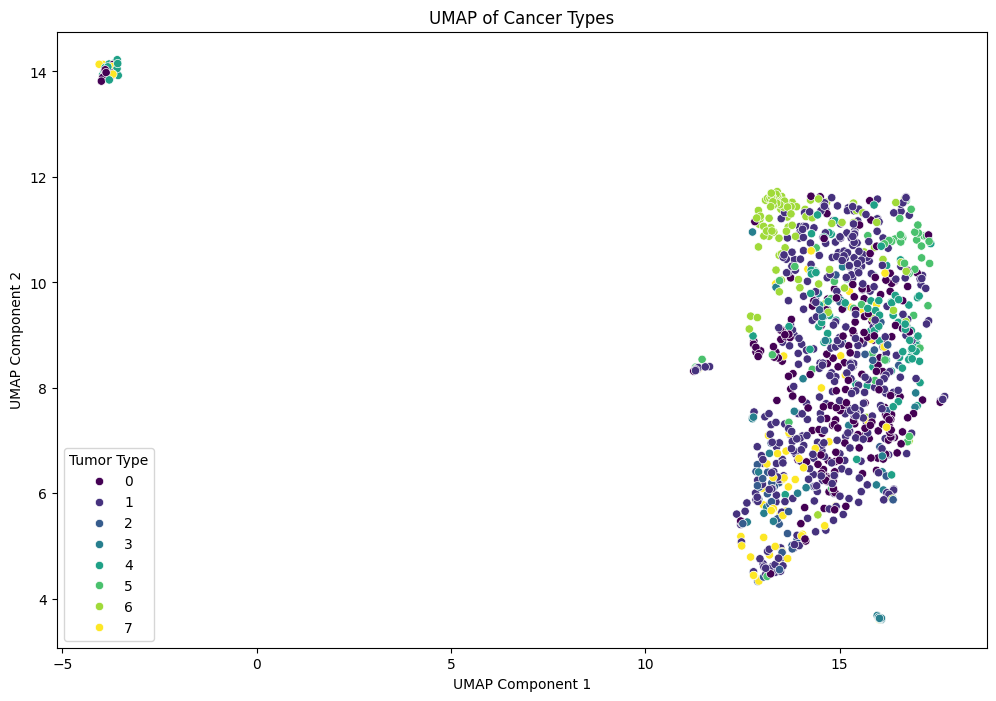

In [ ]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar características relevantes (excluyendo columnas no numéricas si es necesario)
features = df_combined_transformed.columns[1:-2]  # Asumiendo que las últimas dos columnas son 'Tumor type' y 'AJCC Stage'

# Separar las características y la variable objetivo
X = df_combined_transformed.drop(columns=['Tumor type'])
y = df_combined_transformed['Tumor type']

# Aplicar UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X)

# Visualización de UMAP
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=df_combined_transformed['Tumor type'], palette='viridis', legend='full')
plt.title('UMAP of Cancer Types')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(title='Tumor Type')
plt.show()


Clustering con K-Means

Aplicamos K-Means para identificar subgrupos en los datos.

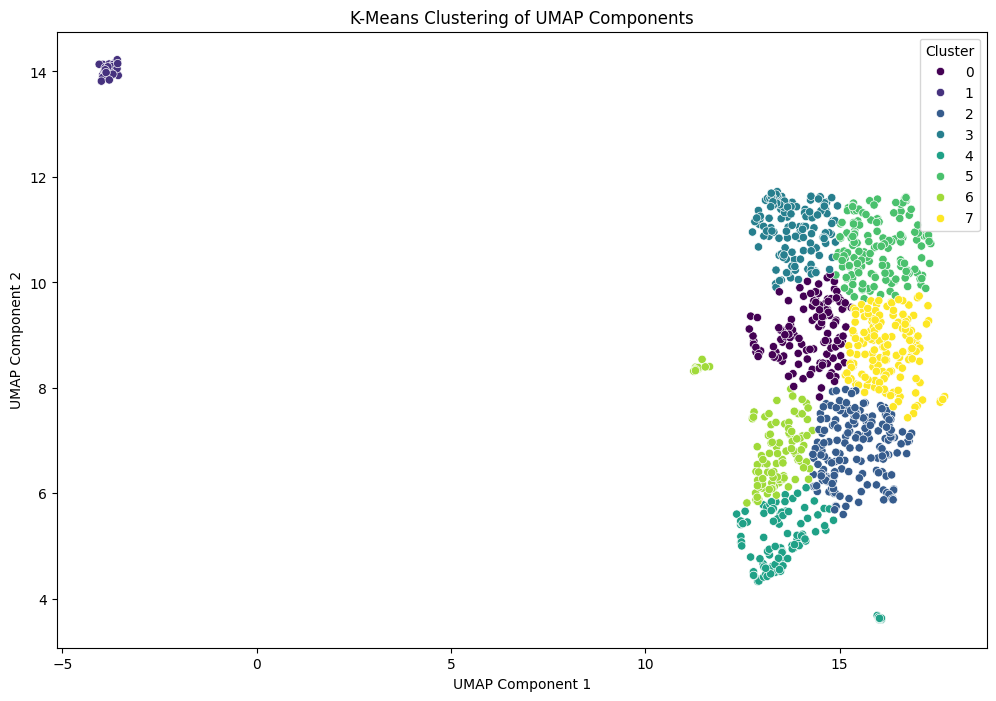

In [ ]:
from sklearn.cluster import KMeans

# Aplicar K-Means para agrupar los datos
kmeans = KMeans(n_clusters=8, random_state=42)
clusters = kmeans.fit_predict(X_umap)

# Visualización de Clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=clusters, palette='viridis', legend='full')
plt.title('K-Means Clustering of UMAP Components')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(title='Cluster')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Añadir clusters como nueva característica
df_combined_transformed['Cluster'] = clusters

# Seleccionar características y variable objetivo
X = df_combined_transformed[features.tolist() + ['Cluster']]
y = df_combined_transformed['Tumor type']

# División del dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Entrenar un clasificador de Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.68      0.71      0.70        42
           1       0.57      0.95      0.71        77
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         9
           4       0.57      0.19      0.29        21
           5       1.00      0.55      0.71        11
           6       0.87      0.68      0.76        19
           7       0.00      0.00      0.00        13

    accuracy                           0.63       201
   macro avg       0.46      0.39      0.40       201
weighted avg       0.56      0.63      0.56       201

[[30  9  0  0  3  0  0  0]
 [ 3 73  0  0  0  0  1  0]
 [ 1  8  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  1  0]
 [ 8  9  0  0  4  0  0  0]
 [ 0  5  0  0  0  6  0  0]
 [ 1  5  0  0  0  0 13  0]
 [ 1 12  0  0  0  0  0  0]]


c:\Users\FloCr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\FloCr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\FloCr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### Posibles Razones del Desempeño

#### Incoherencia en los Clusters

- Es posible que los clusters generados no sean lo suficientemente informativos o consistentes con las etiquetas originales. Esto puede agregar ruido en lugar de valor al modelo.

#### Complejidad del Modelo

- La inclusión de clusters puede haber aumentado la complejidad del modelo sin proporcionar una ganancia de información significativa, lo que puede llevar a un sobreajuste o subajuste.

### Próximos Pasos

Dado que el rendimiento del modelo no ha mejorado significativamente, seguiremos explorando otras técnicas para mejorar nuestro dataset y el rendimiento del modelo. 

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import lightgbm as lgb
import xgboost as xgb

# Añadir clusters como nueva característica
df_combined_transformed['Cluster'] = clusters

# Seleccionar características y variable objetivo
features = df_combined_transformed.columns[1:-2]
X = df_combined_transformed[features.tolist() + ['Cluster']]
y = df_combined_transformed['Tumor type']

# División del dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Definir los modelos individuales
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)
lgbm_clf = lgb.LGBMClassifier(random_state=42)
xgb_clf = xgb.XGBClassifier(random_state=42)

# Definir el Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_clf),
        ('gb', gb_clf),
        ('lgbm', lgbm_clf),
        ('xgb', xgb_clf)
    ],
    voting='soft'  # 'soft' uses predicted probabilities
)

# Entrenar el Voting Classifier
voting_clf.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
y_pred = voting_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000865 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8771
[LightGBM] [Info] Number of data points in the train set: 804, number of used features: 42
[LightGBM] [Info] Start training from score -1.571605
[LightGBM] [Info] Start training from score -0.949806
[LightGBM] [Info] Start training from score -3.106080
[LightGBM] [Info] Start training from score -3.134251
[LightGBM] [Info] Start training from score -2.270759
[LightGBM] [Info] Start training from score -2.928399
[LightGBM] [Info] Start training from score -2.385534
[LightGBM] [Info] Start training from score -2.682266
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

## Conclusiones y Próximos Pasos

El uso de un ensamble de modelos ha demostrado ser efectivo en mejorar el rendimiento del clasificador en nuestro dataset, incluso después de la incorporación de clusters como nuevas características. Este enfoque ha permitido obtener una mejor precisión y un equilibrio adecuado entre precisión y recall en la mayoría de las clases.

### Próximos Pasos

#### Optimización Adicional

- Realizar una optimización de hiperparámetros más exhaustiva para cada modelo dentro del ensamble y para el Voting Classifier en su conjunto. (Lo dejaremos para mas tarde si tenemos tiempo debido a la dificultad de computo)

#### Manejo de Clases Minoritarias

- Implementar técnicas adicionales para mejorar el rendimiento en las clases minoritarias, como ajuste de pesos de las clases en los modelos o uso de técnicas de resampling más sofisticadas. (Intentaremos centrarnos en esto)


# Uso de CTGAN para Manejar Clases Minoritarias en un Dataset Pequeño

Debido a que nuestro dataset cuenta con solo 1005 filas, hemos decidido utilizar Conditional Tabular Generative Adversarial Network (CTGAN) para generar datos sintéticos y así abordar el problema de las clases minoritarias. Aquí explicamos en detalle lo que estamos haciendo, para qué sirven los GANs y por qué es importante en nuestro caso.

## Objetivo

Generar datos sintéticos para las clases minoritarias en nuestro dataset para mejorar el balance de clases y proporcionar más datos para el entrenamiento de nuestros modelos supervisados.

## Explicación de CTGAN y su Importancia

### ¿Qué son los CTGAN?

Son un tipo de red neuronal compuesta por dos modelos:

- **Generador**: Crea datos sintéticos a partir de ruido aleatorio.
- **Discriminador**: Distingue entre los datos reales y los datos sintéticos generados.

Estos dos modelos se entrenan de manera conjunta y competitiva: el generador intenta engañar al discriminador creando datos sintéticos realistas, mientras que el discriminador intenta mejorar su capacidad para diferenciar entre datos reales y sintéticos.

### ¿Por qué usar CTGAN en nuestro Dataset?

1. **Incremento de Datos**: Nuestro dataset original es pequeño (1005 filas). CTGAN nos permiten generar datos sintéticos adicionales que pueden enriquecer nuestro dataset y mejorar el rendimiento de los modelos supervisados.
2. **Manejo de Clases Minoritarias**: Algunas clases en nuestro dataset están subrepresentadas.CTGAN pueden generar ejemplos sintéticos de estas clases minoritarias, ayudando a balancear el dataset y a mejorar la capacidad del modelo para aprender y generalizar sobre estas clases.
3. **Mejora del Modelo**: Al proporcionar más ejemplos para las clases minoritarias, esperamos mejorar la precisión y el recall de nuestro modelo en estas clases, reduciendo el sesgo y la varianza.


In [ ]:
import numpy as np
import pandas as pd
from ctgan import CTGAN
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
import lightgbm as lgb
import xgboost as xgb

# Asegurarse de que no hay datos faltantes
df = df_combined_transformed.dropna()

# Seleccionar solo las características importantes
important_features = [
    'sFas (pg/ml)', 'sHER2/sEGFR2/sErbB2 (pg/ml)', 'CA 15-3 (U/ml)', 'CA19-9 (U/ml)', 'CA-125 (U/ml)',
    'TIMP-2 (pg/ml)', 'TGFa (pg/ml)', 'Sex_Male', 'Leptin (pg/ml)', 'IL-8 (pg/ml)', 'IL-6 (pg/ml)',
    'AFP (pg/ml)', 'GDF15 (ng/ml)', 'Prolactin (pg/ml)', 'HGF (pg/ml)', 'CD44 (ng/ml)', 'Midkine (pg/ml)',
    'Thrombospondin-2 (pg/ml)', 'TIMP-1 (pg/ml)', 'HE4 (pg/ml)'
]

# Separar características y etiquetas de los datos reales
X_real = df[important_features]
y_real = df['Tumor type']

# Combinar características y etiquetas para el entrenamiento de CTGAN
data = df[important_features + ['Tumor type']]

# Definir el modelo CTGAN
ctgan = CTGAN(epochs=1000)

# Entrenar el modelo CTGAN
ctgan.fit(data, discrete_columns=['Tumor type'])

# Generar datos sintéticos para cada clase especificada
classes_to_synthesize = [2, 3, 4, 5, 6, 7]
synthetic_data = []

for tumor_type in classes_to_synthesize:
    class_data = data[data['Tumor type'] == tumor_type]
    num_samples = class_data.shape[0]
    
    # Generar datos sintéticos
    synthetic_class_data = ctgan.sample(num_samples)
    
    # Filtrar solo los datos sintéticos de la clase actual
    synthetic_class_data = synthetic_class_data[synthetic_class_data['Tumor type'] == tumor_type]
    
    synthetic_data.append(synthetic_class_data)

# Combinar todos los datos sintéticos generados
synthetic_df = pd.concat(synthetic_data, axis=0)

# Combinar datos sintéticos y reales
X_combined = pd.concat([X_real, synthetic_df[important_features]], axis=0)
y_combined = pd.concat([y_real, synthetic_df['Tumor type']], axis=0)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42, stratify=y_combined)

# Definir los modelos base con los parámetros proporcionados
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.02, max_depth=4, random_state=42)
lgbm = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.02, max_depth=4, random_state=42)
xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.02, max_depth=4, random_state=42)

# Definir la combinación de modelos para VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('gb', gb), 
    ('lgbm', lgbm), 
    ('xgb', xgb_clf)
], voting='soft')

# Inicializar DataFrame para almacenar resultados
tabla_results_df = pd.DataFrame(columns=['Model', 'Set', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Global Score'])

# Entrenar y evaluar la combinación de modelos
model_name = 'Gradient Boosting + LightGBM + XGBoost'
entrenar_y_evaluar_modelo(X_train, y_train, X_test, y_test, voting_clf, model_name)

# Guardar resultados en un archivo CSV
tabla_results_df.to_csv('Voting_classifier_ctgan.csv', index=False)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000396 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4169
[LightGBM] [Info] Number of data points in the train set: 756, number of used features: 20
[LightGBM] [Info] Start training from score -1.617406
[LightGBM] [Info] Start training from score -0.996830
[LightGBM] [Info] Start training from score -3.017123
[LightGBM] [Info] Start training from score -3.101681
[LightGBM] [Info] Start training from score -2.185390
[LightGBM] [Info] Start training from score -2.890372
[LightGBM] [Info] Start training from score -2.337582
[LightGBM] [Info] Start training from score -2.602690
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

C:\Users\FloCr\AppData\Local\Temp\ipykernel_14584\1013006817.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tabla_results_df = pd.concat([tabla_results_df, new_row], ignore_index=True)


In [ ]:
ctgan_model = pd.read_csv("Voting_classifier_ctgan.csv")
ctgan_model

Model       Set  Accuracy  Precision  \
0  Gradient Boosting + LightGBM + XGBoost  Training  0.934524   0.938602   
1  Gradient Boosting + LightGBM + XGBoost      Test  0.687204   0.623921   

     Recall  F1-Score  Global Score  
0  0.934524  0.933119         93.52  
1  0.687204  0.642083         66.01

## Generar las curvas ROC

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 167, number of negative: 673
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000285 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4379
[LightGBM] [Info] Number of data points in the train set: 840, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.198810 -> initscore=-1.393752
[LightGBM] [Info] Start training from score -1.393752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

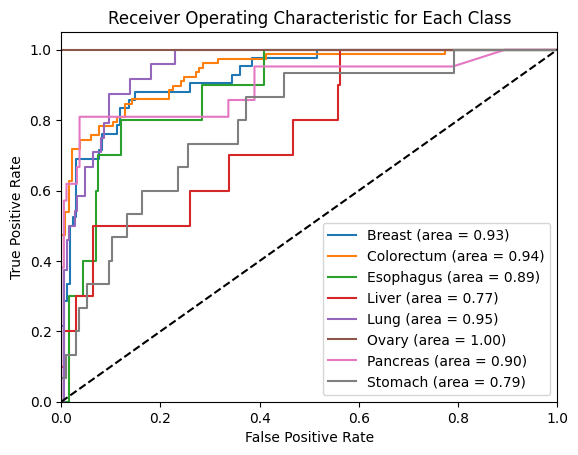

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

# Binarizar las etiquetas para ROC
y_train_bin = label_binarize(y_train, classes=np.unique(y_combined))
y_test_bin = label_binarize(y_test, classes=np.unique(y_combined))
n_classes = y_train_bin.shape[1]

# Definir el clasificador OneVsRest
classifier = OneVsRestClassifier(voting_clf)
y_score = classifier.fit(X_train, y_train_bin).predict_proba(X_test)

# Calcular la curva ROC y el área bajo la curva para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Obtener los nombres de las clases originales
class_names = label_encoder.inverse_transform(np.unique(y_train_encoded))

# Graficar las curvas ROC
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Each Class')
plt.legend(loc="lower right")
plt.show()


# Creacion de AUC Promedio Global 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 188, number of negative: 757
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000440 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4435
[LightGBM] [Info] Number of data points in the train set: 945, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.198942 -> initscore=-1.392921
[LightGBM] [Info] Start training from score -1.392921
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

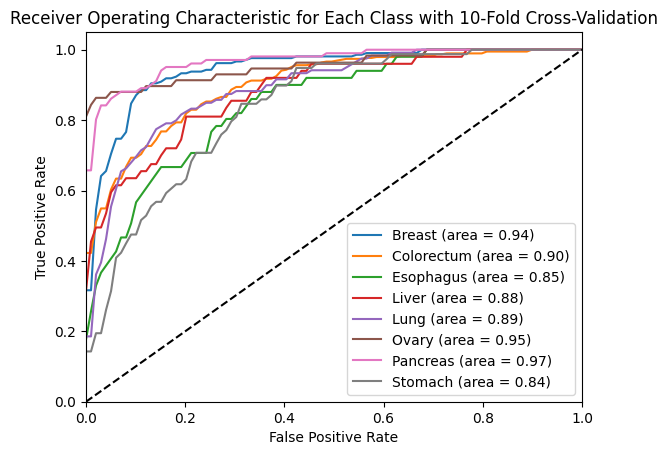

AUC promedio global ponderado: 0.91


In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Binarizar las etiquetas para ROC
y_combined_bin = label_binarize(y_combined, classes=np.unique(y_combined))
n_classes = y_combined_bin.shape[1]

# Definir el clasificador OneVsRest
classifier = OneVsRestClassifier(voting_clf)

# 10-fold cross-validation
cv = StratifiedKFold(n_splits=10)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

# Para almacenar fpr, tpr y roc_auc para cada clase
fpr = {i: [] for i in range(n_classes)}
tpr = {i: [] for i in range(n_classes)}
roc_auc = {i: [] for i in range(n_classes)}

for train, test in cv.split(X_combined, y_combined):
    X_train, X_test = X_combined.iloc[train], X_combined.iloc[test]
    y_train, y_test = y_combined_bin[train], y_combined_bin[test]

    y_score = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    for i in range(n_classes):
        fpr_fold, tpr_fold, _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc_fold = auc(fpr_fold, tpr_fold)
        
        fpr[i].append(fpr_fold)
        tpr[i].append(tpr_fold)
        roc_auc[i].append(roc_auc_fold)
        
        # Interpolación para promediar las curvas
        interp_tpr = np.interp(mean_fpr, fpr_fold, tpr_fold)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(roc_auc_fold)

# Calcular los valores medios y las bandas de confianza
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Obtener los nombres de las clases originales
class_names = label_encoder.inverse_transform(np.unique(y_train_encoded))

# Graficar las curvas ROC para cada clase
plt.figure()
for i in range(n_classes):
    mean_fpr_i = np.linspace(0, 1, 100)
    mean_tpr_i = np.mean([np.interp(mean_fpr_i, fpr_fold, tpr_fold) for fpr_fold, tpr_fold in zip(fpr[i], tpr[i])], axis=0)
    mean_tpr_i[-1] = 1.0
    mean_auc_i = auc(mean_fpr_i, mean_tpr_i)
    std_auc_i = np.std(roc_auc[i])
    plt.plot(mean_fpr_i, mean_tpr_i, label=f'{class_names[i]} (area = {mean_auc_i:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Each Class with 10-Fold Cross-Validation')
plt.legend(loc="lower right")
plt.show()

# Calcular AUC promedio global ponderado por la cantidad de muestras de cada clase
class_counts = y_combined_bin.sum(axis=0)
total_samples = len(y_combined)
weighted_auc = np.dot([np.mean(roc_auc[i]) for i in range(n_classes)], class_counts) / total_samples

print(f'AUC promedio global ponderado: {weighted_auc:.2f}')



# Hierarchical approach

In [ ]:
df = pd.read_excel("transformed_combined_dataframe.xlsx")
df

AFP (pg/ml)  Angiopoietin-2 (pg/ml)  AXL (pg/ml)  CA-125 (U/ml)  \
0       -0.162730               -0.399967     0.161177      -0.155628   
1       -0.161972               -0.412345    -0.862979      -0.155856   
2       -0.155496               -0.507819    -0.284533      -0.155194   
3       -0.150629               -0.584907    -0.928337      -0.155787   
4       -0.147157               -0.464835     1.144186      -0.131803   
...           ...                     ...          ...            ...   
1000    -0.162529               -0.168476    -0.876422      -0.155536   
1001    -0.142995               -0.562578    -0.431811      -0.106853   
1002    -0.148364               -0.353302    -0.605628      -0.155856   
1003    -0.161157               -0.206974     0.054145      -0.156015   
1004    -0.161577               -0.482293    -1.306079      -0.100463   

      CA 15-3 (U/ml)  CA19-9 (U/ml)  CD44 (ng/ml)  CEA (pg/ml)  \
0          -0.208773      -0.126586      0.100087    -0.177265   
1          -0.139035      -0.126858     -0.260427    -0.162648   
2          -0.255232       0.053126     -0.630079    -0.184200   
3          -0.230770      -0.106049      0.047755    -0.181969   
4           0.317763      -0.085735      2.054673    -0.192859   
...              ...            ...           ...          ...   
1000       -0.239253      -0.126601     -0.726438    -0.186948   
1001       -0.020372      -0.032200      0.319386    -0.146195   
1002       -0.237970      -0.126858     -0.399981    -0.201005   
1003       -0.186974      -0.126786     -0.694872    -0.208696   
1004       -0.246552      -0.093165     -0.637555    -0.170552   

      CYFRA 21-1 (pg/ml)  DKK1 (ng/ml)  ...  sHER2/sEGFR2/sErbB2 (pg/ml)  \
0              -0.118556     -0.748740  ...                     0.613042   
1              -0.117902     -0.268988  ...                    -0.502477   
2              -0.115457      0.867268  ...                    -0.710243   
3              -0.011969      0.210765  ...                    -0.584788   
4              -0.119066     -1.203243  ...                     0.827342   
...                  ...           ...  ...                          ...   
1000           -0.065832     -0.092237  ...                    -0.172675   
1001            0.002598     -0.672990  ...                     0.559587   
1002           -0.117902     -1.051742  ...                    -0.210727   
1003           -0.119163     -0.874991  ...                    -0.232628   
1004           -0.091464     -1.152742  ...                    -0.873070   

      sPECAM-1 (pg/ml)  TGFa (pg/ml)  Thrombospondin-2 (pg/ml)  \
0            -0.739088     -0.190133                 -0.501581   
1            -0.480916     -0.191864                 -0.504778   
2            -0.461172     -0.182823                 -0.367130   
3            -0.635555     -0.198597                 -0.488231   
4             1.377542     -0.207830                 -0.195666   
...                ...           ...                       ...   
1000         -0.547599     -0.189364                 -0.360039   
1001          0.196013      0.507743                 -0.076363   
1002         -0.548275     -0.191864                 -0.504778   
1003         -0.567034     -0.204752                 -0.378567   
1004         -0.961481     -0.202700                 -0.379586   

      TIMP-1 (pg/ml)  TIMP-2 (pg/ml)  Omega score  AJCC Stage  Sex_Male  \
0          -0.709657        0.506555    -0.168524           0         1   
1          -0.669592       -0.306917    -0.239250           1         1   
2          -0.404068       -1.120939    -0.243808           1         1   
3          -0.154741        1.505864    -0.042227           1         0   
4          -0.340628        1.733127    -0.215178           0         1   
...              ...             ...          ...         ...       ...   
1000       -0.860562       -0.525791    -0.224797           0         0   
1001       -0.091691        2.

In [ ]:
important_features = [
    'sFas (pg/ml)',
    'sHER2/sEGFR2/sErbB2 (pg/ml)',
    'CA 15-3 (U/ml)',
    'CA19-9 (U/ml)',
    'CA-125 (U/ml)',
    'TIMP-2 (pg/ml)',
    'TGFa (pg/ml)',
    'Sex_Male',
    'Leptin (pg/ml)',
    'IL-8 (pg/ml)',
    'IL-6 (pg/ml)',
    'AFP (pg/ml)',
    'GDF15 (ng/ml)',
    'Prolactin (pg/ml)',
    'HGF (pg/ml)',
    'CD44 (ng/ml)',
    'Midkine (pg/ml)',
    'Thrombospondin-2 (pg/ml)',
    'TIMP-1 (pg/ml)',
    'HE4 (pg/ml)'
]
data = df[important_features]
data = pd.concat([data, df["Tumor type"]], axis=1)

In [ ]:
data

sFas (pg/ml)  sHER2/sEGFR2/sErbB2 (pg/ml)  CA 15-3 (U/ml)  \
0        -0.422417                     0.613042       -0.208773   
1         0.063973                    -0.502477       -0.139035   
2        -0.199146                    -0.710243       -0.255232   
3         0.529084                    -0.584788       -0.230770   
4         0.084544                     0.827342        0.317763   
...            ...                          ...             ...   
1000     -0.047203                    -0.172675       -0.239253   
1001      0.586575                     0.559587       -0.020372   
1002      0.371740                    -0.210727       -0.237970   
1003     -0.422403                    -0.232628       -0.186974   
1004     -0.022164                    -0.873070       -0.246552   

      CA19-9 (U/ml)  CA-125 (U/ml)  TIMP-2 (pg/ml)  TGFa (pg/ml)  Sex_Male  \
0         -0.126586      -0.155628        0.506555     -0.190133         1   
1         -0.126858      -0.155856       -0.306917     -0.191864         1   
2          0.053126      -0.155194       -1.120939     -0.182823         1   
3         -0.106049      -0.155787        1.505864     -0.198597         0   
4         -0.085735      -0.131803        1.733127     -0.207830         1   
...             ...            ...             ...           ...       ...   
1000      -0.126601      -0.155536       -0.525791     -0.189364         0   
1001      -0.032200      -0.106853        2.174226      0.507743         0   
1002      -0.126858      -0.155856        0.435235     -0.191864         0   
1003      -0.126786      -0.156015       -0.971085     -0.204752         0   
1004      -0.093165      -0.100463       -0.756096     -0.202700         0   

      Leptin (pg/ml)  IL-8 (pg/ml)  ...  AFP (pg/ml)  GDF15 (ng/ml)  \
0           0.335096     -0.149317  ...    -0.162730      -0.213979   
1          -0.595553     -0.148890  ...    -0.161972      -0.337161   
2          -0.635702     -0.143859  ...    -0.155496      -0.453098   
3          -0.575523     -0.052849  ...    -0.150629      -0.257455   
4          -0.430957     -0.149795  ...    -0.147157      -0.460344   
...              ...           ...  ...          ...            ...   
1000       -0.316418     -0.148865  ...    -0.162529      -0.540050   
1001       -0.520014     -0.101284  ...    -0.142995      -0.395129   
1002        2.303682     -0.148890  ...    -0.148364      -0.337161   
1003        2.585799     -0.149016  ...    -0.161157      -0.424113   
1004       -0.432674     -0.139505  ...    -0.161577      -0.663232   

      Prolactin (pg/ml)  HGF (pg/ml)  CD44 (ng/ml)  Midkine (pg/ml)  \
0             -0.450003    -0.493403      0.100087        -0.205514   
1              0.887932    -0.502478     -0.260427        -0.110841   
2             -0.664531    -0.338173     -0.630079        -0.238480   
3              0.196455    -0.387295      0.047755        -0.147857   
4             -0.607585    -0.495675      2.054673        -0.175060   
...                 ...          ...           ...              ...   
1000          -0.158009    -0.457776     -0.726438        -0.263994   
1001          -0.611583     0.219918      0.319386        -0.103895   
1002           0.960088    -0.502478     -0.399981        -0.201139   
1003          -0.510167    -0.212413     -0.694872        -0.230533   
1004           0.047237     0.483906     -0.637555        -0.241492   

      Thrombospondin-2 (pg/ml)  TIMP-1 (pg/ml)  HE4 (pg/ml)  Tumor type  
0                    -0.501581       -0.709657     0.208254           1  
1                    -0.504778       -0.669592    -0.245247           4  
2                    -0.367130       -0.404068    -0.227085           1  
3                    -0.488231       -0.154741     0.219985           1  
4                    -0.195666       -0.340628    -0.256711           6  
...                        ...             ...          ...         ...  
1000                 -0.360039       -0.

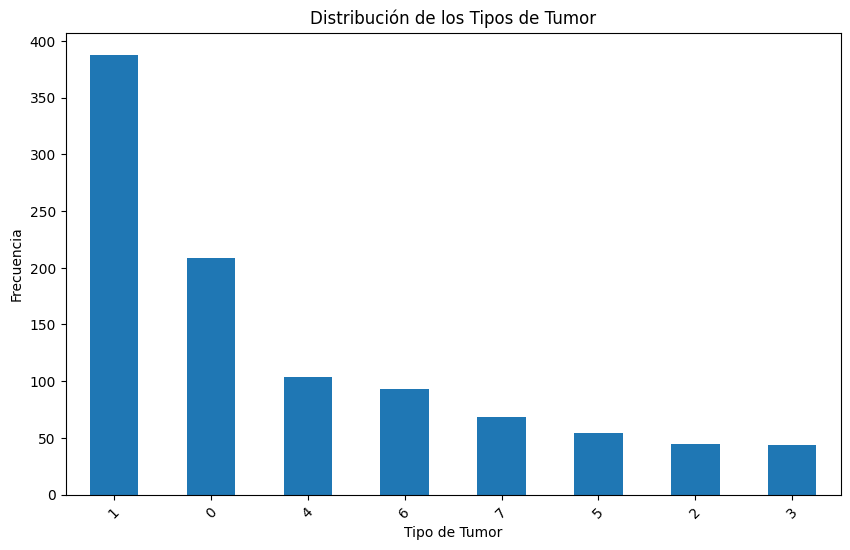

In [ ]:
tumor_counts = data['Tumor type'].value_counts()
plt.figure(figsize=(10, 6))
tumor_counts.plot(kind='bar')
plt.xlabel('Tipo de Tumor')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Tipos de Tumor')
plt.xticks(rotation=45)
plt.show()
threshold = 90
data['Majority_Minority'] = data['Tumor type'].apply(lambda x: 1 if tumor_counts[x] > threshold else 0)

In [ ]:
dff = pd.read_excel("df_final.xlsx")
dff["Tumor type"].value_counts()

Tumor type
Colorectum    388
Breast        209
Lung          104
Pancreas       93
Stomach        68
Ovary          54
Esophagus      45
Liver          44
Name: count, dtype: int64

In [ ]:
print(data[['Tumor type', 'Majority_Minority']].head(15))


    Tumor type  Majority_Minority
0            1                  1
1            4                  1
2            1                  1
3            1                  1
4            6                  1
5            1                  1
6            0                  1
7            0                  1
8            6                  1
9            4                  1
10           2                  0
11           0                  1
12           1                  1
13           0                  1
14           0                  1


In [ ]:
# Dividir en características y objetivo
X = data.drop(['Tumor type', 'Majority_Minority'], axis=1)
y = data['Majority_Minority']

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)

In [ ]:
rf_report = classification_report(y_test, y_rf_pred, target_names=['Minoritaria', 'Mayoritaria'])
print(rf_report)

              precision    recall  f1-score   support

 Minoritaria       0.69      0.44      0.54        41
 Mayoritaria       0.87      0.95      0.91       160

    accuracy                           0.85       201
   macro avg       0.78      0.69      0.72       201
weighted avg       0.83      0.85      0.83       201



In [ ]:
majority_data = data[data['Majority_Minority'] == 1]
minority_data = data[data['Majority_Minority'] == 0]

In [ ]:
X_majority = majority_data.drop(['Tumor type', 'Majority_Minority'], axis=1)
y_majority = majority_data['Tumor type']
X_minority = minority_data.drop(['Tumor type', 'Majority_Minority'], axis=1)
y_minority = minority_data['Tumor type']

In [ ]:
X_majority_train, X_majority_test, y_majority_train, y_majority_test = train_test_split(X_majority, y_majority, test_size=0.2, random_state=42)
X_minority_train, X_minority_test, y_minority_train, y_minority_test = train_test_split(X_minority, y_minority, test_size=0.2, random_state=42)

In [ ]:
model_majority = RandomForestClassifier(random_state=42)
model_majority.fit(X_majority_train, y_majority_train)
model_minority = RandomForestClassifier(random_state=42)
model_minority.fit(X_minority_train, y_minority_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_majority_pred = model_majority.predict(X_majority_test)
y_minority_pred = model_minority.predict(X_minority_test)

In [ ]:
majority_class_labels = ['Colorectum', 'Breast', 'Lung', 'Pancreas']
minority_class_labels = ['Stomach', 'Ovary', 'Esophagus', 'Liver']

In [ ]:
report_majority = classification_report(y_majority_test, y_majority_pred, target_names=majority_class_labels)
report_minority = classification_report(y_minority_test, y_minority_pred, target_names=minority_class_labels)

print("Reporte de clasificación para clases mayoritarias:")
print(report_majority)

print("Reporte de clasificación para clases minoritarias:")
print(report_minority)

Reporte de clasificación para clases mayoritarias:
              precision    recall  f1-score   support

  Colorectum       0.76      0.81      0.79        43
      Breast       0.85      0.91      0.88        80
        Lung       0.59      0.40      0.48        25
    Pancreas       0.80      0.73      0.76        11

    accuracy                           0.79       159
   macro avg       0.75      0.71      0.73       159
weighted avg       0.78      0.79      0.78       159

Reporte de clasificación para clases minoritarias:
              precision    recall  f1-score   support

     Stomach       0.57      0.50      0.53         8
       Ovary       0.58      0.78      0.67         9
   Esophagus       1.00      1.00      1.00        11
       Liver       0.69      0.60      0.64        15

    accuracy                           0.72        43
   macro avg       0.71      0.72      0.71        43
weighted avg       0.73      0.72      0.72        43



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Mapeo de los valores enteros a sus correspondientes tipos de tumor
tumor_mapping = {
    1: 'Colorectum',
    0: 'Breast',
    4: 'Lung',
    6: 'Pancreas',
    7: 'Stomach',
    5: 'Ovary',
    2: 'Esophagus',
    3: 'Liver'
}

# Cargar el dataset
file_path = 'transformed_combined_dataframe.xlsx'
data = pd.read_excel(file_path)

# Contar la cantidad de cada tipo de tumor
tumor_counts = data['Tumor type'].value_counts()

# Añadir columna de clasificación mayoritaria/minoritaria
threshold = 90
data['Majority_Minority'] = data['Tumor type'].apply(lambda x: 1 if tumor_counts.get(x, 0) > threshold else 0)

In [ ]:
# Dividir en características y objetivo
X = data.drop(['Tumor type', 'Majority_Minority'], axis=1)
y = data['Majority_Minority']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo de Random Forest para predecir mayoritarias vs minoritarias
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_rf_pred = rf_model.predict(X_test)

# Evaluar el modelo
rf_report = classification_report(y_test, y_rf_pred, target_names=['Minoritaria', 'Mayoritaria'])
print("Reporte de clasificación para mayoritarias vs minoritarias:")
print(rf_report)

# Subdividir los datos según las predicciones
data['Predicted_MM'] = rf_model.predict(data.drop(['Tumor type', 'Majority_Minority'], axis=1))

# Verificar las clases presentes en el conjunto de prueba
majority_data = data[data['Predicted_MM'] == 1].copy()
minority_data = data[data['Predicted_MM'] == 0].copy()

# Verificar la distribución de clases en majority_data antes de la subdivisión
print("Distribución de clases en majority_data antes de la subdivisión:")
print(majority_data['Tumor type'].value_counts())

# Corregir la lógica de subdivisión usando los valores enteros correctos
def classify_majority_minorities(row):
    if row['Tumor type'] in [1, 0]:  # Colorectum, Breast
        return 1
    elif row['Tumor type'] in [4, 6]:  # Lung, Pancreas
        return 0
    else:
        return -1

majority_data['Majority_Minority_Sub'] = majority_data.apply(classify_majority_minorities, axis=1)

# Verificar la distribución de clases después de la subdivisión
print("Distribución de clases en majority_data después de la subdivisión:")
print(majority_data['Majority_Minority_Sub'].value_counts())

# Filtrar las filas con -1 en 'Majority_Minority_Sub' si las hay
majority_data = majority_data[majority_data['Majority_Minority_Sub'] != -1]

# Características y objetivo para las mayoritarias
X_majority = majority_data.drop(['Tumor type', 'Majority_Minority', 'Predicted_MM', 'Majority_Minority_Sub'], axis=1)
y_majority = majority_data['Majority_Minority_Sub']

# Dividir en conjuntos de entrenamiento y prueba
X_majority_train, X_majority_test, y_majority_train, y_majority_test = train_test_split(X_majority, y_majority, test_size=0.2, random_state=42)

# Entrenar modelo de Random Forest para predecir mayoritarias vs minoritarias dentro de las mayoritarias
model_majority_sub = RandomForestClassifier(random_state=42)
model_majority_sub.fit(X_majority_train, y_majority_train)

# Predecir en el conjunto de prueba
y_majority_sub_pred = model_majority_sub.predict(X_majority_test)

# Verificar las clases presentes en las predicciones
unique_classes_pred = pd.unique(y_majority_sub_pred)

# Evaluar el modelo solo si ambas clases están presentes
if len(unique_classes_pred) == 2:
    majority_sub_report = classification_report(y_majority_test, y_majority_sub_pred, target_names=['Minoritaria', 'Mayoritaria'])
else:
    majority_sub_report = f"Solo una clase presente en las predicciones: {unique_classes_pred}"

print("Reporte de clasificación para mayoritarias subdivididas:")
print(majority_sub_report)

# Subdividir los datos según las predicciones
majority_data['Predicted_MM_Sub'] = model_majority_sub.predict(majority_data.drop(['Tumor type', 'Majority_Minority', 'Predicted_MM', 'Majority_Minority_Sub'], axis=1))

# Verificar las clases presentes en el conjunto de prueba
majority_majority_data = majority_data[majority_data['Predicted_MM_Sub'] == 1]
majority_minority_data = majority_data[majority_data['Predicted_MM_Sub'] == 0]

# Corregir la lógica de subdivisión para clases minoritarias usando los valores enteros correctos
def classify_minorities(row):
    if row['Tumor type'] in [7, 5]:  # Stomach, Ovary
        return 1
    elif row['Tumor type'] in [2, 3]:  # Esophagus, Liver
        return 0
    else:
        return -1

minority_data['Majority_Minority_Sub'] = minority_data.apply(classify_minorities, axis=1)

# Verificar la distribución de clases después de la subdivisión
print("Distribución de clases en minority_data después de la subdivisión:")
print(minority_data['Majority_Minority_Sub'].value_counts())

# Filtrar las filas con -1 en 'Majority_Minority_Sub' si las hay
minority_data = minority_data[minority_data['Majority_Minority_Sub'] != -1]

# Características y objetivo para las minoritarias
X_minority = minority_data.drop(['Tumor type', 'Majority_Minority', 'Predicted_MM', 'Majority_Minority_Sub'], axis=1)
y_minority = minority_data['Majority_Minority_Sub']

# Dividir en conjuntos de entrenamiento y prueba
X_minority_train, X_minority_test, y_minority_train, y_minority_test = train_test_split(X_minority, y_minority, test_size=0.2, random_state=42)

# Entrenar modelo de Random Forest para predecir mayoritarias vs minoritarias dentro de las minoritarias
model_minority_sub = RandomForestClassifier(random_state=42)
model_minority_sub.fit(X_minority_train, y_minority_train)

# Predecir en el conjunto de prueba
y_minority_sub_pred = model_minority_sub.predict(X_minority_test)

# Verificar las clases presentes en las predicciones
unique_classes_pred_min = pd.unique(y_minority_sub_pred)

# Evaluar el modelo solo si ambas clases están presentes
if len(unique_classes_pred_min) == 2:
    minority_sub_report = classification_report(y_minority_test, y_minority_sub_pred, target_names=['Minoritaria', 'Mayoritaria'])
else:
    minority_sub_report = f"Solo una clase presente en las predicciones: {unique_classes_pred_min}"

print("Reporte de clasificación para minoritarias subdivididas:")
print(minority_sub_report)

# Subdividir los datos según las predicciones
minority_data['Predicted_MM_Sub'] = model_minority_sub.predict(minority_data.drop(['Tumor type', 'Majority_Minority', 'Predicted_MM', 'Majority_Minority_Sub'], axis=1))

# Verificar las clases presentes en el conjunto de prueba
minority_majority_data = minority_data[minority_data['Predicted_MM_Sub'] == 1]
minority_minority_data = minority_data[minority_data['Predicted_MM_Sub'] == 0]

# Reporte final para clases minoritarias
print(minority_sub_report)

Reporte de clasificación para mayoritarias vs minoritarias:
              precision    recall  f1-score   support

 Minoritaria       0.68      0.46      0.55        41
 Mayoritaria       0.87      0.94      0.91       160

    accuracy                           0.85       201
   macro avg       0.78      0.70      0.73       201
weighted avg       0.83      0.85      0.83       201

Distribución de clases en majority_data antes de la subdivisión:
Tumor type
1    381
0    209
4    102
6     93
2     10
7      5
3      4
5      3
Name: count, dtype: int64
Distribución de clases en majority_data después de la subdivisión:
Majority_Minority_Sub
 1    590
 0    195
-1     22
Name: count, dtype: int64
Reporte de clasificación para mayoritarias subdivididas:
              precision    recall  f1-score   support

 Minoritaria       0.90      0.68      0.77        40
 Mayoritaria       0.90      0.97      0.93       117

    accuracy                           0.90       157
   macro avg       

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Mapeo de los valores enteros a sus correspondientes tipos de tumor
tumor_mapping = {
    1: 'Colorectum',
    0: 'Breast',
    4: 'Lung',
    6: 'Pancreas',
    7: 'Stomach',
    5: 'Ovary',
    2: 'Esophagus',
    3: 'Liver'
}

# Cargar el dataset
file_path = 'transformed_combined_dataframe.xlsx'
data = pd.read_excel(file_path)

# Contar la cantidad de cada tipo de tumor
tumor_counts = data['Tumor type'].value_counts()

# Añadir columna de clasificación mayoritaria/minoritaria
threshold = 90
data['Majority_Minority'] = data['Tumor type'].apply(lambda x: 1 if tumor_counts.get(x, 0) > threshold else 0)

# Dividir en características y objetivo
X = data.drop(['Tumor type', 'Majority_Minority'], axis=1)
y = data['Majority_Minority']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo de Random Forest para predecir mayoritarias vs minoritarias
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_rf_pred = rf_model.predict(X_test)

# Evaluar el modelo
rf_report = classification_report(y_test, y_rf_pred, target_names=['Minoritaria', 'Mayoritaria'])
print("Reporte de clasificación para mayoritarias vs minoritarias:")
print(rf_report)

# Subdividir los datos según las predicciones
data['Predicted_MM'] = rf_model.predict(data.drop(['Tumor type', 'Majority_Minority'], axis=1))

# Verificar las clases presentes en el conjunto de prueba
majority_data = data[data['Predicted_MM'] == 1].copy()
minority_data = data[data['Predicted_MM'] == 0].copy()

# Verificar la distribución de clases en majority_data antes de la subdivisión
print("Distribución de clases en majority_data antes de la subdivisión:")
print(majority_data['Tumor type'].value_counts())

# Corregir la lógica de subdivisión usando los valores enteros correctos
def classify_majority_minorities(row):
    if row['Tumor type'] in [1, 0]:  # Colorectum, Breast
        return 1
    elif row['Tumor type'] in [4, 6]:  # Lung, Pancreas
        return 0
    else:
        return -1

majority_data['Majority_Minority_Sub'] = majority_data.apply(classify_majority_minorities, axis=1)

# Filtrar las filas con -1 en 'Majority_Minority_Sub' si las hay
majority_data = majority_data[majority_data['Majority_Minority_Sub'] != -1]

# Verificar la distribución de clases después de la subdivisión
print("Distribución de clases en majority_data después de la subdivisión:")
print(majority_data['Majority_Minority_Sub'].value_counts())

# Características y objetivo para las mayoritarias
X_majority = majority_data.drop(['Tumor type', 'Majority_Minority', 'Predicted_MM', 'Majority_Minority_Sub'], axis=1)
y_majority = majority_data['Majority_Minority_Sub']

# Dividir en conjuntos de entrenamiento y prueba
X_majority_train, X_majority_test, y_majority_train, y_majority_test = train_test_split(X_majority, y_majority, test_size=0.2, random_state=42)

# Entrenar modelo de Random Forest para predecir mayoritarias vs minoritarias dentro de las mayoritarias
model_majority_sub = RandomForestClassifier(random_state=42)
model_majority_sub.fit(X_majority_train, y_majority_train)

# Predecir en el conjunto de prueba
y_majority_sub_pred = model_majority_sub.predict(X_majority_test)

# Verificar las clases presentes en las predicciones
unique_classes_pred = pd.unique(y_majority_sub_pred)

# Evaluar el modelo solo si ambas clases están presentes
if len(unique_classes_pred) == 2:
    majority_sub_report = classification_report(y_majority_test, y_majority_sub_pred, target_names=['Minoritaria', 'Mayoritaria'])
else:
    majority_sub_report = f"Solo una clase presente en las predicciones: {unique_classes_pred}"

print("Reporte de clasificación para mayoritarias subdivididas:")
print(majority_sub_report)

# Subdividir los datos según las predicciones
majority_data['Predicted_MM_Sub'] = model_majority_sub.predict(majority_data.drop(['Tumor type', 'Majority_Minority', 'Predicted_MM', 'Majority_Minority_Sub'], axis=1))

# Verificar las clases presentes en el conjunto de prueba
majority_majority_data = majority_data[majority_data['Predicted_MM_Sub'] == 1]
majority_minority_data = majority_data[majority_data['Predicted_MM_Sub'] == 0]

# Corregir la lógica de subdivisión para clases minoritarias usando los valores enteros correctos
def classify_minorities(row):
    if row['Tumor type'] in [7, 5]:  # Stomach, Ovary
        return 1
    elif row['Tumor type'] in [2, 3]:  # Esophagus, Liver
        return 0
    else:
        return -1

minority_data['Majority_Minority_Sub'] = minority_data.apply(classify_minorities, axis=1)

# Filtrar las filas con -1 en 'Majority_Minority_Sub' si las hay
minority_data = minority_data[minority_data['Majority_Minority_Sub'] != -1]

# Verificar la distribución de clases después de la subdivisión
print("Distribución de clases en minority_data después de la subdivisión:")
print(minority_data['Majority_Minority_Sub'].value_counts())

# Características y objetivo para las minoritarias
X_minority = minority_data.drop(['Tumor type', 'Majority_Minority', 'Predicted_MM', 'Majority_Minority_Sub'], axis=1)
y_minority = minority_data['Majority_Minority_Sub']

# Dividir en conjuntos de entrenamiento y prueba
X_minority_train, X_minority_test, y_minority_train, y_minority_test = train_test_split(X_minority, y_minority, test_size=0.2, random_state=42)

# Entrenar modelo de Random Forest para predecir mayoritarias vs minoritarias dentro de las minoritarias
model_minority_sub = RandomForestClassifier(random_state=42)
model_minority_sub.fit(X_minority_train, y_minority_train)

# Predecir en el conjunto de prueba
y_minority_sub_pred = model_minority_sub.predict(X_minority_test)

# Verificar las clases presentes en las predicciones
unique_classes_pred_min = pd.unique(y_minority_sub_pred)

# Evaluar el modelo solo si ambas clases están presentes
if len(unique_classes_pred_min) == 2:
    minority_sub_report = classification_report(y_minority_test, y_minority_sub_pred, target_names=['Minoritaria', 'Mayoritaria'])
else:
    minority_sub_report = f"Solo una clase presente en las predicciones: {unique_classes_pred_min}"

print("Reporte de clasificación para minoritarias subdivididas:")
print(minority_sub_report)

# Subdividir los datos según las predicciones
minority_data['Predicted_MM_Sub'] = model_minority_sub.predict(minority_data.drop(['Tumor type', 'Majority_Minority', 'Predicted_MM', 'Majority_Minority_Sub'], axis=1))

# Verificar las clases presentes en el conjunto de prueba
minority_majority_data = minority_data[minority_data['Predicted_MM_Sub'] == 1]
minority_minority_data = minority_data[minority_data['Predicted_MM_Sub'] == 0]

# Reporte final para clases minoritarias
print(minority_sub_report)


Reporte de clasificación para mayoritarias vs minoritarias:
              precision    recall  f1-score   support

 Minoritaria       0.68      0.46      0.55        41
 Mayoritaria       0.87      0.94      0.91       160

    accuracy                           0.85       201
   macro avg       0.78      0.70      0.73       201
weighted avg       0.83      0.85      0.83       201

Distribución de clases en majority_data antes de la subdivisión:
Tumor type
1    381
0    209
4    102
6     93
2     10
7      5
3      4
5      3
Name: count, dtype: int64
Distribución de clases en majority_data después de la subdivisión:
Majority_Minority_Sub
1    590
0    195
Name: count, dtype: int64
Reporte de clasificación para mayoritarias subdivididas:
              precision    recall  f1-score   support

 Minoritaria       0.90      0.68      0.77        40
 Mayoritaria       0.90      0.97      0.93       117

    accuracy                           0.90       157
   macro avg       0.90      0.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Mapeo de los valores enteros a sus correspondientes tipos de tumor
tumor_mapping = {
    1: 'Colorectum',
    0: 'Breast',
    4: 'Lung',
    6: 'Pancreas',
    7: 'Stomach',
    5: 'Ovary',
    2: 'Esophagus',
    3: 'Liver'
}

# Cargar el dataset
file_path = 'transformed_combined_dataframe.xlsx'
data = pd.read_excel(file_path)

# Contar la cantidad de cada tipo de tumor
tumor_counts = data['Tumor type'].value_counts()

# Añadir columna de clasificación mayoritaria/minoritaria
threshold = 90
data['Majority_Minority'] = data['Tumor type'].apply(lambda x: 1 if tumor_counts.get(x, 0) > threshold else 0)

# Dividir en características y objetivo
X = data.drop(['Tumor type', 'Majority_Minority'], axis=1)
y = data['Majority_Minority']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo de Random Forest para predecir mayoritarias vs minoritarias
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_rf_pred = rf_model.predict(X_test)

# Evaluar el modelo
rf_report = classification_report(y_test, y_rf_pred, target_names=['Minoritaria', 'Mayoritaria'])
print("Reporte de clasificación para mayoritarias vs minoritarias:")
print(rf_report)

# Subdividir los datos según las predicciones
data['Predicted_MM'] = rf_model.predict(data.drop(['Tumor type', 'Majority_Minority'], axis=1))

# Verificar las clases presentes en el conjunto de prueba
majority_data = data[data['Predicted_MM'] == 1].copy()
minority_data = data[data['Predicted_MM'] == 0].copy()

# Verificar la distribución de clases en majority_data antes de la subdivisión
print("Distribución de clases en majority_data antes de la subdivisión:")
print(majority_data['Tumor type'].value_counts())

# Corregir la lógica de subdivisión usando los valores enteros correctos
def classify_majority_minorities(row):
    if row['Tumor type'] in [1, 0]:  # Colorectum, Breast
        return 1
    elif row['Tumor type'] in [4, 6]:  # Lung, Pancreas
        return 0
    else:
        return -1

majority_data['Majority_Minority_Sub'] = majority_data.apply(classify_majority_minorities, axis=1)

# Filtrar las filas con -1 en 'Majority_Minority_Sub' si las hay
majority_data = majority_data[majority_data['Majority_Minority_Sub'] != -1]

# Verificar la distribución de clases después de la subdivisión
print("Distribución de clases en majority_data después de la subdivisión:")
print(majority_data['Majority_Minority_Sub'].value_counts())

# Características y objetivo para las mayoritarias
X_majority = majority_data.drop(['Tumor type', 'Majority_Minority', 'Predicted_MM', 'Majority_Minority_Sub'], axis=1)
y_majority = majority_data['Majority_Minority_Sub']

# Dividir en conjuntos de entrenamiento y prueba
X_majority_train, X_majority_test, y_majority_train, y_majority_test = train_test_split(X_majority, y_majority, test_size=0.2, random_state=42)

# Entrenar modelo de Random Forest para predecir mayoritarias vs minoritarias dentro de las mayoritarias
model_majority_sub = RandomForestClassifier(random_state=42)
model_majority_sub.fit(X_majority_train, y_majority_train)

# Predecir en el conjunto de prueba
y_majority_sub_pred = model_majority_sub.predict(X_majority_test)

# Verificar las clases presentes en las predicciones
unique_classes_pred = pd.unique(y_majority_sub_pred)

# Evaluar el modelo solo si ambas clases están presentes
if len(unique_classes_pred) == 2:
    majority_sub_report = classification_report(y_majority_test, y_majority_sub_pred, target_names=['Minoritaria', 'Mayoritaria'])
else:
    majority_sub_report = f"Solo una clase presente en las predicciones: {unique_classes_pred}"

print("Reporte de clasificación para mayoritarias subdivididas:")
print(majority_sub_report)

# Subdividir los datos según las predicciones
majority_data['Predicted_MM_Sub'] = model_majority_sub.predict(majority_data.drop(['Tumor type', 'Majority_Minority', 'Predicted_MM', 'Majority_Minority_Sub'], axis=1))

# Verificar las clases presentes en el conjunto de prueba
majority_majority_data = majority_data[majority_data['Predicted_MM_Sub'] == 1]
majority_minority_data = majority_data[majority_data['Predicted_MM_Sub'] == 0]

# Corregir la lógica de subdivisión para clases minoritarias usando los valores enteros correctos
def classify_minorities(row):
    if row['Tumor type'] in [7, 5]:  # Stomach, Ovary
        return 1
    elif row['Tumor type'] in [2, 3]:  # Esophagus, Liver
        return 0
    else:
        return -1

minority_data['Majority_Minority_Sub'] = minority_data.apply(classify_minorities, axis=1)

# Filtrar las filas con -1 en 'Majority_Minority_Sub' si las hay
minority_data = minority_data[minority_data['Majority_Minority_Sub'] != -1]

# Verificar la distribución de clases después de la subdivisión
print("Distribución de clases en minority_data después de la subdivisión:")
print(minority_data['Majority_Minority_Sub'].value_counts())

# Características y objetivo para las minoritarias
X_minority = minority_data.drop(['Tumor type', 'Majority_Minority', 'Predicted_MM', 'Majority_Minority_Sub'], axis=1)
y_minority = minority_data['Majority_Minority_Sub']

# Dividir en conjuntos de entrenamiento y prueba
X_minority_train, X_minority_test, y_minority_train, y_minority_test = train_test_split(X_minority, y_minority, test_size=0.2, random_state=42)

# Entrenar modelo de Random Forest para predecir mayoritarias vs minoritarias dentro de las minoritarias
model_minority_sub = RandomForestClassifier(random_state=42)
model_minority_sub.fit(X_minority_train, y_minority_train)

# Predecir en el conjunto de prueba
y_minority_sub_pred = model_minority_sub.predict(X_minority_test)

# Verificar las clases presentes en las predicciones
unique_classes_pred_min = pd.unique(y_minority_sub_pred)

# Evaluar el modelo solo si ambas clases están presentes
if len(unique_classes_pred_min) == 2:
    minority_sub_report = classification_report(y_minority_test, y_minority_sub_pred, target_names=['Minoritaria', 'Mayoritaria'])
else:
    minority_sub_report = f"Solo una clase presente en las predicciones: {unique_classes_pred_min}"

print("Reporte de clasificación para minoritarias subdivididas:")
print(minority_sub_report)

# Subdividir los datos según las predicciones
minority_data['Predicted_MM_Sub'] = model_minority_sub.predict(minority_data.drop(['Tumor type', 'Majority_Minority', 'Predicted_MM', 'Majority_Minority_Sub'], axis=1))

# Verificar las clases presentes en el conjunto de prueba
minority_majority_data = minority_data[minority_data['Predicted_MM_Sub'] == 1]
minority_minority_data = minority_data[minority_data['Predicted_MM_Sub'] == 0]

# Reporte final para clases minoritarias
print(minority_sub_report)


Reporte de clasificación para mayoritarias vs minoritarias:
              precision    recall  f1-score   support

 Minoritaria       0.68      0.46      0.55        41
 Mayoritaria       0.87      0.94      0.91       160

    accuracy                           0.85       201
   macro avg       0.78      0.70      0.73       201
weighted avg       0.83      0.85      0.83       201

Distribución de clases en majority_data antes de la subdivisión:
Tumor type
1    381
0    209
4    102
6     93
2     10
7      5
3      4
5      3
Name: count, dtype: int64
Distribución de clases en majority_data después de la subdivisión:
Majority_Minority_Sub
1    590
0    195
Name: count, dtype: int64
Reporte de clasificación para mayoritarias subdivididas:
              precision    recall  f1-score   support

 Minoritaria       0.90      0.68      0.77        40
 Mayoritaria       0.90      0.97      0.93       117

    accuracy                           0.90       157
   macro avg       0.90      0.

Lo que hemos hecho hasta ahora es subdividir y entrenar modelos específicos para cada subconjunto de datos (mayoritarios y minoritarios) con el fin de mejorar la precisión y el rendimiento del modelo general. Esto es útil en contextos donde las clases están desbalanceadas y queremos asegurar que el modelo no esté sesgado hacia las clases mayoritarias.

### Evaluación

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Mapeo de los valores enteros a sus correspondientes tipos de tumor
tumor_mapping = {
    1: 'Colorectum',
    0: 'Breast',
    4: 'Lung',
    6: 'Pancreas',
    7: 'Stomach',
    5: 'Ovary',
    2: 'Esophagus',
    3: 'Liver'
}

# Cargar el dataset
file_path = 'transformed_combined_dataframe.xlsx'
data = pd.read_excel(file_path)

# Contar la cantidad de cada tipo de tumor
tumor_counts = data['Tumor type'].value_counts()

# Añadir columna de clasificación mayoritaria/minoritaria
threshold = 90
data['Majority_Minority'] = data['Tumor type'].apply(lambda x: 1 if tumor_counts.get(x, 0) > threshold else 0)

# Dividir en características y objetivo
X = data.drop(['Tumor type', 'Majority_Minority'], axis=1)
y = data['Majority_Minority']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo de Random Forest para predecir mayoritarias vs minoritarias
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_rf_pred = rf_model.predict(X_test)

# Evaluar el modelo
rf_report = classification_report(y_test, y_rf_pred, target_names=['Minoritaria', 'Mayoritaria'])
print("Reporte de clasificación para mayoritarias vs minoritarias:")
print(rf_report)

# Subdividir los datos según las predicciones
data['Predicted_MM'] = rf_model.predict(data.drop(['Tumor type', 'Majority_Minority'], axis=1))

# Verificar las clases presentes en el conjunto de prueba
majority_data = data[data['Predicted_MM'] == 1].copy()
minority_data = data[data['Predicted_MM'] == 0].copy()

# Verificar la distribución de clases en majority_data antes de la subdivisión
print("Distribución de clases en majority_data antes de la subdivisión:")
print(majority_data['Tumor type'].value_counts())

# Corregir la lógica de subdivisión usando los valores enteros correctos
def classify_majority_minorities(row):
    if row['Tumor type'] in [1, 0]:  # Colorectum, Breast
        return 1
    elif row['Tumor type'] in [4, 6]:  # Lung, Pancreas
        return 0
    else:
        return -1

majority_data['Majority_Minority_Sub'] = majority_data.apply(classify_majority_minorities, axis=1)

# Filtrar las filas con -1 en 'Majority_Minority_Sub' si las hay
majority_data = majority_data[majority_data['Majority_Minority_Sub'] != -1]

# Verificar la distribución de clases después de la subdivisión
print("Distribución de clases en majority_data después de la subdivisión:")
print(majority_data['Majority_Minority_Sub'].value_counts())

# Características y objetivo para las mayoritarias
X_majority = majority_data.drop(['Tumor type', 'Majority_Minority', 'Predicted_MM', 'Majority_Minority_Sub'], axis=1)
y_majority = majority_data['Majority_Minority_Sub']

# Dividir en conjuntos de entrenamiento y prueba
X_majority_train, X_majority_test, y_majority_train, y_majority_test = train_test_split(X_majority, y_majority, test_size=0.2, random_state=42)

# Entrenar modelo de Random Forest para predecir mayoritarias vs minoritarias dentro de las mayoritarias
model_majority_sub = RandomForestClassifier(random_state=42)
model_majority_sub.fit(X_majority_train, y_majority_train)

# Predecir en el conjunto de prueba
y_majority_sub_pred = model_majority_sub.predict(X_majority_test)

# Verificar las clases presentes en las predicciones
unique_classes_pred = pd.unique(y_majority_sub_pred)

# Evaluar el modelo solo si ambas clases están presentes
if len(unique_classes_pred) == 2:
    majority_sub_report = classification_report(y_majority_test, y_majority_sub_pred, target_names=['Minoritaria', 'Mayoritaria'])
else:
    majority_sub_report = f"Solo una clase presente en las predicciones: {unique_classes_pred}"

print("Reporte de clasificación para mayoritarias subdivididas:")
print(majority_sub_report)

# Subdividir los datos según las predicciones
majority_data['Predicted_MM_Sub'] = model_majority_sub.predict(majority_data.drop(['Tumor type', 'Majority_Minority', 'Predicted_MM', 'Majority_Minority_Sub'], axis=1))

# Verificar las clases presentes en el conjunto de prueba
majority_majority_data = majority_data[majority_data['Predicted_MM_Sub'] == 1]
majority_minority_data = majority_data[majority_data['Predicted_MM_Sub'] == 0]

# Corregir la lógica de subdivisión para clases minoritarias usando los valores enteros correctos
def classify_minorities(row):
    if row['Tumor type'] in [7, 5]:  # Stomach, Ovary
        return 1
    elif row['Tumor type'] in [2, 3]:  # Esophagus, Liver
        return 0
    else:
        return -1

minority_data['Majority_Minority_Sub'] = minority_data.apply(classify_minorities, axis=1)

# Filtrar las filas con -1 en 'Majority_Minority_Sub' si las hay
minority_data = minority_data[minority_data['Majority_Minority_Sub'] != -1]

# Verificar la distribución de clases después de la subdivisión
print("Distribución de clases en minority_data después de la subdivisión:")
print(minority_data['Majority_Minority_Sub'].value_counts())

# Características y objetivo para las minoritarias
X_minority = minority_data.drop(['Tumor type', 'Majority_Minority', 'Predicted_MM', 'Majority_Minority_Sub'], axis=1)
y_minority = minority_data['Majority_Minority_Sub']

# Dividir en conjuntos de entrenamiento y prueba
X_minority_train, X_minority_test, y_minority_train, y_minority_test = train_test_split(X_minority, y_minority, test_size=0.2, random_state=42)

# Entrenar modelo de Random Forest para predecir mayoritarias vs minoritarias dentro de las minoritarias
model_minority_sub = RandomForestClassifier(random_state=42)
model_minority_sub.fit(X_minority_train, y_minority_train)

# Predecir en el conjunto de prueba
y_minority_sub_pred = model_minority_sub.predict(X_minority_test)

# Verificar las clases presentes en las predicciones
unique_classes_pred_min = pd.unique(y_minority_sub_pred)

# Evaluar el modelo solo si ambas clases están presentes
if len(unique_classes_pred_min) == 2:
    minority_sub_report = classification_report(y_minority_test, y_minority_sub_pred, target_names=['Minoritaria', 'Mayoritaria'])
else:
    minority_sub_report = f"Solo una clase presente en las predicciones: {unique_classes_pred_min}"

print("Reporte de clasificación para minoritarias subdivididas:")
print(minority_sub_report)

# Subdividir los datos según las predicciones
minority_data['Predicted_MM_Sub'] = model_minority_sub.predict(minority_data.drop(['Tumor type', 'Majority_Minority', 'Predicted_MM', 'Majority_Minority_Sub'], axis=1))

# Verificar las clases presentes en el conjunto de prueba
minority_majority_data = minority_data[minority_data['Predicted_MM_Sub'] == 1]
minority_minority_data = minority_data[minority_data['Predicted_MM_Sub'] == 0]

def evaluate_full_model(X_test):
    # Paso 1: Predecir mayoritaria vs minoritaria
    pred_mm = rf_model.predict(X_test)
    
    # Paso 2: Subdividir según la predicción
    final_predictions = []
    for i, pred in enumerate(pred_mm):
        if pred == 1:
            # Mayoritaria
            sub_pred = model_majority_sub.predict(X_test.iloc[[i]])
            if sub_pred == 1:
                final_predictions.append(1)  # Colorectum
            else:
                final_predictions.append(0)  # Breast
        else:
            # Minoritaria
            sub_pred = model_minority_sub.predict(X_test.iloc[[i]])
            if sub_pred == 1:
                final_predictions.append(7)  # Stomach
            else:
                final_predictions.append(2)  # Esophagus

    return final_predictions

# Obtener las predicciones finales
final_predictions = evaluate_full_model(X_test)

# Ajustar target_names para coincidir con las clases presentes
classes_present = sorted(set(final_predictions) | set(y_test))
target_names = [tumor_mapping[cls] for cls in classes_present]

# Evaluar el reporte de clasificación final
final_report = classification_report(y_test, final_predictions, labels=classes_present, target_names=target_names, zero_division=0)
print("Reporte de clasificación final:")
print(final_report)

Reporte de clasificación para mayoritarias vs minoritarias:
              precision    recall  f1-score   support

 Minoritaria       0.68      0.46      0.55        41
 Mayoritaria       0.87      0.94      0.91       160

    accuracy                           0.85       201
   macro avg       0.78      0.70      0.73       201
weighted avg       0.83      0.85      0.83       201

Distribución de clases en majority_data antes de la subdivisión:
Tumor type
1    381
0    209
4    102
6     93
2     10
7      5
3      4
5      3
Name: count, dtype: int64
Distribución de clases en majority_data después de la subdivisión:
Majority_Minority_Sub
1    590
0    195
Name: count, dtype: int64
Reporte de clasificación para mayoritarias subdivididas:
              precision    recall  f1-score   support

 Minoritaria       0.90      0.68      0.77        40
 Mayoritaria       0.90      0.97      0.93       117

    accuracy                           0.90       157
   macro avg       0.90      0.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

# Cargar el dataset
file_path = 'transformed_combined_dataframe.xlsx'
data = pd.read_excel(file_path)

# Mapeo de los valores enteros a sus correspondientes tipos de tumor
tumor_mapping = {
    1: 'Colorectum',
    0: 'Breast',
    4: 'Lung',
    6: 'Pancreas',
    7: 'Stomach',
    5: 'Ovary',
    2: 'Esophagus',
    3: 'Liver'
}

# Contar la cantidad de cada tipo de tumor
tumor_counts = data['Tumor type'].value_counts()

# Añadir columna de clasificación mayoritaria/minoritaria
threshold = 90
data['Majority_Minority'] = data['Tumor type'].apply(lambda x: 1 if tumor_counts.get(x, 0) > threshold else 0)

# Dividir en características y objetivo
X = data.drop(['Tumor type', 'Majority_Minority'], axis=1)
y = data['Majority_Minority']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo de Random Forest con parámetros ajustados manualmente
best_rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, bootstrap=True, random_state=42)
best_rf_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_rf_pred = best_rf_model.predict(X_test)

# Evaluar el modelo
rf_report = classification_report(y_test, y_rf_pred, target_names=['Minoritaria', 'Mayoritaria'])
print("Reporte de clasificación para mayoritarias vs minoritarias después de ajuste manual:")
print(rf_report)

# Subdividir los datos según las predicciones
data['Predicted_MM'] = best_rf_model.predict(data.drop(['Tumor type', 'Majority_Minority'], axis=1))

# Guardar los datos subdivididos para el siguiente paso
data.to_csv('subdivided_data.csv', index=False)


Reporte de clasificación para mayoritarias vs minoritarias después de ajuste manual:
              precision    recall  f1-score   support

 Minoritaria       0.69      0.44      0.54        41
 Mayoritaria       0.87      0.95      0.91       160

    accuracy                           0.85       201
   macro avg       0.78      0.69      0.72       201
weighted avg       0.83      0.85      0.83       201



In [ ]:
# Cargar los datos subdivididos
data = pd.read_csv('subdivided_data.csv')

# Filtrar los datos mayoritarios
majority_data = data[data['Predicted_MM'] == 1].copy()

# Función para clasificar mayoritarias vs minoritarias
def classify_majority_minorities(row):
    if row['Tumor type'] in [1, 0]:  # Colorectum, Breast
        return 1
    elif row['Tumor type'] in [4, 6]:  # Lung, Pancreas
        return 0
    else:
        return -1

majority_data['Majority_Minority_Sub'] = majority_data.apply(classify_majority_minorities, axis=1)
majority_data = majority_data[majority_data['Majority_Minority_Sub'] != -1]

X_majority = majority_data.drop(['Tumor type', 'Majority_Minority', 'Predicted_MM', 'Majority_Minority_Sub'], axis=1)
y_majority = majority_data['Majority_Minority_Sub']

X_majority_train, X_majority_test, y_majority_train, y_majority_test = train_test_split(X_majority, y_majority, test_size=0.2, random_state=42)

# Entrenar modelo de Random Forest para mayoritarias
best_model_majority_sub = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, bootstrap=True, random_state=42)
best_model_majority_sub.fit(X_majority_train, y_majority_train)

# Predecir en el conjunto de prueba
y_majority_sub_pred = best_model_majority_sub.predict(X_majority_test)

# Evaluar el modelo
majority_sub_report = classification_report(y_majority_test, y_majority_sub_pred, target_names=['Minoritaria', 'Mayoritaria'])
print("Reporte de clasificación para mayoritarias subdivididas después de ajuste manual:")
print(majority_sub_report)


Reporte de clasificación para mayoritarias subdivididas después de ajuste manual:
              precision    recall  f1-score   support

 Minoritaria       0.91      0.69      0.78        42
 Mayoritaria       0.90      0.97      0.93       116

    accuracy                           0.90       158
   macro avg       0.90      0.83      0.86       158
weighted avg       0.90      0.90      0.89       158



In [ ]:
# Filtrar los datos minoritarios
minority_data = data[data['Predicted_MM'] == 0].copy()

# Función para clasificar minoritarias vs mayoritarias
def classify_minorities(row):
    if row['Tumor type'] in [7, 5]:  # Stomach, Ovary
        return 1
    elif row['Tumor type'] in [2, 3]:  # Esophagus, Liver
        return 0
    else:
        return -1

minority_data['Majority_Minority_Sub'] = minority_data.apply(classify_minorities, axis=1)
minority_data = minority_data[minority_data['Majority_Minority_Sub'] != -1]

X_minority = minority_data.drop(['Tumor type', 'Majority_Minority', 'Predicted_MM', 'Majority_Minority_Sub'], axis=1)
y_minority = minority_data['Majority_Minority_Sub']

X_minority_train, X_minority_test, y_minority_train, y_minority_test = train_test_split(X_minority, y_minority, test_size=0.2, random_state=42)

# Entrenar modelo de Random Forest para minoritarias
best_model_minority_sub = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, bootstrap=True, random_state=42)
best_model_minority_sub.fit(X_minority_train, y_minority_train)

# Predecir en el conjunto de prueba
y_minority_sub_pred = best_model_minority_sub.predict(X_minority_test)

# Evaluar el modelo
minority_sub_report = classification_report(y_minority_test, y_minority_sub_pred, target_names=['Minoritaria', 'Mayoritaria'])
print("Reporte de clasificación para minoritarias subdivididas después de ajuste manual:")
print(minority_sub_report)


Reporte de clasificación para minoritarias subdivididas después de ajuste manual:
              precision    recall  f1-score   support

 Minoritaria       1.00      0.50      0.67        16
 Mayoritaria       0.72      1.00      0.84        21

    accuracy                           0.78        37
   macro avg       0.86      0.75      0.75        37
weighted avg       0.84      0.78      0.77        37



In [ ]:
# Evaluar el modelo final con la lógica completa
def evaluate_full_model(X_test):
    # Paso 1: Predecir mayoritaria vs minoritaria
    pred_mm = best_rf_model.predict(X_test)
    
    # Paso 2: Subdividir según la predicción
    final_predictions = []
    for i, pred in enumerate(pred_mm):
        if pred == 1:
            # Mayoritaria
            sub_pred = best_model_majority_sub.predict(X_test.iloc[[i]])
            if sub_pred == 1:
                final_predictions.append(1)  # Colorectum
            else:
                final_predictions.append(0)  # Breast
        else:
            # Minoritaria
            sub_pred = best_model_minority_sub.predict(X_test.iloc[[i]])
            if sub_pred == 1:
                final_predictions.append(7)  # Stomach
            else:
                final_predictions.append(2)  # Esophagus

    return final_predictions

# Obtener las predicciones finales
final_predictions = evaluate_full_model(X_test)

# Ajustar target_names para coincidir con las clases presentes
classes_present = sorted(set(final_predictions) | set(y_test))
target_names = [tumor_mapping[cls] for cls in classes_present]

# Evaluar el reporte de clasificación final
final_report = classification_report(y_test, final_predictions, labels=classes_present, target_names=target_names, zero_division=0)
print("Reporte de clasificación final después de ajuste manual:")
print(final_report)


Reporte de clasificación final después de ajuste manual:
              precision    recall  f1-score   support

      Breast       0.03      0.02      0.03        41
  Colorectum       0.84      0.73      0.78       160
   Esophagus       0.00      0.00      0.00         0
     Stomach       0.00      0.00      0.00         0

    accuracy                           0.59       201
   macro avg       0.22      0.19      0.20       201
weighted avg       0.68      0.59      0.63       201



### MUY MAL! DESESPERACION COMING IN

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

# Cargar el dataset
file_path = 'transformed_combined_dataframe.xlsx'
data = pd.read_excel(file_path)

# Mapeo de los valores enteros a sus correspondientes tipos de tumor
tumor_mapping = {
    1: 'Colorectum',
    0: 'Breast',
    4: 'Lung',
    6: 'Pancreas',
    7: 'Stomach',
    5: 'Ovary',
    2: 'Esophagus',
    3: 'Liver'
}

# Contar la cantidad de cada tipo de tumor
tumor_counts = data['Tumor type'].value_counts()

# Añadir columna de clasificación mayoritaria/minoritaria
threshold = 90
data['Majority_Minority'] = data['Tumor type'].apply(lambda x: 1 if tumor_counts.get(x, 0) > threshold else 0)

# Dividir en características y objetivo
X = data.drop(['Tumor type', 'Majority_Minority'], axis=1)
y = data['Majority_Minority']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo de Random Forest con parámetros ajustados manualmente
best_rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, bootstrap=True, random_state=42)
best_rf_model.fit(X_train, y_train)

# Guardar las probabilidades de predicción
prob_mm = best_rf_model.predict_proba(X_test)

# Guardar los datos subdivididos para el siguiente paso
data['Predicted_MM'] = best_rf_model.predict(data.drop(['Tumor type', 'Majority_Minority'], axis=1))
data.to_csv('subdivided_data.csv', index=False)

# Evaluar el modelo
rf_report = classification_report(y_test, best_rf_model.predict(X_test), target_names=['Minoritaria', 'Mayoritaria'])
print("Reporte de clasificación para mayoritarias vs minoritarias después de ajuste manual:")
print(rf_report)



Reporte de clasificación para mayoritarias vs minoritarias después de ajuste manual:
              precision    recall  f1-score   support

 Minoritaria       0.69      0.44      0.54        41
 Mayoritaria       0.87      0.95      0.91       160

    accuracy                           0.85       201
   macro avg       0.78      0.69      0.72       201
weighted avg       0.83      0.85      0.83       201



In [ ]:
# Cargar los datos subdivididos
data = pd.read_csv('subdivided_data.csv')

# Filtrar los datos mayoritarios
majority_data = data[data['Predicted_MM'] == 1].copy()

# Función para clasificar mayoritarias vs minoritarias
def classify_majority_minorities(row):
    if row['Tumor type'] in [1, 0]:  # Colorectum, Breast
        return 1
    elif row['Tumor type'] in [4, 6]:  # Lung, Pancreas
        return 0
    else:
        return -1

majority_data['Majority_Minority_Sub'] = majority_data.apply(classify_majority_minorities, axis=1)
majority_data = majority_data[majority_data['Majority_Minority_Sub'] != -1]

X_majority = majority_data.drop(['Tumor type', 'Majority_Minority', 'Predicted_MM', 'Majority_Minority_Sub'], axis=1)
y_majority = majority_data['Majority_Minority_Sub']

X_majority_train, X_majority_test, y_majority_train, y_majority_test = train_test_split(X_majority, y_majority, test_size=0.2, random_state=42)

# Entrenar modelo de Random Forest para mayoritarias
best_model_majority_sub = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, bootstrap=True, random_state=42)
best_model_majority_sub.fit(X_majority_train, y_majority_train)

# Guardar las probabilidades de predicción
prob_majority_sub = best_model_majority_sub.predict_proba(X_majority_test)

# Evaluar el modelo
majority_sub_report = classification_report(y_majority_test, best_model_majority_sub.predict(X_majority_test), target_names=['Minoritaria', 'Mayoritaria'])
print("Reporte de clasificación para mayoritarias subdivididas después de ajuste manual:")
print(majority_sub_report)

# Guardar los datos subdivididos para el siguiente paso
majority_data['Predicted_MM_Sub'] = best_model_majority_sub.predict(majority_data.drop(['Tumor type', 'Majority_Minority', 'Predicted_MM', 'Majority_Minority_Sub'], axis=1))
majority_data.to_csv('majority_subdivided_data.csv', index=False)


Reporte de clasificación para mayoritarias subdivididas después de ajuste manual:
              precision    recall  f1-score   support

 Minoritaria       0.91      0.69      0.78        42
 Mayoritaria       0.90      0.97      0.93       116

    accuracy                           0.90       158
   macro avg       0.90      0.83      0.86       158
weighted avg       0.90      0.90      0.89       158



In [ ]:
# Cargar los datos subdivididos de mayoritarios
majority_data = pd.read_csv('majority_subdivided_data.csv')

# Filtrar los datos mayoritarios y minoritarios dentro de mayoritarios
majority_majority_data = majority_data[majority_data['Predicted_MM_Sub'] == 1].copy()
majority_minority_data = majority_data[majority_data['Predicted_MM_Sub'] == 0].copy()

# Función para clasificar Colorectum vs Breast dentro de mayoritarios
def classify_colorectum_breast(row):
    if row['Tumor type'] == 1:  # Colorectum
        return 1
    elif row['Tumor type'] == 0:  # Breast
        return 0
    else:
        return -1

majority_majority_data['Colorectum_Breast'] = majority_majority_data.apply(classify_colorectum_breast, axis=1)
majority_majority_data = majority_majority_data[majority_majority_data['Colorectum_Breast'] != -1]

X_colorectum_breast = majority_majority_data.drop(['Tumor type', 'Majority_Minority', 'Predicted_MM', 'Majority_Minority_Sub', 'Predicted_MM_Sub', 'Colorectum_Breast'], axis=1)
y_colorectum_breast = majority_majority_data['Colorectum_Breast']

X_cb_train, X_cb_test, y_cb_train, y_cb_test = train_test_split(X_colorectum_breast, y_colorectum_breast, test_size=0.2, random_state=42)

# Entrenar modelo de Random Forest para Colorectum vs Breast
model_cb = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, bootstrap=True, random_state=42)
model_cb.fit(X_cb_train, y_cb_train)

# Evaluar el modelo
cb_report = classification_report(y_cb_test, model_cb.predict(X_cb_test), target_names=['Breast', 'Colorectum'])
print("Reporte de clasificación para Colorectum vs Breast después de ajuste manual:")
print(cb_report)

# Función para clasificar Lung vs Pancreas dentro de minoritarios
def classify_lung_pancreas(row):
    if row['Tumor type'] == 4:  # Lung
        return 1
    elif row['Tumor type'] == 6:  # Pancreas
        return 0
    else:
        return -1

majority_minority_data['Lung_Pancreas'] = majority_minority_data.apply(classify_lung_pancreas, axis=1)
majority_minority_data = majority_minority_data[majority_minority_data['Lung_Pancreas'] != -1]

X_lung_pancreas = majority_minority_data.drop(['Tumor type', 'Majority_Minority', 'Predicted_MM', 'Majority_Minority_Sub', 'Predicted_MM_Sub', 'Lung_Pancreas'], axis=1)
y_lung_pancreas = majority_minority_data['Lung_Pancreas']

X_lp_train, X_lp_test, y_lp_train, y_lp_test = train_test_split(X_lung_pancreas, y_lung_pancreas, test_size=0.2, random_state=42)

# Entrenar modelo de Random Forest para Lung vs Pancreas
model_lp = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, bootstrap=True, random_state=42)
model_lp.fit(X_lp_train, y_lp_train)

# Evaluar el modelo
lp_report = classification_report(y_lp_test, model_lp.predict(X_lp_test), target_names=['Pancreas', 'Lung'])
print("Reporte de clasificación para Lung vs Pancreas después de ajuste manual:")
print(lp_report)


Reporte de clasificación para Colorectum vs Breast después de ajuste manual:
              precision    recall  f1-score   support

      Breast       0.97      0.81      0.88        36
  Colorectum       0.92      0.99      0.95        82

    accuracy                           0.93       118
   macro avg       0.94      0.90      0.92       118
weighted avg       0.93      0.93      0.93       118

Reporte de clasificación para Lung vs Pancreas después de ajuste manual:
              precision    recall  f1-score   support

    Pancreas       0.94      0.94      0.94        18
        Lung       0.95      0.95      0.95        19

    accuracy                           0.95        37
   macro avg       0.95      0.95      0.95        37
weighted avg       0.95      0.95      0.95        37



In [ ]:
data = pd.read_csv('subdivided_data.csv')

# Filtrar los datos minoritarios
minority_data = data[data['Predicted_MM'] == 0].copy()

# Función para clasificar Stomach vs Ovary y Esophagus vs Liver
def classify_minorities(row):
    if row['Tumor type'] in [7, 5]:  # Stomach, Ovary
        return 1
    elif row['Tumor type'] in [2, 3]:  # Esophagus, Liver
        return 0
    else:
        return -1

minority_data['Majority_Minority_Sub'] = minority_data.apply(classify_minorities, axis=1)
minority_data = minority_data[minority_data['Majority_Minority_Sub'] != -1]

X_minority = minority_data.drop(['Tumor type', 'Majority_Minority', 'Predicted_MM', 'Majority_Minority_Sub'], axis=1)
y_minority = minority_data['Majority_Minority_Sub']

X_minority_train, X_minority_test, y_minority_train, y_minority_test = train_test_split(X_minority, y_minority, test_size=0.2, random_state=42)

# Entrenar modelo de Random Forest para minoritarias
best_model_minority_sub = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, bootstrap=True, random_state=42)
best_model_minority_sub.fit(X_minority_train, y_minority_train)

# Guardar las probabilidades de predicción
prob_minority_sub = best_model_minority_sub.predict_proba(X_minority_test)

# Evaluar el modelo
minority_sub_report = classification_report(y_minority_test, best_model_minority_sub.predict(X_minority_test), target_names=['Minoritaria', 'Mayoritaria'])
print("Reporte de clasificación para minoritarias subdivididas después de ajuste manual:")
print(minority_sub_report)

# Guardar los datos subdivididos para el siguiente paso
minority_data['Predicted_MM_Sub'] = best_model_minority_sub.predict(minority_data.drop(['Tumor type', 'Majority_Minority', 'Predicted_MM', 'Majority_Minority_Sub'], axis=1))
minority_data.to_csv('minority_subdivided_data.csv', index=False)



Reporte de clasificación para minoritarias subdivididas después de ajuste manual:
              precision    recall  f1-score   support

 Minoritaria       1.00      0.50      0.67        16
 Mayoritaria       0.72      1.00      0.84        21

    accuracy                           0.78        37
   macro avg       0.86      0.75      0.75        37
weighted avg       0.84      0.78      0.77        37



In [ ]:
# Cargar los datos subdivididos de minoritarios
minority_data = pd.read_csv('minority_subdivided_data.csv')

# Filtrar los datos mayoritarios y minoritarios dentro de minoritarios
minority_majority_data = minority_data[minority_data['Predicted_MM_Sub'] == 1].copy()
minority_minority_data = minority_data[minority_data['Predicted_MM_Sub'] == 0].copy()

# Función para clasificar Stomach vs Ovary dentro de minoritarios mayoritarios
def classify_stomach_ovary(row):
    if row['Tumor type'] == 7:  # Stomach
        return 1
    elif row['Tumor type'] == 5:  # Ovary
        return 0
    else:
        return -1

minority_majority_data['Stomach_Ovary'] = minority_majority_data.apply(classify_stomach_ovary, axis=1)
minority_majority_data = minority_majority_data[minority_majority_data['Stomach_Ovary'] != -1]

X_stomach_ovary = minority_majority_data.drop(['Tumor type', 'Majority_Minority', 'Predicted_MM', 'Majority_Minority_Sub', 'Predicted_MM_Sub', 'Stomach_Ovary'], axis=1)
y_stomach_ovary = minority_majority_data['Stomach_Ovary']

X_so_train, X_so_test, y_so_train, y_so_test = train_test_split(X_stomach_ovary, y_stomach_ovary, test_size=0.2, random_state=42)

# Entrenar modelo de Random Forest para Stomach vs Ovary
model_so = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, bootstrap=True, random_state=42)
model_so.fit(X_so_train, y_so_train)

# Evaluar el modelo
so_report = classification_report(y_so_test, model_so.predict(X_so_test), target_names=['Ovary', 'Stomach'])
print("Reporte de clasificación para Stomach vs Ovary después de ajuste manual:")
print(so_report)

# Función para clasificar Esophagus vs Liver dentro de minoritarios minoritarios
def classify_esophagus_liver(row):
    if row['Tumor type'] == 2:  # Esophagus
        return 1
    elif row['Tumor type'] == 3:  # Liver
        return 0
    else:
        return -1

minority_minority_data['Esophagus_Liver'] = minority_minority_data.apply(classify_esophagus_liver, axis=1)
minority_minority_data = minority_minority_data[minority_minority_data['Esophagus_Liver'] != -1]

X_esophagus_liver = minority_minority_data.drop(['Tumor type', 'Majority_Minority', 'Predicted_MM', 'Majority_Minority_Sub', 'Predicted_MM_Sub', 'Esophagus_Liver'], axis=1)
y_esophagus_liver = minority_minority_data['Esophagus_Liver']

X_el_train, X_el_test, y_el_train, y_el_test = train_test_split(X_esophagus_liver, y_esophagus_liver, test_size=0.2, random_state=42)

# Entrenar modelo de Random Forest para Esophagus vs Liver
model_el = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, bootstrap=True, random_state=42)
model_el.fit(X_el_train, y_el_train)

# Evaluar el modelo
el_report = classification_report(y_el_test, model_el.predict(X_el_test), target_names=['Liver', 'Esophagus'])
print("Reporte de clasificación para Esophagus vs Liver después de ajuste manual:")
print(el_report)


Reporte de clasificación para Stomach vs Ovary después de ajuste manual:
              precision    recall  f1-score   support

       Ovary       1.00      0.92      0.96        12
     Stomach       0.91      1.00      0.95        10

    accuracy                           0.95        22
   macro avg       0.95      0.96      0.95        22
weighted avg       0.96      0.95      0.95        22

Reporte de clasificación para Esophagus vs Liver después de ajuste manual:
              precision    recall  f1-score   support

       Liver       1.00      0.89      0.94         9
   Esophagus       0.83      1.00      0.91         5

    accuracy                           0.93        14
   macro avg       0.92      0.94      0.93        14
weighted avg       0.94      0.93      0.93        14



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

# Cargar el dataset
file_path = 'transformed_combined_dataframe.xlsx'
data = pd.read_excel(file_path)

# Mapeo de los valores enteros a sus correspondientes tipos de tumor
tumor_mapping = {
    1: 'Colorectum',
    0: 'Breast',
    4: 'Lung',
    6: 'Pancreas',
    7: 'Stomach',
    5: 'Ovary',
    2: 'Esophagus',
    3: 'Liver'
}

# Contar la cantidad de cada tipo de tumor
tumor_counts = data['Tumor type'].value_counts()

# Añadir columna de clasificación mayoritaria/minoritaria
threshold = 110
data['Majority_Minority'] = data['Tumor type'].apply(lambda x: 1 if tumor_counts.get(x, 0) > threshold else 0)

# Dividir en características y objetivo
X = data.drop(['Tumor type', 'Majority_Minority'], axis=1)
y = data['Majority_Minority']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo de Random Forest con parámetros ajustados manualmente
best_rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, bootstrap=True, random_state=42)
best_rf_model.fit(X_train, y_train)

# Guardar las probabilidades de predicción
prob_mm = best_rf_model.predict_proba(X_test)

# Guardar los datos subdivididos para el siguiente paso
data['Predicted_MM'] = best_rf_model.predict(data.drop(['Tumor type', 'Majority_Minority'], axis=1))
data.to_csv('subdivided_data.csv', index=False)

# Evaluar el modelo
rf_report = classification_report(y_test, best_rf_model.predict(X_test), target_names=['Minoritaria', 'Mayoritaria'])
print("Reporte de clasificación para mayoritarias vs minoritarias después de ajuste manual:")
print(rf_report)


Reporte de clasificación para mayoritarias vs minoritarias después de ajuste manual:
              precision    recall  f1-score   support

 Minoritaria       0.81      0.70      0.75        77
 Mayoritaria       0.83      0.90      0.86       124

    accuracy                           0.82       201
   macro avg       0.82      0.80      0.81       201
weighted avg       0.82      0.82      0.82       201



In [ ]:
# Cargar los datos subdivididos
data = pd.read_csv('subdivided_data.csv')

# Filtrar los datos mayoritarios
majority_data = data[data['Predicted_MM'] == 1].copy()

# Función para clasificar Colorectum vs Breast
def classify_colorectum_breast(row):
    if row['Tumor type'] == 1:  # Colorectum
        return 1
    elif row['Tumor type'] == 0:  # Breast
        return 0
    else:
        return -1

majority_data['Colorectum_Breast'] = majority_data.apply(classify_colorectum_breast, axis=1)
majority_data = majority_data[majority_data['Colorectum_Breast'] != -1]

X_majority = majority_data.drop(['Tumor type', 'Majority_Minority', 'Predicted_MM', 'Colorectum_Breast'], axis=1)
y_majority = majority_data['Colorectum_Breast']

X_majority_train, X_majority_test, y_majority_train, y_majority_test = train_test_split(X_majority, y_majority, test_size=0.2, random_state=42)

# Entrenar modelo de Random Forest para Colorectum vs Breast
model_cb = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, bootstrap=True, random_state=42)
model_cb.fit(X_majority_train, y_majority_train)

# Evaluar el modelo
cb_report = classification_report(y_majority_test, model_cb.predict(X_majority_test), target_names=['Breast', 'Colorectum'])
print("Reporte de clasificación para Colorectum vs Breast después de ajuste manual:")
print(cb_report)

# Guardar los datos subdivididos para el siguiente paso
majority_data['Predicted_CB'] = model_cb.predict(majority_data.drop(['Tumor type', 'Majority_Minority', 'Predicted_MM', 'Colorectum_Breast'], axis=1))
majority_data.to_csv('majority_subdivided_data.csv', index=False)


Reporte de clasificación para Colorectum vs Breast después de ajuste manual:
              precision    recall  f1-score   support

      Breast       0.93      0.64      0.76        39
  Colorectum       0.84      0.97      0.90        78

    accuracy                           0.86       117
   macro avg       0.89      0.81      0.83       117
weighted avg       0.87      0.86      0.86       117



In [ ]:
# Filtrar los datos minoritarios
minority_data = data[data['Predicted_MM'] == 0].copy()

# Función para clasificar mayoritarias y minoritarias dentro de minoritarias
def classify_minorities(row):
    if row['Tumor type'] in [4, 6]:  # Lung, Pancreas
        return 1
    elif row['Tumor type'] in [7, 5, 2, 3]:  # Stomach, Ovary, Esophagus, Liver
        return 0
    else:
        return -1

minority_data['Majority_Minority_Sub'] = minority_data.apply(classify_minorities, axis=1)
minority_data = minority_data[minority_data['Majority_Minority_Sub'] != -1]

X_minority = minority_data.drop(['Tumor type', 'Majority_Minority', 'Predicted_MM', 'Majority_Minority_Sub'], axis=1)
y_minority = minority_data['Majority_Minority_Sub']

X_minority_train, X_minority_test, y_minority_train, y_minority_test = train_test_split(X_minority, y_minority, test_size=0.2, random_state=42)

# Entrenar modelo de Random Forest para minoritarias
best_model_minority_sub = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, bootstrap=True, random_state=42)
best_model_minority_sub.fit(X_minority_train, y_minority_train)

# Guardar las probabilidades de predicción
prob_minority_sub = best_model_minority_sub.predict_proba(X_minority_test)

# Evaluar el modelo
minority_sub_report = classification_report(y_minority_test, best_model_minority_sub.predict(X_minority_test), target_names=['Minoritaria', 'Mayoritaria'])
print("Reporte de clasificación para minoritarias subdivididas después de ajuste manual:")
print(minority_sub_report)

# Guardar los datos subdivididos para el siguiente paso
minority_data['Predicted_MM_Sub'] = best_model_minority_sub.predict(minority_data.drop(['Tumor type', 'Majority_Minority', 'Predicted_MM', 'Majority_Minority_Sub'], axis=1))
minority_data.to_csv('minority_subdivided_data.csv', index=False)


Reporte de clasificación para minoritarias subdivididas después de ajuste manual:
              precision    recall  f1-score   support

 Minoritaria       0.89      0.81      0.85        42
 Mayoritaria       0.79      0.89      0.84        35

    accuracy                           0.84        77
   macro avg       0.84      0.85      0.84        77
weighted avg       0.85      0.84      0.84        77



In [ ]:
# Cargar los datos subdivididos de minoritarios
minority_data = pd.read_csv('minority_subdivided_data.csv')

# Filtrar los datos mayoritarios y minoritarios dentro de minoritarios
minority_majority_data = minority_data[minority_data['Predicted_MM_Sub'] == 1].copy()
minority_minority_data = minority_data[minority_data['Predicted_MM_Sub'] == 0].copy()

# Función para clasificar Lung vs Pancreas dentro de minoritarios mayoritarios
def classify_lung_pancreas(row):
    if row['Tumor type'] == 4:  # Lung
        return 1
    elif row['Tumor type'] == 6:  # Pancreas
        return 0
    else:
        return -1

minority_majority_data['Lung_Pancreas'] = minority_majority_data.apply(classify_lung_pancreas, axis=1)
minority_majority_data = minority_majority_data[minority_majority_data['Lung_Pancreas'] != -1]

X_lung_pancreas = minority_majority_data.drop(['Tumor type', 'Majority_Minority', 'Predicted_MM', 'Majority_Minority_Sub', 'Predicted_MM_Sub', 'Lung_Pancreas'], axis=1)
y_lung_pancreas = minority_majority_data['Lung_Pancreas']

X_lp_train, X_lp_test, y_lp_train, y_lp_test = train_test_split(X_lung_pancreas, y_lung_pancreas, test_size=0.2, random_state=42)

# Entrenar modelo de Random Forest para Lung vs Pancreas
model_lp = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, bootstrap=True, random_state=42)
model_lp.fit(X_lp_train, y_lp_train)

# Evaluar el modelo
lp_report = classification_report(y_lp_test, model_lp.predict(X_lp_test), target_names=['Pancreas', 'Lung'])
print("Reporte de clasificación para Lung vs Pancreas después de ajuste manual:")
print(lp_report)

# Guardar los datos subdivididos para el siguiente paso
minority_majority_data['Predicted_LP'] = model_lp.predict(minority_majority_data.drop(['Tumor type', 'Majority_Minority', 'Predicted_MM', 'Majority_Minority_Sub', 'Predicted_MM_Sub', 'Lung_Pancreas'], axis=1))
minority_majority_data.to_csv('minority_majority_subdivided_data.csv', index=False)



Reporte de clasificación para Lung vs Pancreas después de ajuste manual:
              precision    recall  f1-score   support

    Pancreas       1.00      0.88      0.93        16
        Lung       0.92      1.00      0.96        22

    accuracy                           0.95        38
   macro avg       0.96      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



In [ ]:
# Filtrar los datos minoritarios dentro de minoritarios
minority_minority_data = minority_data[minority_data['Predicted_MM_Sub'] == 0].copy()

# Función para clasificar Stomach vs Ovary y Esophagus vs Liver dentro de minoritarios minoritarios
def classify_stomach_ovary_esophagus_liver(row):
    if row['Tumor type'] in [7, 5]:  # Stomach, Ovary
        return 1
    elif row['Tumor type'] in [2, 3]:  # Esophagus, Liver
        return 0
    else:
        return -1

minority_minority_data['Majority_Minority_Sub_Sub'] = minority_minority_data.apply(classify_stomach_ovary_esophagus_liver, axis=1)
minority_minority_data = minority_minority_data[minority_minority_data['Majority_Minority_Sub_Sub'] != -1]

X_minor_minor = minority_minority_data.drop(['Tumor type', 'Majority_Minority', 'Predicted_MM', 'Majority_Minority_Sub', 'Predicted_MM_Sub', 'Majority_Minority_Sub_Sub'], axis=1)
y_minor_minor = minority_minority_data['Majority_Minority_Sub_Sub']

X_mm_train, X_mm_test, y_mm_train, y_mm_test = train_test_split(X_minor_minor, y_minor_minor, test_size=0.2, random_state=42)

# Entrenar modelo de Random Forest para Stomach vs Ovary y Esophagus vs Liver
best_model_minor_minor_sub = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, bootstrap=True, random_state=42)
best_model_minor_minor_sub.fit(X_mm_train, y_mm_train)

# Guardar las probabilidades de predicción
prob_minor_minor_sub = best_model_minor_minor_sub.predict_proba(X_mm_test)

# Evaluar el modelo
minor_minor_sub_report = classification_report(y_mm_test, best_model_minor_minor_sub.predict(X_mm_test), target_names=['Minoritaria', 'Mayoritaria'])
print("Reporte de clasificación para Stomach vs Ovary y Esophagus vs Liver después de ajuste manual:")
print(minor_minor_sub_report)

# Guardar los datos subdivididos para el siguiente paso
minority_minority_data['Predicted_MM_Sub_Sub'] = best_model_minor_minor_sub.predict(minority_minority_data.drop(['Tumor type', 'Majority_Minority', 'Predicted_MM', 'Majority_Minority_Sub', 'Predicted_MM_Sub', 'Majority_Minority_Sub_Sub'], axis=1))
minority_minority_data.to_csv('minority_minority_subdivided_data.csv', index=False)



Reporte de clasificación para Stomach vs Ovary y Esophagus vs Liver después de ajuste manual:
              precision    recall  f1-score   support

 Minoritaria       0.83      0.36      0.50        14
 Mayoritaria       0.72      0.96      0.82        24

    accuracy                           0.74        38
   macro avg       0.78      0.66      0.66        38
weighted avg       0.76      0.74      0.70        38



In [ ]:
# Cargar los datos subdivididos de minoritarios minoritarios
minority_minority_data = pd.read_csv('minority_minority_subdivided_data.csv')

# Filtrar los datos mayoritarios dentro de minoritarios minoritarios
minority_minor_major_data = minority_minority_data[minority_minority_data['Predicted_MM_Sub_Sub'] == 1].copy()

# Función para clasificar Stomach vs Ovary
def classify_stomach_ovary(row):
    if row['Tumor type'] == 7:  # Stomach
        return 1
    elif row['Tumor type'] == 5:  # Ovary
        return 0
    else:
        return -1

minority_minor_major_data['Stomach_Ovary'] = minority_minor_major_data.apply(classify_stomach_ovary, axis=1)
minority_minor_major_data = minority_minor_major_data[minority_minor_major_data['Stomach_Ovary'] != -1]

X_stomach_ovary = minority_minor_major_data.drop(['Tumor type', 'Majority_Minority', 'Predicted_MM', 'Majority_Minority_Sub', 'Predicted_MM_Sub', 'Majority_Minority_Sub_Sub', 'Stomach_Ovary'], axis=1)
y_stomach_ovary = minority_minor_major_data['Stomach_Ovary']

X_so_train, X_so_test, y_so_train, y_so_test = train_test_split(X_stomach_ovary, y_stomach_ovary, test_size=0.2, random_state=42)

# Entrenar modelo de Random Forest para Stomach vs Ovary
model_so = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, bootstrap=True, random_state=42)
model_so.fit(X_so_train, y_so_train)

# Evaluar el modelo
so_report = classification_report(y_so_test, model_so.predict(X_so_test), target_names=['Ovary', 'Stomach'])
print("Reporte de clasificación para Stomach vs Ovary después de ajuste manual:")
print(so_report)


Reporte de clasificación para Stomach vs Ovary después de ajuste manual:
              precision    recall  f1-score   support

       Ovary       1.00      1.00      1.00        10
     Stomach       1.00      1.00      1.00        12

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



In [ ]:
# Filtrar los datos minoritarios dentro de minoritarios minoritarios
minority_minor_minor_data = minority_minority_data[minority_minority_data['Predicted_MM_Sub_Sub'] == 0].copy()

# Función para clasificar Esophagus vs Liver
def classify_esophagus_liver(row):
    if row['Tumor type'] == 2:  # Esophagus
        return 1
    elif row['Tumor type'] == 3:  # Liver
        return 0
    else:
        return -1

minority_minor_minor_data['Esophagus_Liver'] = minority_minor_minor_data.apply(classify_esophagus_liver, axis=1)
minority_minor_minor_data = minority_minor_minor_data[minority_minor_minor_data['Esophagus_Liver'] != -1]

X_esophagus_liver = minority_minor_minor_data.drop(['Tumor type', 'Majority_Minority', 'Predicted_MM', 'Majority_Minority_Sub', 'Predicted_MM_Sub', 'Majority_Minority_Sub_Sub', 'Esophagus_Liver'], axis=1)
y_esophagus_liver = minority_minor_minor_data['Esophagus_Liver']

X_el_train, X_el_test, y_el_train, y_el_test = train_test_split(X_esophagus_liver, y_esophagus_liver, test_size=0.2, random_state=42)

# Entrenar modelo de Random Forest para Esophagus vs Liver
model_el = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, bootstrap=True, random_state=42)
model_el.fit(X_el_train, y_el_train)

# Evaluar el modelo
el_report = classification_report(y_el_test, model_el.predict(X_el_test), target_names=['Liver', 'Esophagus'])
print("Reporte de clasificación para Esophagus vs Liver después de ajuste manual:")
print(el_report)


Reporte de clasificación para Esophagus vs Liver después de ajuste manual:
              precision    recall  f1-score   support

       Liver       0.70      0.88      0.78         8
   Esophagus       0.75      0.50      0.60         6

    accuracy                           0.71        14
   macro avg       0.72      0.69      0.69        14
weighted avg       0.72      0.71      0.70        14



## SIGUE ESTANDO SESGADO! 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

# Cargar el dataset
file_path = 'transformed_combined_dataframe.xlsx'
data = pd.read_excel(file_path)

# Mapeo de los valores enteros a sus correspondientes tipos de tumor
tumor_mapping = {
    1: 'Colorectum',
    0: 'Breast',
    4: 'Lung',
    6: 'Pancreas',
    7: 'Stomach',
    5: 'Ovary',
    2: 'Esophagus',
    3: 'Liver'
}

# Contar la cantidad de cada tipo de tumor
tumor_counts = data['Tumor type'].value_counts()

# Añadir columna de clasificación mayoritaria/minoritaria
threshold = 110
data['Majority_Minority'] = data['Tumor type'].apply(lambda x: 1 if tumor_counts.get(x, 0) > threshold else 0)

# Dividir en características y objetivo
X = data.drop(['Tumor type', 'Majority_Minority'], axis=1)
y = data['Majority_Minority']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Parámetros a probar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Inicializar el modelo
rf_model = RandomForestClassifier(random_state=42)

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado por Grid Search
best_rf_model = grid_search.best_estimator_

# Evaluar el modelo
rf_report = classification_report(y_test, best_rf_model.predict(X_test), target_names=['Minoritaria', 'Mayoritaria'])
print("Reporte de clasificación para mayoritarias vs minoritarias después de ajuste de hiperparámetros:")
print(rf_report)


Fitting 3 folds for each of 162 candidates, totalling 486 fits
Reporte de clasificación para mayoritarias vs minoritarias después de ajuste de hiperparámetros:
              precision    recall  f1-score   support

 Minoritaria       0.78      0.81      0.79        77
 Mayoritaria       0.88      0.86      0.87       124

    accuracy                           0.84       201
   macro avg       0.83      0.83      0.83       201
weighted avg       0.84      0.84      0.84       201



In [ ]:
from ctgan import CTGAN

# Inicializar el modelo de CTGAN
ctgan = CTGAN()

# Seleccionar los datos de las clases con menor rendimiento
# low_performance_data = data[data['Tumor type'].isin([2, 3, 4, 5, 6, 7])]  
low_performance_data = data[data['Tumor type'].isin([3, 4])]  
# Entrenar el modelo de CTGAN
ctgan.fit(low_performance_data, discrete_columns=['Tumor type'])

# Generar datos sintéticos
synthetic_data = ctgan.sample(1000) 

# Combinar los datos sintéticos con los datos originales
augmented_data = pd.concat([data, synthetic_data], ignore_index=True)

# Guardar los datos aumentados para el siguiente paso
augmented_data.to_csv('augmented_data.csv', index=False)


In [ ]:
# Cargar los datos aumentados
augmented_data = pd.read_csv('augmented_data.csv')

# Dividir en características y objetivo
X_aug = augmented_data.drop(['Tumor type', 'Majority_Minority'], axis=1)
y_aug = augmented_data['Majority_Minority']

# Dividir en conjunto de entrenamiento y prueba
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(X_aug, y_aug, test_size=0.2, random_state=42)

# Entrenar modelo de Random Forest con el mejor estimador encontrado
best_rf_model.fit(X_train_aug, y_train_aug)

# Evaluar el modelo
rf_report_aug = classification_report(y_test_aug, best_rf_model.predict(X_test_aug), target_names=['Minoritaria', 'Mayoritaria'])
print("Reporte de clasificación para mayoritarias vs minoritarias después de aumentar los datos:")
print(rf_report_aug)


Reporte de clasificación para mayoritarias vs minoritarias después de aumentar los datos:
              precision    recall  f1-score   support

 Minoritaria       0.91      0.95      0.93       270
 Mayoritaria       0.89      0.82      0.85       131

    accuracy                           0.91       401
   macro avg       0.90      0.88      0.89       401
weighted avg       0.91      0.91      0.91       401



## BIEEEEEN!!!

### Búsqueda de Hiperparámetros para Colorectum vs Breast


In [ ]:
# Inicializar el DataFrame global para almacenar los resultados
tabla_results_df = pd.DataFrame()

# Diccionario de mapeo de tumores
tumor_mapping = {
    1: 'Colorectum',
    0: 'Breast',
    4: 'Lung',
    6: 'Pancreas',
    7: 'Stomach',
    5: 'Ovary',
    2: 'Esophagus',
    3: 'Liver'
}

def proba_predict_results(model, X_test, y_test, set_name, model_name):
    global tabla_results_df
    
    # Predecir las probabilidades
    y_pred_proba = model.predict_proba(X_test)
    
    # Calcular y mostrar el rendimiento del modelo
    print(f'Model performance for {set_name} - {model_name}')
    
    # Considerar todas las clases
    proba_columns = [f'Predicted_Proba_Class_{i}' for i in range(y_pred_proba.shape[1])]
    
    # Crear un DataFrame para guardar los resultados de predicción
    results_df = pd.DataFrame(data=y_pred_proba, columns=proba_columns)
    
    # Añadir las columnas de etiquetas reales y modelo/set de datos
    results_df['Actual'] = y_test
    results_df['Model'] = model_name
    results_df['Set'] = set_name
    
    # Mapear los valores de y_test y las predicciones a los nombres correspondientes
  
    results_df['Actual'] = results_df['Actual'].map(tumor_mapping)
    results_df['Predicted'] = results_df[proba_columns].idxmax(axis=1).map(lambda x: int(x.split('_')[-1])).map(tumor_mapping)
    
    # Añadir los resultados al DataFrame global
    tabla_results_df = pd.concat([tabla_results_df, results_df], ignore_index=True)
    
    # Guardar los resultados en un archivo Excel
    tabla_results_df.to_excel('model_proba_results.xlsx', index=False)

    return tabla_results_df

In [ ]:
# Filtrar los datos mayoritarios
majority_data = augmented_data[augmented_data['Majority_Minority'] == 1].copy()

# Función para clasificar Colorectum vs Breast
def classify_colorectum_breast(row):
    if row['Tumor type'] == 1:  # Colorectum
        return 1
    elif row['Tumor type'] == 0:  # Breast
        return 0
    else:
        return -1

majority_data['Colorectum_Breast'] = majority_data.apply(classify_colorectum_breast, axis=1)
majority_data = majority_data[majority_data['Colorectum_Breast'] != -1]

X_majority = majority_data.drop(['Tumor type', 'Majority_Minority', 'Colorectum_Breast'], axis=1)
y_majority = majority_data['Colorectum_Breast']

X_majority_train, X_majority_test, y_majority_train, y_majority_test = train_test_split(X_majority, y_majority, test_size=0.2, random_state=42)

# Inicializar el modelo de Random Forest
rf_model_cb = RandomForestClassifier(random_state=42)

# Realizar la búsqueda de hiperparámetros
grid_search_cb = GridSearchCV(estimator=rf_model_cb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_cb.fit(X_majority_train, y_majority_train)

# Mejor modelo encontrado por Grid Search
best_rf_model_cb = grid_search_cb.best_estimator_

# Evaluar el modelo
cb_report = classification_report(y_majority_test, best_rf_model_cb.predict(X_majority_test), target_names=['Breast', 'Colorectum'])
print("Reporte de clasificación para Colorectum vs Breast después de ajuste de hiperparámetros:")
print(cb_report)
proba_predict_results(best_rf_model_cb, X_majority_test, y_majority_test, "Test Set", " Colorectum vs Breast")


Fitting 3 folds for each of 162 candidates, totalling 486 fits


c:\Users\FloCr\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Reporte de clasificación para Colorectum vs Breast después de ajuste de hiperparámetros:
              precision    recall  f1-score   support

      Breast       1.00      0.85      0.92        41
  Colorectum       0.93      1.00      0.96        79

    accuracy                           0.95       120
   macro avg       0.96      0.93      0.94       120
weighted avg       0.95      0.95      0.95       120

Model performance for Test Set -  Colorectum vs Breast


Predicted_Proba_Class_0  Predicted_Proba_Class_1      Actual  \
0                   0.267698                 0.732302         NaN   
1                   0.195118                 0.804882         NaN   
2                   0.052917                 0.947083         NaN   
3                   0.921773                 0.078227  Colorectum   
4                   0.892563                 0.107437         NaN   
..                       ...                      ...         ...   
115                 0.255641                 0.744359         NaN   
116                 0.391442                 0.608558         NaN   
117                 0.795286                 0.204714         NaN   
118                 0.536890                 0.463110      Breast   
119                 0.000000                 1.000000         NaN   

                     Model       Set   Predicted  
0     Colorectum vs Breast  Test Set  Colorectum  
1     Colorectum vs Breast  Test Set  Colorectum  
2     Colorectum vs Breast  Test Set  Colorectum  
3     Colorectum vs Breast  Test Set      Breast  
4     Colorectum vs Breast  Test Set      Breast  
..                     ...       ...         ...  
115   Colorectum vs Breast  Test Set  Colorectum  
116   Colorectum vs Breast  Test Set  Colorectum  
117   Colorectum vs Breast  Test Set      Breast  
118   Colorectum vs Breast  Test Set      Breast  
119   Colorectum vs Breast  Test Set  Colorectum  

[120 rows x 6 columns]

### Mayoritaria: Lung, Pancreas
### Minoritaria: Stomach, Ovary, Esophagus, Liver

In [ ]:
# Filtrar los datos minoritarios
minority_data = augmented_data[augmented_data['Majority_Minority'] == 0].copy()

# Función para clasificar Lung y Pancreas (Mayoritaria) vs Stomach, Ovary, Esophagus, Liver (Minoritaria)
def classify_minority_majority(row):
    if row['Tumor type'] in [4, 6]:  # Lung, Pancreas
        return 1
    elif row['Tumor type'] in [7, 5, 2, 3]:  # Stomach, Ovary, Esophagus, Liver
        return 0
    else:
        return -1

minority_data['Minority_Majority'] = minority_data.apply(classify_minority_majority, axis=1)
minority_data = minority_data[minority_data['Minority_Majority'] != -1]

X_minority = minority_data.drop(['Tumor type', 'Majority_Minority', 'Minority_Majority'], axis=1)
y_minority = minority_data['Minority_Majority']

X_minority_train, X_minority_test, y_minority_train, y_minority_test = train_test_split(X_minority, y_minority, test_size=0.2, random_state=42)

# Inicializar el modelo de Random Forest
rf_model_m = RandomForestClassifier(random_state=42)

# Realizar la búsqueda de hiperparámetros
grid_search_m = GridSearchCV(estimator=rf_model_m, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_m.fit(X_minority_train, y_minority_train)

# Mejor modelo encontrado por Grid Search
best_rf_model_m = grid_search_m.best_estimator_

# Evaluar el modelo
m_report = classification_report(y_minority_test, best_rf_model_m.predict(X_minority_test), target_names=['Minoritaria', 'Mayoritaria'])
print("Reporte de clasificación para minoritarias subdivididas después de ajuste de hiperparámetros:")
print(m_report)
proba_predict_results(best_rf_model_m, X_minority_test, y_minority_test, "Test Set", "Random Forest - Lung, Pancreas vs Stomach, Ovary, Esophagus, Liver")

KeyError: "['Predicted_MM_Sub'] not found in axis"

### Búsqueda de Hiperparámetros para Lung vs Pancreas


In [ ]:
# Filtrar los datos minoritarios mayoritarios
minority_majority_data = augmented_data[(augmented_data['Majority_Minority'] == 0) & (augmented_data['Tumor type'].isin([4, 6]))].copy()

# Función para clasificar Lung vs Pancreas
def classify_lung_pancreas(row):
    if row['Tumor type'] == 4:  # Lung
        return 1
    elif row['Tumor type'] == 6:  # Pancreas
        return 0
    else:
        return -1

minority_majority_data['Lung_Pancreas'] = minority_majority_data.apply(classify_lung_pancreas, axis=1)
minority_majority_data = minority_majority_data[minority_majority_data['Lung_Pancreas'] != -1]

X_lung_pancreas = minority_majority_data.drop(['Tumor type', 'Majority_Minority', 'Lung_Pancreas'], axis=1)
y_lung_pancreas = minority_majority_data['Lung_Pancreas']

X_lp_train, X_lp_test, y_lp_train, y_lp_test = train_test_split(X_lung_pancreas, y_lung_pancreas, test_size=0.2, random_state=42)

# Inicializar el modelo de Random Forest
rf_model_lp = RandomForestClassifier(random_state=42)

# Realizar la búsqueda de hiperparámetros
grid_search_lp = GridSearchCV(estimator=rf_model_lp, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_lp.fit(X_lp_train, y_lp_train)

# Mejor modelo encontrado por Grid Search
best_rf_model_lp = grid_search_lp.best_estimator_

# Evaluar el modelo
lp_report = classification_report(y_lp_test, best_rf_model_lp.predict(X_lp_test), target_names=['Pancreas', 'Lung'])
print("Reporte de clasificación para Lung vs Pancreas después de ajuste de hiperparámetros:")
print(lp_report)
proba_predict_results(best_rf_model_lp, X_lp_test, y_lp_test, "Test Set", "Lung vs Pancreas")

Fitting 3 folds for each of 162 candidates, totalling 486 fits


c:\Users\FloCr\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Reporte de clasificación para Lung vs Pancreas después de ajuste de hiperparámetros:
              precision    recall  f1-score   support

    Pancreas       1.00      0.88      0.94        25
        Lung       0.98      1.00      0.99       123

    accuracy                           0.98       148
   macro avg       0.99      0.94      0.96       148
weighted avg       0.98      0.98      0.98       148

Model performance for Test Set - Lung vs Pancreas


Predicted_Proba_Class_0  Predicted_Proba_Class_1      Actual  \
0                   0.267698                 0.732302         NaN   
1                   0.195118                 0.804882         NaN   
2                   0.052917                 0.947083         NaN   
3                   0.921773                 0.078227  Colorectum   
4                   0.892563                 0.107437         NaN   
..                       ...                      ...         ...   
545                 0.150000                 0.850000         NaN   
546                 0.445000                 0.555000         NaN   
547                 0.635000                 0.365000         NaN   
548                 0.000088                 0.999912         NaN   
549                 0.015455                 0.984545         NaN   

                     Model       Set   Predicted  
0     Colorectum vs Breast  Test Set  Colorectum  
1     Colorectum vs Breast  Test Set  Colorectum  
2     Colorectum vs Breast  Test Set  Colorectum  
3     Colorectum vs Breast  Test Set      Breast  
4     Colorectum vs Breast  Test Set      Breast  
..                     ...       ...         ...  
545       Lung vs Pancreas  Test Set  Colorectum  
546       Lung vs Pancreas  Test Set  Colorectum  
547       Lung vs Pancreas  Test Set      Breast  
548       Lung vs Pancreas  Test Set  Colorectum  
549       Lung vs Pancreas  Test Set  Colorectum  

[550 rows x 6 columns]

### Evaluación Stomach, Ovary vs Esophagus, Liver


In [ ]:
# Filtrar los datos minoritarios dentro de minoritarias
minority_minority_data = minority_data[minority_data['Minority_Majority'] == 0].copy()

# Función para clasificar Stomach, Ovary (Mayoritaria) vs Esophagus, Liver (Minoritaria)
def classify_stomach_ovary_vs_esophagus_liver(row):
    if row['Tumor type'] in [7, 5]:  # Stomach, Ovary
        return 1
    elif row['Tumor type'] in [2, 3]:  # Esophagus, Liver
        return 0
    else:
        return -1

minority_minority_data['Stomach_Ovary_vs_Esophagus_Liver'] = minority_minority_data.apply(classify_stomach_ovary_vs_esophagus_liver, axis=1)
minority_minority_data = minority_minority_data[minority_minority_data['Stomach_Ovary_vs_Esophagus_Liver'] != -1]

X_so_vs_el = minority_minority_data.drop(['Tumor type', 'Minority_Majority', 'Stomach_Ovary_vs_Esophagus_Liver'], axis=1)
y_so_vs_el = minority_minority_data['Stomach_Ovary_vs_Esophagus_Liver']

X_train_so_vs_el, X_test_so_vs_el, y_train_so_vs_el, y_test_so_vs_el = train_test_split(X_so_vs_el, y_so_vs_el, test_size=0.2, random_state=42)

# Inicializar el modelo de Random Forest
rf_model_so_vs_el = RandomForestClassifier(random_state=42)

# Realizar la búsqueda de hiperparámetros
grid_search_so_vs_el = GridSearchCV(estimator=rf_model_so_vs_el, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_so_vs_el.fit(X_train_so_vs_el, y_train_so_vs_el)

# Mejor modelo encontrado por Grid Search
best_rf_model_so_vs_el = grid_search_so_vs_el.best_estimator_

# Evaluar el modelo
so_vs_el_report = classification_report(y_test_so_vs_el, best_rf_model_so_vs_el.predict(X_test_so_vs_el), target_names=['Esophagus_Liver', 'Stomach_Ovary'])
print("Reporte de clasificación para Stomach, Ovary vs Esophagus, Liver después de ajuste de hiperparámetros:")
print(so_vs_el_report)
proba_predict_results(best_rf_model_so_vs_el, X_test_so_vs_el, y_test_so_vs_el, "Test Set", " Stomach, Ovary, Esophagus, Liver")


Fitting 3 folds for each of 162 candidates, totalling 486 fits
Reporte de clasificación para Stomach, Ovary vs Esophagus, Liver después de ajuste de hiperparámetros:
                 precision    recall  f1-score   support

Esophagus_Liver       0.86      0.97      0.91       102
  Stomach_Ovary       0.84      0.50      0.63        32

       accuracy                           0.86       134
      macro avg       0.85      0.74      0.77       134
   weighted avg       0.86      0.86      0.84       134

Model performance for Test Set -  Stomach, Ovary, Esophagus, Liver


Predicted_Proba_Class_0  Predicted_Proba_Class_1      Actual  \
0                   0.267698                 0.732302         NaN   
1                   0.195118                 0.804882         NaN   
2                   0.052917                 0.947083         NaN   
3                   0.921773                 0.078227  Colorectum   
4                   0.892563                 0.107437         NaN   
..                       ...                      ...         ...   
679                 0.826935                 0.173065         NaN   
680                 0.988389                 0.011611         NaN   
681                 0.966016                 0.033984         NaN   
682                 0.883709                 0.116291         NaN   
683                 0.750458                 0.249542         NaN   

                                 Model       Set   Predicted  
0                 Colorectum vs Breast  Test Set  Colorectum  
1                 Colorectum vs Breast  Test Set  Colorectum  
2                 Colorectum vs Breast  Test Set  Colorectum  
3                 Colorectum vs Breast  Test Set      Breast  
4                 Colorectum vs Breast  Test Set      Breast  
..                                 ...       ...         ...  
679   Stomach, Ovary, Esophagus, Liver  Test Set      Breast  
680   Stomach, Ovary, Esophagus, Liver  Test Set      Breast  
681   Stomach, Ovary, Esophagus, Liver  Test Set      Breast  
682   Stomach, Ovary, Esophagus, Liver  Test Set      Breast  
683   Stomach, Ovary, Esophagus, Liver  Test Set      Breast  

[684 rows x 6 columns]

### Búsqueda de Hiperparámetros para Stomach vs Ovary


In [ ]:
# Filtrar los datos minoritarios mayoritarios dentro de minoritarios
minority_minor_major_data = augmented_data[(augmented_data['Majority_Minority'] == 0) & (augmented_data['Tumor type'].isin([7, 5]))].copy()

# Función para clasificar Stomach vs Ovary
def classify_stomach_ovary(row):
    if row['Tumor type'] == 7:  # Stomach
        return 1
    elif row['Tumor type'] == 5:  # Ovary
        return 0
    else:
        return -1

minority_minor_major_data['Stomach_Ovary'] = minority_minor_major_data.apply(classify_stomach_ovary, axis=1)
minority_minor_major_data = minority_minor_major_data[minority_minor_major_data['Stomach_Ovary'] != -1]

X_stomach_ovary = minority_minor_major_data.drop(['Tumor type', 'Majority_Minority', 'Stomach_Ovary'], axis=1)
y_stomach_ovary = minority_minor_major_data['Stomach_Ovary']

X_so_train, X_so_test, y_so_train, y_so_test = train_test_split(X_stomach_ovary, y_stomach_ovary, test_size=0.2, random_state=42)

# Inicializar el modelo de Random Forest
rf_model_so = RandomForestClassifier(random_state=42)

# Realizar la búsqueda de hiperparámetros
grid_search_so = GridSearchCV(estimator=rf_model_so, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_so.fit(X_so_train, y_so_train)

# Mejor modelo encontrado por Grid Search
best_rf_model_so = grid_search_so.best_estimator_

# Evaluar el modelo
so_report = classification_report(y_so_test, best_rf_model_so.predict(X_so_test), target_names=['Ovary', 'Stomach'])
print("Reporte de clasificación para Stomach vs Ovary después de ajuste de hiperparámetros:")
print(so_report)
proba_predict_results(best_rf_model_so, X_so_test, y_so_test, "Test Set", "Stomach vs Ovary")


Fitting 3 folds for each of 162 candidates, totalling 486 fits
Reporte de clasificación para Stomach vs Ovary después de ajuste de hiperparámetros:
              precision    recall  f1-score   support

       Ovary       1.00      1.00      1.00         7
     Stomach       1.00      1.00      1.00        18

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

Model performance for Test Set - Stomach vs Ovary


Predicted_Proba_Class_0  Predicted_Proba_Class_1      Actual  \
0                   0.267698                 0.732302         NaN   
1                   0.195118                 0.804882         NaN   
2                   0.052917                 0.947083         NaN   
3                   0.921773                 0.078227  Colorectum   
4                   0.892563                 0.107437         NaN   
..                       ...                      ...         ...   
704                 0.690000                 0.310000         NaN   
705                 0.980000                 0.020000         NaN   
706                 0.830000                 0.170000         NaN   
707                 0.040000                 0.960000         NaN   
708                 0.960000                 0.040000         NaN   

                     Model       Set   Predicted  
0     Colorectum vs Breast  Test Set  Colorectum  
1     Colorectum vs Breast  Test Set  Colorectum  
2     Colorectum vs Breast  Test Set  Colorectum  
3     Colorectum vs Breast  Test Set      Breast  
4     Colorectum vs Breast  Test Set      Breast  
..                     ...       ...         ...  
704       Stomach vs Ovary  Test Set      Breast  
705       Stomach vs Ovary  Test Set      Breast  
706       Stomach vs Ovary  Test Set      Breast  
707       Stomach vs Ovary  Test Set  Colorectum  
708       Stomach vs Ovary  Test Set      Breast  

[709 rows x 6 columns]

### Esophagus vs Liver

In [ ]:
# Filtrar los datos minoritarios minoritarios dentro de minoritarios
minority_minor_minor_data = augmented_data[(augmented_data['Majority_Minority'] == 0) & (augmented_data['Tumor type'].isin([2, 3]))].copy()

# Función para clasificar Esophagus vs Liver
def classify_esophagus_liver(row):
    if row['Tumor type'] == 2:  # Esophagus
        return 1
    elif row['Tumor type'] == 3:  # Liver
        return 0
    else:
        return -1

minority_minor_minor_data['Esophagus_Liver'] = minority_minor_minor_data.apply(classify_esophagus_liver, axis=1)
minority_minor_minor_data = minority_minor_minor_data[minority_minor_minor_data['Esophagus_Liver'] != -1]

X_esophagus_liver = minority_minor_minor_data.drop(['Tumor type', 'Majority_Minority', 'Esophagus_Liver'], axis=1)
y_esophagus_liver = minority_minor_minor_data['Esophagus_Liver']

X_el_train, X_el_test, y_el_train, y_el_test = train_test_split(X_esophagus_liver, y_esophagus_liver, test_size=0.2, random_state=42)

# Inicializar el modelo de Random Forest
rf_model_el = RandomForestClassifier(random_state=42)

# Realizar la búsqueda de hiperparámetros
grid_search_el = GridSearchCV(estimator=rf_model_el, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_el.fit(X_el_train, y_el_train)

# Mejor modelo encontrado por Grid Search
best_rf_model_el = grid_search_el.best_estimator_

# Evaluar el modelo
el_report = classification_report(y_el_test, best_rf_model_el.predict(X_el_test), target_names=['Liver', 'Esophagus'])
print("Reporte de clasificación para Esophagus vs Liver después de ajuste de hiperparámetros:")
print(el_report)
proba_predict_results(best_rf_model_el, X_el_test, y_el_test, "Test Set", "Esophagus vs Liver")


Fitting 3 folds for each of 162 candidates, totalling 486 fits
Reporte de clasificación para Esophagus vs Liver después de ajuste de hiperparámetros:
              precision    recall  f1-score   support

       Liver       0.94      1.00      0.97        98
   Esophagus       1.00      0.50      0.67        12

    accuracy                           0.95       110
   macro avg       0.97      0.75      0.82       110
weighted avg       0.95      0.95      0.94       110

Model performance for Test Set - Esophagus vs Liver


Predicted_Proba_Class_0  Predicted_Proba_Class_1      Actual  \
0                   0.267698                 0.732302         NaN   
1                   0.195118                 0.804882         NaN   
2                   0.052917                 0.947083         NaN   
3                   0.921773                 0.078227  Colorectum   
4                   0.892563                 0.107437         NaN   
..                       ...                      ...         ...   
814                 0.603873                 0.396127         NaN   
815                 0.999107                 0.000893         NaN   
816                 0.537700                 0.462300         NaN   
817                 0.716085                 0.283915         NaN   
818                 0.979653                 0.020347         NaN   

                     Model       Set   Predicted  
0     Colorectum vs Breast  Test Set  Colorectum  
1     Colorectum vs Breast  Test Set  Colorectum  
2     Colorectum vs Breast  Test Set  Colorectum  
3     Colorectum vs Breast  Test Set      Breast  
4     Colorectum vs Breast  Test Set      Breast  
..                     ...       ...         ...  
814     Esophagus vs Liver  Test Set      Breast  
815     Esophagus vs Liver  Test Set      Breast  
816     Esophagus vs Liver  Test Set      Breast  
817     Esophagus vs Liver  Test Set      Breast  
818     Esophagus vs Liver  Test Set      Breast  

[819 rows x 6 columns]

In [ ]:
file_path = 'model_proba_results.xlsx'
model_proba_results = pd.read_excel(file_path)

TEOREMA PROBABILIDAD TOTAL

In [ ]:
import pandas as pd

# Mostrar las primeras filas del DataFrame para entender su estructura
print(model_proba_results.head())
print(df.head())

# Verificar las columnas del DataFrame
print(model_proba_results.columns)
print(df.columns)

# Asumimos que la columna correcta se llama 'Actual' en model_proba_results y 'Tumor type' en df
column_name = 'Actual'
tumor_type_column = 'Tumor type'

# Filtrar las filas que tienen valores no nulos en la columna 'Actual'
filtered_model_proba_results = model_proba_results.dropna(subset=[column_name])

# Contar la frecuencia de cada tipo de tumor en model_proba_results
tipo_tumor_counts = filtered_model_proba_results[column_name].value_counts()

# Calcular la probabilidad de cada tipo de tumor
prob_tipo_tumor = tipo_tumor_counts / len(filtered_model_proba_results)

# Calcular la probabilidad total usando las probabilidades predichas
probabilidad_total = 0
for tipo_tumor, prob in prob_tipo_tumor.items():
    # Filtrar las filas correspondientes al tipo de tumor actual en model_proba_results
    df_tipo_tumor = filtered_model_proba_results[filtered_model_proba_results[column_name] == tipo_tumor]
    
    # Calcular la probabilidad predicha promedio para este tipo de tumor
    predicted_proba_column = 'Predicted_Proba_Class_1'  # Ajustar si es necesario
    prob_condicional_promedio = df_tipo_tumor[predicted_proba_column].mean()
    
    # Sumar la probabilidad total ponderada por la probabilidad predicha
    probabilidad_total += prob * prob_condicional_promedio

print(f'La probabilidad total de que ocurra uno de los tipos de tumores es: {probabilidad_total}')

# Guardar las probabilidades en un archivo Excel
prob_tipo_tumor_df = prob_tipo_tumor.reset_index()
prob_tipo_tumor_df.columns = [tumor_type_column, 'Probability']

# Guardar el DataFrame en un archivo Excel
prob_tipo_tumor_df.to_excel('probabilidad_tota.xlsx', index=False)



   Predicted_Proba_Class_0  Predicted_Proba_Class_1      Actual  \
0                 0.267698                 0.732302         NaN   
1                 0.195118                 0.804882         NaN   
2                 0.052917                 0.947083         NaN   
3                 0.921773                 0.078227  Colorectum   
4                 0.892563                 0.107437         NaN   

                   Model       Set   Predicted  
0   Colorectum vs Breast  Test Set  Colorectum  
1   Colorectum vs Breast  Test Set  Colorectum  
2   Colorectum vs Breast  Test Set  Colorectum  
3   Colorectum vs Breast  Test Set      Breast  
4   Colorectum vs Breast  Test Set      Breast  
   AFP (pg/ml)  Angiopoietin-2 (pg/ml)  AXL (pg/ml)  CA-125 (U/ml)  \
0    -0.162730               -0.399967     0.161177      -0.155628   
1    -0.161972               -0.412345    -0.862979      -0.155856   
2    -0.155496               -0.507819    -0.284533      -0.155194   
3    -0.150629         

In [ ]:
p = pd.read_excel('probabilidad_total.xlsx')

In [ ]:
p

Actual  Probability
0      Breast     0.031785
1  Colorectum     0.025672